In [1]:
# system
import os
import warnings
from tqdm import tqdm
from typing import List, Tuple, Dict
# analysis
import re
from pandas.api.types import is_datetime64_any_dtype
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
# dates
from pandas.tseries.offsets import DateOffset
# set CoW
pd.options.mode.copy_on_write = True

In [2]:
# warnings.filterwarnings('ignore')
# %load_ext autoreload
# %autoreload 2

In [3]:
# set DF display option
pd.set_option('display.float_format', lambda x: f'{x:,.2f}') # set , seperator and format it as percentage
#pd.reset_option('all')
# set plot style
sns.set_style("whitegrid")

In [4]:
os.chdir('/Users/anastasis/Desktop/Qualco/scripts/qualco_data/')

# Load Active Accounts DF (use this once DF is created)

In [5]:
# # keep only the rows labeled as running
# active_accounts = pd.read_csv('active_accounts.csv', parse_dates=True)
# accounts = pd.read_csv('accounts_ak.csv', parse_dates=True)
# date_features = headers.query(''' Type=='MT_DATE' | Type=='MT_DATETIME' ''')

# # set datetime cols
# for col in date_features.loc[date_features.Entity=='Account', 'Name'].tolist():
#     if col in active_accounts.columns:
#         active_accounts[col] = pd.to_datetime(active_accounts[col])
#     if col in accounts.columns:
#         accounts[col] = pd.to_datetime(accounts[col])

# accounts.info()
# active_accounts.info()

# Load Data

In [6]:
# import headers
headers = pd.read_excel('/Users/anastasis/Desktop/Qualco/scripts/qualco_data/XRP_DMCR_Structured dataset measures_v04.xlsx')

In [7]:
# create sorted list with all paths for accounts load them to a DF and add headers
def load_dfs_helper(file_type, entity_name, hdf5=False, hdf5_name='dfs.h5'):
    """
    Loads data from multiple text files into a pandas DataFrame, optionally storing the data in an HDF5 file.

    This function takes in a file type and entity name to identify relevant text files. 
    It reads these files into pandas DataFrames, adds column headers based on the entity, 
    and concatenates them into a single DataFrame sorted by 'ID' and 'SNAPNUM'. 
    The function can also optionally store the DataFrames in an HDF5 file.

    Args:
        file_type (str): The file type prefix to filter files (e.g., 'accounts', 'transactions').
        entity_name (str): The entity name used to retrieve relevant column headers and for HDF5 storage.
        hdf5 (bool, optional): If True, stores DataFrames in an HDF5 file. Default is False.
        hdf5_name (str, optional): The name of the HDF5 file to store the DataFrames if hdf5 is True. Default is 'dfs.h5'.

    Returns:
        pandas.DataFrame: A concatenated DataFrame of all loaded and processed data, sorted by 'ID' and 'SNAPNUM'.

    Raises:
        Exception: If any text file cannot be read or processed, a message is printed, but the function continues processing other files.
    """
    sort_path_lst = (glob(f'/Users/anastasis/Desktop/Qualco/scripts/qualco_data/{file_type}.*.txt'))
    df_lst=[]
    if hdf5:
        store = pd.HDFStore(f"/Users/anastasis/Desktop/Qualco/scripts/qualco_data/{hdf5_name}")
    for df_path in sort_path_lst:
        try:
            df = pd.read_table(df_path, header=None)
            df.columns = headers.loc[headers['Entity']==entity_name,:].sort_values('Position')['Name'].values
            if hdf5: store.put(f"{entity_name.lower()}{df_path.split('.')[1]}", df)
            df_lst.append(df)
        except:
            print(f"{entity_name.lower()}{df_path.split('.')[1]} not loaded")
    return pd.concat(df_lst).sort_values(['ID','SNAPNUM'], ignore_index=True)

In [8]:
def check_complete_na(df):
    """
    Identifies and removes columns in a DataFrame that are completely empty (contain only NaN values).

    This function first prints the names of the columns that have all values as NaN, 
    and then it removes those columns from the DataFrame. 
    After removal, it asserts that no columns in the DataFrame are fully NaN.

    Args:
        df (pandas.DataFrame): The DataFrame to check and clean of completely empty columns.

    Returns:
        None: The function modifies the DataFrame in place by removing columns that are entirely NaN.

    Raises:
        AssertionError: If after removal, there are still columns with all NaN values.
    """

    # print the columns that are completely empty
    na_cols = df.columns[df.isna().all()]
    print(na_cols)
    #df.drop(columns=na_cols, inplace=True)
    df.dropna(axis=1, how='all', inplace=True)
    assert df.columns[df.isna().all()].shape[0]==0

In [9]:
customers = load_dfs_helper('DMCR_STRUCT_CUSTOMERS', 'Customer')

/var/folders/pm/p13h5z7s047c8zd2b9fpdr5m0000gn/T/ipykernel_5175/3384006578.py:29: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(df_path, header=None)
/var/folders/pm/p13h5z7s047c8zd2b9fpdr5m0000gn/T/ipykernel_5175/3384006578.py:29: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(df_path, header=None)
/var/folders/pm/p13h5z7s047c8zd2b9fpdr5m0000gn/T/ipykernel_5175/3384006578.py:29: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(df_path, header=None)
/var/folders/pm/p13h5z7s047c8zd2b9fpdr5m0000gn/T/ipykernel_5175/3384006578.py:29: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(df_path, header=None)
/var/folders/pm/p13h5z7s047c8zd2b9fpdr5m0000gn/T/ipykernel_5175/3384006578.py:29: DtypeWarning: 

In [10]:
transactions = load_dfs_helper('DMCR_STRUCT_TRANSACTIONS', 'Transaction')

In [11]:
accounts = load_dfs_helper('DMCR_STRUCT_ACCOUNTS', 'Account')

/var/folders/pm/p13h5z7s047c8zd2b9fpdr5m0000gn/T/ipykernel_5175/3384006578.py:29: DtypeWarning: Columns (9,22,30,32,39,42,54,99,106,112,113,115,117,119,121,122,127,128,134,147,187,188,189) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(df_path, header=None)
/var/folders/pm/p13h5z7s047c8zd2b9fpdr5m0000gn/T/ipykernel_5175/3384006578.py:29: DtypeWarning: Columns (39,42,99,119,129) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(df_path, header=None)
/var/folders/pm/p13h5z7s047c8zd2b9fpdr5m0000gn/T/ipykernel_5175/3384006578.py:29: DtypeWarning: Columns (39,42,99,119) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(df_path, header=None)
/var/folders/pm/p13h5z7s047c8zd2b9fpdr5m0000gn/T/ipykernel_5175/3384006578.py:29: DtypeWarning: Columns (9,22,30,39,42,54,99,117,119,129,147,188,189) have mixed types. Specify dtype option on import or set low_memory=F

In [12]:
actions = load_dfs_helper('DMCR_STRUCT_ACTIONS', 'Action')

/var/folders/pm/p13h5z7s047c8zd2b9fpdr5m0000gn/T/ipykernel_5175/3384006578.py:29: DtypeWarning: Columns (28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(df_path, header=None)
/var/folders/pm/p13h5z7s047c8zd2b9fpdr5m0000gn/T/ipykernel_5175/3384006578.py:29: DtypeWarning: Columns (28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(df_path, header=None)
/var/folders/pm/p13h5z7s047c8zd2b9fpdr5m0000gn/T/ipykernel_5175/3384006578.py:29: DtypeWarning: Columns (28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(df_path, header=None)


In [13]:
# remove unnecessary prefix
actions.columns = actions.columns.str.replace("MEAS_", "", regex=True)
customers.columns = customers.columns.str.replace("MEAS_", "", regex=True)
accounts.columns = accounts.columns.str.replace("MEAS_", "", regex=True)
transactions.columns = transactions.columns.str.replace("MEAS_", "", regex=True)

In [14]:
# % of memory consumption for object types based on categorical memory consumption
(transactions.select_dtypes(include='object').memory_usage(deep=True).sum() /
transactions.select_dtypes(include='object').astype("category").memory_usage(deep=True).sum()) *100

3849.673474429211

In [15]:
dfs_lst = [accounts, transactions, customers, actions]

In [16]:
[check_complete_na(df) for df in dfs_lst]

Index(['ACCL_FLAG_RUNNING', 'ACCL_ACTL_IS_PHONE_RPC', 'ACCL_LAST_INBOUND_CALL',
       'ACCL_LAST_OUTBOUND_CALL', 'ACCL_SECURITIZATION_TYPE',
       'ACCH_DATE_SECURITISED', 'ACCL_DEFAULT_REASON', 'ACCL_EBA_STATUS',
       'ACCH_DELINQ_DATE_EXIT', 'ACCL_LEGAL_ACTION',
       'ACCL_LEGAL_ACTION_STATUS', 'ACCL_RELATION_TYPE', 'ACCL_SOLD_TO',
       'ACCH_TYPE_FORBEARANCE', 'ACCH_REASON_NPL',
       'ACCL_PACKET_EXPIRATION_DATE', 'ACCL_DATE_STATUS_REJECTED',
       'ACCL_LETTER_RECEIVED_DATE', 'ACCL_COURT_CLAIMED_AMOUNT',
       'ACCL_AMT_BAL_OFFBALANCE_RR'],
      dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index(['ACTL_ACTION_BRANCH', 'ACTL_ACTION_DATETIME_RPC'], dtype='object')


[None, None, None, None]

In [17]:
for df in dfs_lst:
    display(df.info())
    display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074754 entries, 0 to 4074753
Columns: 243 entries, ID to ACCL_EED_GUARANTEED_AMOUNT
dtypes: float64(114), int64(27), object(102)
memory usage: 7.4+ GB


None

,ID,SNAPNUM,ACCH_ORIGINATOR,ACCL_STRAY_PAYMENT_AMT,ACCL_APLL_FORBORNE,ACCL_PROMISE_ACCOUNTS,ACCL_PROMISE_ACCOUNT,ACCL_KEPT_ACCOUNT,ACCL_KEPT_PROMISE,ACCL_NUM_OF_PROMISES,...,ACCL_APPL_AMT_INSTALMENT_NEXT,ACCL_APLL_AMT_REMAINING,ACCL_APLL_AMT_WRITEOFF,ACCL_APLL_AMT_INSTALMENTS_PAST,ACCL_COLLA_MARKET_VALUE,ACCL_AMT_BAL_ACCOUNTING_RR,ACCL_AMT_PAYMENTS_EXPECTED_3M,ACCL_AMT_INSTALMENTS_PAID,ACCL_COLLATERAL_OR_RE_MARKET_VALUE,ACCL_EED_GUARANTEED_AMOUNT
count,"4,074,754.00","4,074,754.00","673,965.00","1,011,570.00","673,965.00","2,608,943.00","4,074,754.00","2,608,943.00","2,608,943.00","2,608,943.00",...,"254,501.00","242,829.00","175,769.00","213,374.00","307,231.00","4,074,754.00","6,506.00","291,507.00","307,231.00","4,074,754.00"
mean,"519,590.34",42.48,11.00,253.15,0.03,0.00,0.00,0.00,0.00,0.00,...,204.09,"4,431.56","6,470.94",766.33,"3,651.78","5,663.94",0.00,25.40,"129,418.10",0.00
std,"105,089.67",3.45,0.00,484.99,0.17,0.04,0.03,0.02,0.03,0.05,...,"4,815.28","7,978.96","12,683.41","2,206.33","16,315.86","10,516.42",0.00,319.37,"322,636.63",0.00
min,"344,984.00",37.00,11.00,"-2,819.18",0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,-940.34,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
25%,"431,576.00",39.00,11.00,139.68,0.00,0.00,0.00,0.00,0.00,0.00,...,23.85,406.84,0.00,131.92,0.00,787.06,0.00,0.00,"8,011.09",0.00
50%,"518,163.50",42.00,11.00,147.94,0.00,0.00,0.00,0.00,0.00,0.00,...,50.01,"1,852.89","1,652.10",313.97,0.00,"2,487.31",0.00,0.00,"25,763.29",0.00
75%,"604,811.00",45.00,11.00,364.73,0.00,0.00,0.00,0.00,0.00,0.00,...,99.56,"5,081.49","8,533.77",717.03,0.00,"6,710.68",0.00,0.00,"101,195.88",0.00
max,"1,122,561.00",48.00,11.00,"332,593.16",1.00,1.00,1.00,1.00,3.00,5.00,...,"659,326.46","290,760.17","990,832.26","289,861.32","956,415.52","1,001,941.55",0.00,"101,778.17","5,092,327.75",0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137205 entries, 0 to 137204
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ID                               137205 non-null  int64  
 1   SNAPNUM                          137205 non-null  int64  
 2   TRAN_TYPE                        137205 non-null  int64  
 3   TRAL_TYPE_DESC                   137205 non-null  object 
 4   TRAN_CUST_CODE_OWNER             137205 non-null  int64  
 5   TRAN_DELINQ_DCA                  131603 non-null  object 
 6   TRAN_STATUS_ACCEPTANCE           137205 non-null  object 
 7   TRAN_AMOUNT                      137205 non-null  float64
 8   TRAL_DEBT_AMOUNT                 137205 non-null  float64
 9   TRAL_CURRENT_BUCKET              132746 non-null  object 
 10  TRAL_PREVIOUS_BUCKET             132752 non-null  object 
 11  TRAN_ACCT_CODE                   137205 non-null  int64  
 12  TR

None

,ID,SNAPNUM,TRAN_TYPE,TRAN_CUST_CODE_OWNER,TRAN_AMOUNT,TRAL_DEBT_AMOUNT,TRAN_ACCT_CODE,TRAN_NUMBER,TRAN_FLAG_MATCH_PROMISE,TRAL_APPL_EXCEPTION
count,"137,205.00","137,205.00","137,205.00","137,205.00","137,205.00","137,205.00","137,205.00","137,205.00","137,205.00","137,164.00"
mean,"41,832,087.32",42.67,276.44,"333,651.62",113.07,"18,536.88","526,546.14","8,770,827.07",0.03,0.00
std,"14,212,220.96",3.46,3.80,"75,996.79",501.96,"27,227.37","136,874.26","2,206,369.45",0.16,0.02
min,"27,205,262.00",37.00,268.00,"217,011.00","-14,463.34",-219.23,"345,009.00","7,820,132.00",0.00,0.00
25%,"30,517,619.00",40.00,278.00,"277,391.00",20.96,"3,683.75","428,190.00","7,859,656.00",0.00,0.00
50%,"38,523,644.00",43.00,278.00,"331,948.00",50.61,"9,442.84","516,887.00","7,919,893.00",0.00,0.00
75%,"46,060,809.00",46.00,278.00,"380,573.00",101.25,"22,632.97","602,594.00","7,957,997.00",0.00,0.00
max,"147,485,654.00",48.00,281.00,"683,135.00","70,333.25","618,040.51","1,122,559.00","14,922,472.00",1.00,1.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246227 entries, 0 to 2246226
Data columns (total 63 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   ID                                       int64  
 1   SNAPNUM                                  int64  
 2   CUSH_CATEG_SEGMENT                       object 
 3   CUSL_HAS_CONTACT_ATTEMPT_EVER            object 
 4   CUSL_PROFESSION_GROUPING                 object 
 5   CUSL_PHONE_RPC_COUNT                     float64
 6   CUSL_COUNT_RPC                           float64
 7   CUSL_COUNT_NO_CONTACT                    float64
 8   CUSL_REFUSE                              object 
 9   CUSL_PROMISE                             object 
 10  CUSL_COMPLAIN                            object 
 11  CUSL_COMMUNICATION_ATTEMPT               object 
 12  CUSL_MIN_COMMUNICATION_DATE_3M           object 
 13  CUSL_RESPONDED                           object 
 14  CUSL_COUNT_3RD_PAR

None

,ID,SNAPNUM,CUSL_PHONE_RPC_COUNT,CUSL_COUNT_RPC,CUSL_COUNT_NO_CONTACT,CUSL_COUNT_3RD_PARTY,CUSL_DIALLER_ATTEMPTS_COUNT,CUSL_HAS_ACTIVE_ARRANGEMENT,CUSL_HAS_PAYMENT,CUSH_COUNT_PHONES,...,CUSL_IS_PRIMARY_OWNER,CUSL_COLLECTION_CASES_NUM_PRIMARY_OWNER,CUSL_TOTAL_ACCOUNTS,CUSL_LAST_PAYMENT_AMOUNT,CUSL_DEBT_AMOUNT_PRIMARY_OWNER,CUSL_TOTAL_OUTSTANDING_AMOUNT,CUSL_DEBT_AMOUNT,CUSL_ACCOUNTING_BALANCE,CUSL_BALANCE,CUSL_BALANCE_PRIMARY_OWNER
count,"2,246,227.00","2,246,227.00","1,413,731.00","1,413,731.00","1,413,731.00","1,413,731.00","2,246,227.00","2,246,226.00","2,246,226.00","2,246,226.00",...,"2,246,226.00","2,246,226.00","2,246,226.00","2,246,225.00","2,246,225.00","2,246,225.00","2,246,225.00","2,246,225.00","2,246,225.00","2,246,225.00"
mean,"323,480.32",42.49,0.37,0.00,9.77,0.02,0.00,0.05,0.82,1.32,...,1.00,1.74,1.74,209.84,"25,389.18","25,534.74","25,368.76","8,453.06","25,457.95","25,310.13"
std,"66,543.66",3.44,1.76,0.00,25.24,0.31,0.00,0.22,0.38,1.05,...,0.04,1.13,1.13,"2,600.62","39,962.30","40,197.08","39,935.06","13,471.64","40,073.30","39,831.11"
min,"216,996.00",37.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,"-13,431.94",-93.37,-9.66,-9.68,-9.18,-9.68,-92.87
25%,"268,053.00",40.00,0.00,0.00,2.00,0.00,0.00,0.00,1.00,1.00,...,1.00,1.00,1.00,0.91,"4,373.99","4,396.54","4,367.81","1,111.94","4,383.86","4,361.27"
50%,"320,688.00",42.00,0.00,0.00,4.00,0.00,0.00,0.00,1.00,1.00,...,1.00,1.00,1.00,65.73,"12,260.26","12,329.11","12,250.28","4,001.93","12,294.32","12,223.03"
75%,"376,215.00",46.00,0.00,0.00,8.00,0.00,0.00,0.00,1.00,2.00,...,1.00,2.00,2.00,167.33,"30,838.42","31,014.74","30,803.56","10,677.50","30,922.83","30,747.92"
max,"683,160.00",48.00,168.00,0.00,"1,808.00",68.00,0.00,1.00,1.00,75.00,...,1.00,18.00,18.00,"803,541.22","1,749,832.51","1,756,304.09","1,756,076.17","1,018,418.69","1,757,116.47","1,740,842.29"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980108 entries, 0 to 14980107
Data columns (total 35 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   ID                                   int64  
 1   SNAPNUM                              int64  
 2   ACTION_TYPE_DESC                     object 
 3   ACTL_ACTIVITY_CODE                   int64  
 4   ACTL_ACTIVITY_INTCODE                int64  
 5   ACTION_LEGAL                         int64  
 6   ACTION_TYPE                          int64  
 7   ACTL_PERSON_CONTACT_TYPE             object 
 8   ACTL_ACTIVITY_TYPE                   object 
 9   ACTL_ACCEPTANCE_STATUS               object 
 10  ACTION_DATETIME                      object 
 11  ACTL_ACTIVITY_SESSION                float64
 12  ACTL_BATCH_IMPORT_FLAG               float64
 13  ACTL_SPECIAL_TREATMENT_DATE          object 
 14  ACTL_CURRENT_BUCKET                  object 
 15  ACTL_ACCOUNTS_COMPANY_INTERNAL

None

,ID,SNAPNUM,ACTL_ACTIVITY_CODE,ACTL_ACTIVITY_INTCODE,ACTION_LEGAL,ACTION_TYPE,ACTL_ACTIVITY_SESSION,ACTL_BATCH_IMPORT_FLAG,ACTL_ACCOUNTS_COMPANY_INTERNAL_CODE,ACTION_NUMBER,ACTION_ACCT_CODE_CONCERNED,ACTL_OUTBOUND,ACTL_PARAMETRIZATION_EXECUTED,ACTL_WEEKDAY,ACTION_CUST_CODE_CONCERNED,ACTL_IS_PHONE_RPC
count,"14,980,108.00","14,980,108.00","14,980,108.00","14,980,108.00","14,980,108.00","14,980,108.00","14,980,107.00","14,980,106.00","14,980,106.00","14,980,106.00","14,980,106.00","13,249,092.00","14,980,106.00","14,617,934.00","14,980,106.00","14,980,106.00"
mean,"187,608,199.48",41.93,62.16,"1,380.26",0.00,232.48,"5,967,648.25",0.00,102.00,"117,791,412.28","518,537.63",0.55,1.00,2.93,"323,262.11",0.04
std,"30,943,255.21",3.31,172.69,482.45,0.07,574.92,"1,612,360.81",0.00,0.00,"6,526,443.44","101,619.17",0.50,0.03,1.42,"63,369.99",0.18
min,"143,914,920.00",37.00,1.00,0.00,0.00,47.00,0.00,0.00,102.00,"110,344,448.00","344,984.00",0.00,0.00,1.00,"216,996.00",0.00
25%,"157,982,848.75",39.00,24.00,"1,315.00",0.00,86.00,"4,785,204.00",0.00,102.00,"114,173,109.25","431,564.00",0.00,1.00,2.00,"267,069.00",0.00
50%,"192,770,660.50",42.00,24.00,"1,315.00",0.00,86.00,"5,819,676.00",0.00,102.00,"116,933,406.50","517,196.00",1.00,1.00,3.00,"323,050.00",0.00
75%,"223,560,467.25",45.00,24.00,"1,315.00",0.00,86.00,"7,240,763.00",0.00,102.00,"120,734,275.75","605,312.00",1.00,1.00,4.00,"377,733.00",0.00
max,"607,097,311.00",48.00,"1,815.00","10,000.00",1.00,"5,834.00","33,671,988.00",0.00,102.00,"221,997,768.00","1,122,560.00",1.00,1.00,7.00,"684,327.00",1.00


In [18]:
# check common columns in all dfs
set(accounts.columns).intersection(set(transactions.columns), set(customers.columns), set(actions.columns))

{'ID', 'SNAPNUM'}

In [19]:
set(accounts.SNAPNUM)

{37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48}

In [20]:
np.unique(accounts[['ACCH_DATE_NOMINAL']].values)

array(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
       '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
       '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
      dtype=object)

In [21]:
accounts.columns.str.contains('ACCL_APPL_STATUS').any()

True

# Checking accounts NAs

In [22]:
# create the masks about NAs in APPLICATION STATUS and SNAPNUM
na_mask = accounts.ACCL_APPL_STATUS.isna()
snap_mask = accounts.SNAPNUM.isin(range(38,49))
# subset only the accounts that have at least one NA in a month other than the starting month (SNAPNUM==37)
temp = accounts.loc[na_mask & snap_mask, ['ID', 'SNAPNUM', 'ACCL_APPLICATION_BUCKET', 'ACCL_APPL_STATUS']]
# check for each account if there is any value other than NA
assert temp.groupby('ID')['ACCL_APPL_STATUS'].count().any()==False

In [23]:
# print an example that shows that the above values that have NAs in status application,
# do not have any useful value in the columns that have the installment amount and principal amount
accounts.loc[accounts.ID==344985,:].filter(regex='PRINC|INST|AMOU|PAY|AMT|COLLAT') # filter certain columns using basic regex

,ACCL_STRAY_PAYMENT_AMT,ACCL_DPO_OR_REPAYMENT_PLAN,ACCH_DATE_INSTALMENT_NEXT,ACCL_REFUSE_TO_PAY_COUNTER,ACCH_DATE_PAYMENT_LAST,ACCL_LAST_PAYMENT_TYPE,ACCL_NUMBER_OF_COLLATERALS,ACCL_PAYMENT_IN_ALLOCATION,ACCL_NUM_INSTALMENTS_TOTAL,ACCL_NR_OF_PAST_UNSETTLED_INSTALLMENTS,...,ACCL_AMT_INSTALMENTS_FUTURE,ACCL_APPL_AMT_INSTALMENT_NEXT,ACCL_APLL_AMT_REMAINING,ACCL_APLL_AMT_WRITEOFF,ACCL_APLL_AMT_INSTALMENTS_PAST,ACCL_AMT_BAL_ACCOUNTING_RR,ACCL_AMT_PAYMENTS_EXPECTED_3M,ACCL_AMT_INSTALMENTS_PAID,ACCL_COLLATERAL_OR_RE_MARKET_VALUE,ACCL_EED_GUARANTEED_AMOUNT
12,NaN,NaN,2016-12-19,NaN,NaN,NaN,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00
13,NaN,NaN,2016-12-19,NaN,NaN,NaN,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00
14,NaN,NaN,2016-12-19,NaN,NaN,NaN,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00
15,NaN,NaN,2016-12-19,NaN,NaN,NaN,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00
16,NaN,NaN,2016-12-19,NaN,NaN,NaN,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00
17,NaN,NaN,2016-12-19,NaN,NaN,NaN,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00
18,NaN,NaN,2016-12-19,NaN,NaN,NaN,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00
19,NaN,NaN,2016-12-19,NaN,NaN,NaN,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00
20,NaN,NaN,2016-12-19,NaN,NaN,NaN,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00
21,139.68,NaN,2016-12-19,NaN,NaN,NaN,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00


# Analysis & Cleaning
- Drop cols with has 1 unique values
- Flag to drop cols with > thres missing values (flag and not drop to allow for missingness as being important indicator)

## Datetime
### Setting correct column types

In [24]:
date_features = headers.query(''' Type=='MT_DATE' | Type=='MT_DATETIME' ''')
# check the DFs that have datetime cols
date_features['Entity'].unique().tolist()

['Account', 'Action', 'Customer', 'Transaction']

#### method 1

In [25]:
not_filled = []

# Iterate through the columns in date_features.Name
for column in tqdm(date_features['Name'], desc='Setting Datetime Columns'):
    # Iterate through the DataFrames in dfs_lst
    for idx, df in enumerate(dfs_lst):
        # Check if the column is present in the DataFrame's columns
        if column in df.columns:
            try:
                # Convert the column to datetime and ensure it's reflected in the DataFrame
                dfs_lst[idx][column] = pd.to_datetime(df[column])
                assert is_datetime64_any_dtype(dfs_lst[idx][column]), f"Column {column} is not datetime64 dtype"
            except:
                # If there's an exception, add the column to not_filled list
                not_filled.append(column)

# Print the columns that were not set to datetime
print(f'Columns not set:', *not_filled, sep='\n')

Setting Datetime Columns: 100%|██████████| 68/68 [00:32<00:00,  2.10it/s]

Columns not set:
ACCH_DATE_INSTALMENT_NEXT
ACCH_DATE_EXP
ACCL_DENORM_APLL_STARTING_DATE


In [26]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074754 entries, 0 to 4074753
Columns: 243 entries, ID to ACCL_EED_GUARANTEED_AMOUNT
dtypes: datetime64[ns](40), float64(114), int64(27), object(62)
memory usage: 7.4+ GB


#### method 2

#### Fix the cols not turned to datetime (from accounts)

In [27]:
# check what causes the problem for each column
for col in not_filled:
    try:
        pd.to_datetime(accounts[col])
    except Exception as e:
        print(f"An error for {col} occurred: {e}")

An error for ACCH_DATE_INSTALMENT_NEXT occurred: Out of bounds nanosecond timestamp: 2333-03-15, at position 2746. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
An error for ACCH_DATE_EXP occurred: Out of bounds nanosecond timestamp: 9999-12-31, at position 127. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
An error for ACCL_DENORM_APLL_STARTING_DATE occurred: Out of bounds nanosecond timestamp: 303

In [28]:
# check the problematic date
date_mask = accounts['ACCH_DATE_INSTALMENT_NEXT'] == '2333-03-15'
# get all the records that have the problematic value
print(len(accounts.loc[date_mask, 'ID'].unique()))
display(accounts.loc[date_mask, 'ACCH_DATE_INSTALMENT_NEXT'])
# check all the data for that particular ID
accounts.loc[accounts.ID==353462, ['ID','SNAPNUM', 'ACCH_DATE_INSTALMENT_NEXT']]

1


97409    2333-03-15
97410    2333-03-15
97411    2333-03-15
97412    2333-03-15
97413    2333-03-15
97414    2333-03-15
97415    2333-03-15
Name: ACCH_DATE_INSTALMENT_NEXT, dtype: object

,ID,SNAPNUM,ACCH_DATE_INSTALMENT_NEXT
97404,353462,37,2019-01-15
97405,353462,38,2019-02-15
97406,353462,39,2019-03-15
97407,353462,40,2019-04-15
97408,353462,41,2019-05-15
97409,353462,42,2333-03-15
97410,353462,43,2333-03-15
97411,353462,44,2333-03-15
97412,353462,45,2333-03-15
97413,353462,46,2333-03-15


In [29]:
# check the problematic date
date_mask = accounts['ACCH_DATE_EXP'] == '9999-12-31'
# get all the records that have the problematic value
print(len(accounts.loc[date_mask, 'ID'].unique()))
accounts.loc[date_mask, 'ACCH_DATE_EXP'] = '0000-00-00'

19191


In [30]:
# check the problematic date
date_mask = accounts['ACCL_DENORM_APLL_STARTING_DATE'] == '3030-05-30'
# get all the records that have the problematic value
print(len(accounts.loc[date_mask, 'ID'].unique()))
# check all the data for that particular ID
display(accounts.loc[accounts.ID==628601, ['ID','SNAPNUM', 'ACCL_DENORM_APLL_STARTING_DATE']])
accounts.loc[date_mask, 'ACCL_DENORM_APLL_STARTING_DATE'] = '0000-00-00'

1


,ID,SNAPNUM,ACCL_DENORM_APLL_STARTING_DATE
3336874,628601,37,NaN
3336875,628601,38,NaN
3336876,628601,39,NaN
3336877,628601,40,NaN
3336878,628601,41,NaN
3336879,628601,42,NaN
3336880,628601,43,NaN
3336881,628601,44,3030-05-30
3336882,628601,45,3030-05-30
3336883,628601,46,3030-05-30


In [31]:
# Create a custom frequency using DateOffset
custom_frequency = DateOffset(months=1)
date_range = pd.date_range(start='2019-01-15', end='2019-12-15', freq=custom_frequency)
date_range

DatetimeIndex(['2019-01-15', '2019-02-15', '2019-03-15', '2019-04-15',
               '2019-05-15', '2019-06-15', '2019-07-15', '2019-08-15',
               '2019-09-15', '2019-10-15', '2019-11-15', '2019-12-15'],
              dtype='datetime64[ns]', freq='<DateOffset: months=1>')

In [32]:
# fill the problematic dates and turn to datetime
accounts.loc[accounts.ID==353462, 'ACCH_DATE_INSTALMENT_NEXT'] = date_range

In [33]:
for col in not_filled:
    try:
        accounts[col] = pd.to_datetime(accounts[col], errors='coerce')
    except Exception as e:
        print(f"An error for {col} occurred: {e}")

In [34]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074754 entries, 0 to 4074753
Columns: 243 entries, ID to ACCL_EED_GUARANTEED_AMOUNT
dtypes: datetime64[ns](43), float64(114), int64(27), object(59)
memory usage: 7.4+ GB


In [35]:
accounts.select_dtypes(include=['datetime64']).shape[1]

43

In [36]:
transactions.select_dtypes(include=['datetime64']).shape[1]

4

In [37]:
actions.select_dtypes(include=['datetime64']).shape[1]

5

In [38]:
customers.select_dtypes(include=['datetime64']).shape[1]

8

In [39]:
# clean data inconsistencies
customers['CUSH_GENDER'] = customers.CUSH_GENDER.replace('MALE', 'M')
customers['CUSL_POSITION'] = customers.CUSL_POSITION.replace('ΦΥΣΙΚΟ  ΠΡΟΣΩΠΟ', 'ΦΥΣΙΚΟ ΠΡΟΣΩΠΟ')
customers['CUSL_PROFESSION_GROUPING'] = customers.CUSL_PROFESSION_GROUPING.replace('ΛΟΙΠΑ ΕΠΑΓΓΕΛΜΑΤΑ', 'ΛΟΙΠA ΕΠΑΓΓΕΛΜΑΤΑ')
transactions['TRAL_APPL_TYPE'] = transactions.TRAL_APPL_TYPE.str.replace('O_|Ο_', "", regex=True)
transactions['TRAL_PREVIOUS_BUCKET'] = transactions.TRAL_PREVIOUS_BUCKET.astype(str).replace('.0', '', regex=True)
actions['ACTL_SOURCE_OF_ACTIVITY'] = actions.ACTL_SOURCE_OF_ACTIVITY.replace('IMPORT', 'Import')

# Datatypes: Explore and Correct

In [40]:
# Rename IDs in Transactions dataset
t = transactions.rename(columns={
    'ID': 'TRANSACTION_ID',
    'TRAN_CUST_CODE_OWNER': 'CUSTOMER_ID',
    'TRAN_ACCT_CODE': 'ACCOUNT_ID'
    }
)

# Rename IDs in Actions dataset 
a = actions.rename(columns={
    'ID': 'ACTION_ID',
    'ACTION_CUST_CODE_CONCERNED': 'CUSTOMER_ID',
    'ACTION_ACCT_CODE_CONCERNED': 'ACCOUNT_ID'
    }
)

# Rename IDs in Acounts dataset 
ac = accounts.rename(columns={
    'ID': 'ACCOUNT_ID', 
    'ACCT_CUST_CODE': 'CUSTOMER_ID'
    }
)
c = customers.rename(columns={'ID': 'CUSTOMER_ID'})


### Drop unnecessary columns

In [ ]:
actions_drop = [
    "ACTL_ACTIVITY_INTCODE",
    "ACTION_TYPE",
    "ACTL_ACTIVITY_SESSION",
    "ACTL_BATCH_IMPORT_FLAG",
    "ACTL_ACCOUNTS_COMPANY_INTERNAL_CODE",
    "ACTION_NUMBER",
    "ACTL_USER_LOGIN",
    "ACTL_ACTIVITY_AGENCY_NAME",
    "ACTL_SPECIAL_TREATMENT_NAME",
    "ACTL_ACTIVITY_CODE",
    "ACTL_LAST_UPDATED_DATE",
    "ACTL_STEP_ENTRY_DATE",
    'ACTION_LEGAL',
    'ACTL_CURRENT_BUCKET',
    'ACTL_PARAMETRIZATION_EXECUTED',
    'ACTION_DATETIME',
    'ACTL_SPECIAL_TREATMENT_DATE', 
    'ACTL_DATE', 
]

transactions_drop = [
    "TRAN_TYPE",
    "TRAN_STATUS_ACCEPTANCE",
    "TRAN_NUMBER",
    "TRAN_CURRENCY",
    "TRAL_APPL_EXCEPTION",
    "TRAL_APLL_IS_ONEOFF", # no variability
    "TRAL_PREVIOUS_BUCKET", # has bucket values that are not found anywhere else
]

accounts_drop = [
    'ACCL_FLAG_OPEN_RECENTLY',
    'ACCL_LETTER_RECEIVED',
    'ACCH_FLAG_LITIGATION',
    'ACCH_QC_ISCONTRACT',
    'ACCH_QC_ISCASE',
    'ACCH_CURRENCY',
    'ACCH_SNAPNUM',
    'ACCL_ALLOCATION_CODE',
    'ACCL_AMT_CLAIM_G3',
    'ACCL_AMT_CLAIM_G4',
    'ACCL_AMT_OVERPAYMENT_ADDITIONAL',
    'ACCL_AMT_PAYMENTS_EXPECTED_3M',
    'ACCL_APLL_DAYS_CANCELLED',
    'ACCL_APLL_DAYS_PENDING',
    'ACCL_APLL_DAYS_REJECTED',
    'ACCL_APLL_MATURITY_PERCENTAGE',
    'ACCL_APLL_NUM_INSTALMENTS_PAST',
    'ACCL_ARRANGEMENT_BUCKET_MAX',
    'ACCL_ARRANGEMENT_DURATION_APPROVED_MAX',
    'ACCL_BUCKET_MAX_NBG',
    'ACCL_CALL_BACK_COUNTER',
    'ACCL_CASE_SOURCE',
    'ACCL_DENORM_APLL_DISCOUNT_PERCENTAGE',
    'ACCL_EED_GUARANTEED_AMOUNT',
    'ACCL_EED_PERCENT',
    'ACCL_LAST_PENDING_ARRANG',
    'ACCL_LMEM_PAYMENTS_CP',
    'ACCL_LMEM_PAYMENTS_CUMUL',
    'ACCL_MESSAGE_COUNTER',
    'ACCL_NOT_FOUND_COUNTER',
    'ACCL_NR_OF_PAST_UNSETTLED_INSTALLMENTS',
    'ACCL_NUM_INSTALMENTS_TOTAL',
    'ACCL_PAYMENT_RECONCILIATION_CODE',
    'ACCL_REFUSE_TO_PAY_COUNTER',
    'ACCL_REQUEST_CODE',
    'ACCT_BRANCH',
    'ACCL_REQUEST_STATUS_DATE',
    'ACCL_LMEM_DATE_ENTRY',
    'ACCL_ADMIN_STATUS_EXP_DATE',
    'ACCL_DATE_WRITEOFF_TOBE',
    'ACCL_DATE_CAPITALISED',
    'ACCH_DATE_DISBURSE_FIRST',
    'ACCH_DATE_BILLING',
    'ACCH_DATE_RESCHEDULING',
    'ACCL_FIRST_ENTRY_DATE',
    'ACCH_DELINQ_DATE_ENTRY',
    'ACCH_DATE_LITIGATION',
    'ACCH_DATE_PAYMENT_LAST',
    'ACCH_DELINQ_STRATEGY_ENTRYDATE',
    'ACCH_DELINQ_STEP_ENTRYDATE',
    'ACCH_DATE_CLOSED',
    'ACCL_DENORM_APLL_STARTING_DATE',
    'ACCL_APLL_LAST_BROKEN_DATE',
    'ACCL_LAST_SUBMISSION_DATE',
    'ACCH_ACTIVE',
    'ACCL_RELATION_TYPE_DESC',
    'ACCL_DEBT_REDUCTION_RULE',
    'ACCL_APPL_AMT_FALLOFF',
    'ACCL_AMT_OVERPAYMENT',
]

customers_drop = [
    'CUSL_HAS_RESTRUCTURING_APPLICATION', 
    'CUSH_OWNER_HOME',
    'CUSL_DIALLER_ATTEMPTS_COUNT',
]

In [42]:
a = a.drop(columns=actions_drop)
t = t.drop(columns=transactions_drop)
ac = ac.drop(columns=accounts_drop)
c = c.drop(columns=customers_drop)

In [43]:
# categorical
transactions_cat = [
    "TRANSACTION_ID",
    "CUSTOMER_ID",
    "ACCOUNT_ID",
    "TRAN_FLAG_MATCH_PROMISE",
] 
transactions_cat += list(t.select_dtypes(include="object").columns)
transactions_cat = [item for item in transactions_cat if item not in ['TRAN_DELINQ_DCA', 'TRAL_CURRENT_BUCKET']]
actions_cat = list(a.select_dtypes(include=["number", "object"]).columns)
actions_cat = [item for item in actions_cat if item not in ['ACTION_DELINQ_DCA', 'ACTL_CURRENT_BUCKET']]

customers_cat = [
    "CUSTOMER_ID",
]
customers_cat += list(c.select_dtypes(include=["object"]).columns)
customers_cat += list(
    set(c.select_dtypes(include="float")) - 
    set(c.filter(regex="BAL|AMOU", axis=1).columns)
)
customers_cat = [
    item for item in customers_cat if item not in 
    ['CUSL_MAX_CURRENT_BUCKET', 'CUSL_MIN_CURRENT_BUCKET', 'CUSL_MAX_CURRENT_BUCKET_PRIMARY_OWNER']
]

In [44]:
# replace not needed strings and change datatype
# transactions
t['TRAN_DELINQ_DCA'] = t['TRAN_DELINQ_DCA'].str.replace("DCA_", "").astype("float16")
t['TRAL_CURRENT_BUCKET'] = t['TRAL_CURRENT_BUCKET'].str.replace("Bucket ", "").astype("float16")
#t['TRAL_PREVIOUS_BUCKET'] = t['TRAL_PREVIOUS_BUCKET'].str.replace("Bucket ", "").astype("float16")
# actions
a['ACTION_DELINQ_DCA'] = a['ACTION_DELINQ_DCA'].str.replace("DCA_", "").astype("float16")
#a['ACTL_CURRENT_BUCKET'] = a['ACTL_CURRENT_BUCKET'].str.replace("Bucket ", "").astype("float16")
# customer
c['CUSL_MAX_CURRENT_BUCKET'] = c['CUSL_MAX_CURRENT_BUCKET'].str.replace("Bucket ", "").astype("float16")
c['CUSL_MIN_CURRENT_BUCKET'] = c['CUSL_MIN_CURRENT_BUCKET'].str.replace("Bucket ", "").astype("float16")
c['CUSL_MAX_CURRENT_BUCKET_PRIMARY_OWNER'] = c['CUSL_MAX_CURRENT_BUCKET_PRIMARY_OWNER'].str.replace("Bucket ", "").astype("float16")

In [45]:
# to categoricals
a[['CUSTOMER_ID', 'ACCOUNT_ID']] = (
    a[['CUSTOMER_ID', 'ACCOUNT_ID']]
    .fillna(-1)
    .astype(int) 
    .astype('category')
)
a[['CUSTOMER_ID', 'ACCOUNT_ID']] = (
    a[['CUSTOMER_ID', 'ACCOUNT_ID']]
    .apply(lambda x: x.cat.remove_categories([-1]))
)

In [46]:
# check the actions NAs
a.loc[a['ACCOUNT_ID'].isna(), ['CUSTOMER_ID', 'ACCOUNT_ID']]

,CUSTOMER_ID,ACCOUNT_ID
12649872,NaN,NaN
14074158,NaN,NaN


In [47]:
# since we can not link the actions to a customer or account we drop them
a = a.dropna(subset=['ACCOUNT_ID'])

In [48]:
ac_fillna_cat  = {
    'CUSTOMER_ID': -1,
    'ACCOUNT_ID': -1,
    "ACCL_ACTUAL_CONTACTS_PM": -1,
    "ACCL_ACTUAL_CONTACTS": -1,
    "ACCL_CONTACT_NUM_RPC_CP": -1,
    "ACCL_CONTACT_NUM_ATTEMPTS_CP": -1,
    "ACCL_STATUS_PRIORITY": -1,
    "ACCL_NBR_OF_UNKEPT_PROMISES": -1,
    "ACCL_NBR_OF_PROMISES": -1,
    "ACCL_NBR_OF_KEPT_PROMISES": -1,
    "ACCL_NUM_OF_PROMISES": -1,
    "ACCL_KEPT_PROMISE": -1,
    "ACCL_LAST_SETTLEMENT_BUCKET": -1,
    'ACCL_PAYMENT_IN_ALLOCATION': -1,
    'ACCL_APPL_DELINQ_DPD': -1,
    'ACCL_PROMISE_ACCOUNTS': -1,
    'ACCL_APLL_IS_NEW': -1,
    'ACCL_PAID_IN_FULL_CM': -1,
    'ACCL_APPLICATION_SUCCESSFUL': -1,
    'ACCL_COOPERATIVE': -1,
    'ACCL_HAS_WEB_ACCOUNT': -1,
    'ACCL_HAS_PHONE_NUMBER': -1,
    'ACCL_HAS_CONTACT_ATTEMPT': -1,
    'ACCL_SUBMISSION_AFTER_CONTACT': -1,
    'ACCL_APPLICATION_PENDING': -1,
    'ACCL_APPLICATION_ACTIVE_BUCKET_1': -1,
    'ACCL_APPLICATION_ACTIVE_BUCKET_2': -1,
    'ACCL_PUBLIC_SECTOR': -1,
    'ACCL_FLAG_DENOUNCED': -1,
    'ACCL_HAS_FIRST_LETTER': -1,
    'ACCL_HAS_SECOND_LETTER': -1,
    'ACCL_FIRST_CONTACT_ATTEMPT_NM': -1,
    'ACCL_BROKEN_BUCKET_4': -1,
    'ACCL_HAS_COLLATERAL': -1,
    'ACCL_PAID_IN_FULL': -1,
    }

In [49]:
ac.fillna((ac_fillna_cat), inplace=True)

In [ ]:
ac_cat_dtypes = {
    'ACCL_PROMISE_ACCOUNTS': 'category',
    'ACCL_APPL_DELINQ_DPD': 'category',
    'ACCL_PROMISE_ACCOUNT': 'category',
    'ACCL_APLL_IS_NEW': 'category',
    'ACCL_APLL_FORBORNE': 'category',
    'ACCL_PAID_IN_FULL_CM': 'category',
    'ACCL_APPLICATION_SUCCESSFUL': 'category',
    'ACCL_KEPT_ACCOUNT': 'category',
    'ACCL_HAS_ARRANGEMENT_FLAG': 'category',
    'ACCL_BROKEN_SETTLEMENT_INDICATOR_CP': 'category',
    'ACCL_COOPERATIVE': 'category',
    'ACCL_SECONDARY_FLOW_FLAG': 'category',
    'ACCH_FLAG_COSIGNER': 'category',
    'ACCH_FLAG_GUARANTOR': 'category',
    'ACCL_PAYMENT_IN_ALLOCATION': 'category',
    'ACCH_FLAG_SECURED': 'category',
    'ACCL_INDICATION_CONTACT_ANY_CP': 'category',
    'ACCL_INDICATION_CONTACT_ATTEMPT_CP': 'category',
    'ACCL_INDICATION_CONTACT_RIGHTPERSON_CP': 'category',
    'ACCL_HAS_ARRANGEMENT_NEW': 'category',
    'ACCL_HAS_ARRANGEMENT_CURRENT': 'category',
    'ACCL_HAS_WEB_ACCOUNT': 'category',
    'ACCL_HAS_PHONE_NUMBER': 'category',
    'ACCL_HAS_CONTACT_ATTEMPT': 'category',
    'ACCL_SUBMISSION_AFTER_CONTACT': 'category',
    'ACCL_APPLICATION_PENDING': 'category',
    'ACCL_APPLICATION_ACTIVE_BUCKET_1': 'category',
    'ACCL_APPLICATION_ACTIVE_BUCKET_2': 'category',
    'ACCL_APPLICATION_OPEN': 'category',
    'ACCL_APPLICATION_OPEN_PM': 'category',
    'ACCL_PUBLIC_SECTOR': 'category',
    'ACCL_FLAG_DENOUNCED': 'category',
    'ACCL_EBA_FORBORNE': 'category',
    'ACCL_HAS_FIRST_LETTER': 'category',
    'ACCL_HAS_SECOND_LETTER': 'category',
    'ACCL_FIRST_CONTACT_ATTEMPT_NM': 'category',
    'ACCL_BROKEN_BUCKET_4': 'category',
    'ACCL_HAS_COLLATERAL': 'category',
    'ACCL_PAID_IN_FULL': 'category',
    "ACCL_ACTUAL_CONTACTS_PM": 'category',
    "ACCL_ACTUAL_CONTACTS": 'category',
    "ACCL_CONTACT_NUM_RPC_CP": 'category',
    "ACCL_CONTACT_NUM_ATTEMPTS_CP": 'category',
    "ACCL_STATUS_PRIORITY": 'category',
    "ACCL_NBR_OF_UNKEPT_PROMISES": 'category',
    "ACCL_NBR_OF_PROMISES": 'category',
    "ACCL_NBR_OF_KEPT_PROMISES":'category',
    "ACCL_NUM_OF_PROMISES": 'category',
    "ACCL_KEPT_PROMISE": 'category',
    "ACCL_LAST_SETTLEMENT_BUCKET": 'category',
    'ACCOUNT_ID': 'category',
    'CUSTOMER_ID': 'category',
    'ACCH_ORIGINATOR': 'category',
    'ACCL_APPL_TYPE': 'category',
    'ACCL_UNDERWRITING_SEGMENT': 'category',
    'ACCL_DPO_OR_REPAYMENT_PLAN': 'category',
    'ACCL_ACTIVATION_PERIOD': 'category',
    'ACCL_APPL_STATUS': 'category',
    'ACCL_APPLICATION_BUCKET': 'category',
    'ACCL_LAST_CONTACT_TYPE': 'category',
    'ACCL_LAST_CONTACT_STEP': 'category',
    'ACCL_LAST_CONTACT_STRATEGY': 'category',
    'ACCL_LAST_KEPT_BROKEN_STATUS': 'category',
    'ACCL_REQUEST_STATUS': 'category',
    'ACCH_STATUS_DELINQ': 'category',
    'ACCH_STATUS': 'category',
    'ACCL_STATUS_SKIP': 'category',
    'ACCH_CATEG_SEGMENT': 'category',
    'ACCH_BUSUNIT': 'category',
    'ACCH_PERIODICITY': 'category',
    'ACCH_CATEG_TYPE': 'category',
    'ACCL_LAST_PAYMENT_TYPE': 'category',
    'ACCL_DEPARTMENT_AT_ALLOCATION': 'category',
    'ACCL_MAX_CONTACTTYPE': 'category',
    'ACCH_DELINQ_PACKAGE_TYPE': 'category',
    'PROD_CODE': 'category',
    'ACCL_REQUEST_TYPE': 'category',
    'ACCH_STATUS_LITIGATION': 'category',
    'SPRD_CODE': 'category',
    'ACCH_DELINQ_STRATEGY': 'category',
    'ACCH_DELINQ_STEP': 'category',
    'ACCL_CONTACT_RPC_TYPE_LATEST': 'category',
    'ACCH_CATEG_CLASS_ASSET': 'category',
    'ACCL_DPD_GROUP': 'category',
    'ACCL_BUS_SIZE': 'category',
    'ACCL_LAST_SETTLEMENT_STATUS': 'category',
    'ACCL_PHONE_RPC_DCA_FIRST': 'category',
    'ACCL_PHONE_RPC_DCA_LATEST': 'category',
    'ACCL_DELINQ_DCA_GROUPING': 'category',
    'ACCL_PREVIOUS_3RD_PARTY_NAME': 'category',
    'ACCH_DELINQ_DCA': 'category',
    'ACCL_BILLING_DAY': 'category',
}

ac_numeric_dtypes = {
    'SNAPNUM': 'int32',
    "ACCH_DELDAYS": 'int32',
    "ACCH_COUNT_RESCHEDULINGS": 'int32',
    "ACCL_NUMBER_OF_COLLATERALS": 'int32',
    "ACCL_NUMBER_OF_GUARANTORS": 'int32',
    "ACCL_PHONE_RPC_COUNT_EVER": 'int32',
    'ACCL_STRAY_PAYMENT_AMT': 'float32',
    'ACCL_RUNNING_INSTALMENTS_AMT': 'float32',
    'ACCL_PAYMENTS_ONEOFF_CP': 'float32',
    'ACCL_PAYMENTS_REPAYMENT_PLAN_CP': 'float32',
    'ACCL_PAYMENTS_ONEOFF_YTD': 'float32',
    'ACCL_PAYMENTS_REPAYMENT_PLAN_YTD': 'float32',
    'ACCL_PAYMENTS_NO_SETTLEMENT_YTD': 'float32',
    'ACCL_PAYMENTS_ARRANGEMENTS': 'float32',
    'ACCL_AMT_PROMISE': 'float32',
    'ACCL_AMT_KEPT': 'float32',
    'ACCL_ARRANGEMENT_PRINCIPAL': 'float32',
    'ACCL_ARRANGEMENT_BALANCE': 'float32',
    'ACCL_AMT_INSTAL_NOT_MATURED_CM': 'float32',
    'ACCL_APPL_AMT_APPROVED': 'float32',
    'ACCL_APPL_AMT_DUNNING': 'float32',
    'ACCL_APPL_AMT_APPROVED_NEW': 'float32',
    'ACCH_AMT_PAYMENT_CP': 'float32',
    'ACCL_AMT_PAYMENTS_TOTAL': 'float32',
    'ACCL_AMT_PAYMENT_YTD': 'float32',
    'ACCH_AMT_PASTDUE': 'float32',
    'ACCL_AMT_DENOUNCED': 'float32',
    'ACCL_AMT_DUE_NBG': 'float32',
    'ACCL_AMT_WRITEOFF_TOBE': 'float32',
    'ACCL_AMT_PAYMENT_REMAINING': 'float32',
    'ACCH_AMT_BAL_ACCOUNTING': 'float32',
    'ACCL_AMT_ORIG_EXPENSES': 'float32',
    'ACCL_AMT_ORIG_INTEREST_OFFBALANCE': 'float32',
    'ACCL_AMT_ORIG_INTEREST_ONBALANCE': 'float32',
    'ACCL_AMT_ORIG_PRINCIPAL': 'float32',
    'ACCL_AMT_ORIG_CLAIM_PNI': 'float32',
    'ACCH_AMT_EXPENSES': 'float32',
    'ACCL_AMT_INTEREST_OFFBALANCE': 'float32',
    'ACCL_AMT_INTEREST_ONBALANCE': 'float32',
    'ACCH_AMT_PRINCIPAL': 'float32',
    'ACCL_AMT_CLAIM_PNI': 'float32',
    'ACCL_DUE_PRINCIPAL': 'float32',
    'ACCL_AMT_PRINCIPAL_TOTAL': 'float32',
    'ACCL_AMT_GBV': 'float32',
    'ACCH_AMT_LIMIT': 'float32',
    'ACCL_DEFAULT_BALANCE': 'float32',
    'ACCH_AMT_ARREARS': 'float32',
    'ACCL_LATE_INTEREST': 'float32',
    'ACCL_INTEREST': 'float32',
    'ACCH_AMT_MINPAYMENT': 'float32',
    'ACCH_AMT_BALANCE': 'float32',
    'ACCL_PURCHASE_BALANCE': 'float32',
    'ACCH_AMT_WRITEOFF': 'float32',
    'ACCH_AMT_PAYMENT_LAST': 'float32',
    'ACCL_COLLATERALS_VALUE': 'float32',
    'ACCL_AMT_INSTALMENTS_CM': 'float32',
    'ACCL_AMT_INSTALMENTS_MISSED': 'float32',
    'ACCL_AMT_INSTALMENTS_NM': 'float32',
    'ACCL_AMT_INSTALMENTS_FUTURE': 'float32',
    'ACCL_APPL_AMT_INSTALMENT_NEXT': 'float32',
    'ACCL_APLL_AMT_REMAINING': 'float32',
    'ACCL_APLL_AMT_WRITEOFF': 'float32',
    'ACCL_APLL_AMT_INSTALMENTS_PAST': 'float32',
    'ACCL_COLLA_MARKET_VALUE': 'float32',
    'ACCL_AMT_BAL_ACCOUNTING_RR': 'float32',
    'ACCL_AMT_INSTALMENTS_PAID': 'float32',
    'ACCL_COLLATERAL_OR_RE_MARKET_VALUE': 'float32',
}

ac_datetime_cols = {
'ACAG_DATE_CONTACT_LAST': 'datetime64[s]',
    'ACCH_DATE_BILLING_NEXT': 'datetime64[s]',
    'ACCH_DATE_DENOUNCED': 'datetime64[s]',
    'ACCH_DATE_EXP': 'datetime64[s]',
    'ACCH_DATE_INSTALMENT_NEXT': 'datetime64[s]',
    'ACCH_DATE_LITIGATION_LATEST': 'datetime64[s]',
    'ACCH_DATE_NOMINAL': 'datetime64[s]',
    'ACCH_DATE_OPENED': 'datetime64[s]',
    'ACCH_DATE_WRITEOFF': 'datetime64[s]',
    'ACCH_DELINQ_PACKAGE_DATE': 'datetime64[s]',
    'ACCH_STATUS_DELINQ_DATE': 'datetime64[s]',
    'ACCL_DATE_UPDATE_LATEST': 'datetime64[s]',
    'ACCL_FIRST_CONTACT_ATTEMPT': 'datetime64[s]',
    'ACCL_LAST_BILLING_DATE_CLIENT': 'datetime64[s]',
    'ACCL_LAST_CONTACT_STEP_DATE': 'datetime64[s]',
    'ACCL_LAST_CONTACT_STR_DATE': 'datetime64[s]',
    'ACCL_LAST_KEPT_BROKEN_DATE': 'datetime64[s]',
    'ACCL_LAST_RECALL_DATE': 'datetime64[s]',
    'ACCL_LETTER_FIRST': 'datetime64[s]',
    'ACCL_LETTER_SECOND': 'datetime64[s]',
    'ACCL_PACKET_DEFINITION_DATE': 'datetime64[s]',
    'ACCL_PHONE_RPC_DATE_FIRST': 'datetime64[s]',
    'ACCL_PHONE_RPC_DATE_LATEST': 'datetime64[s]',
    'ACCL_PREVIOUS_RETURN_DATE': 'datetime64[s]',
    'ACCL_SPECIAL_TREAT_DATE': 'datetime64[s]'
}

In [51]:
t[transactions_cat] = t[transactions_cat].astype("category")
a[actions_cat] = a[actions_cat].astype("category")
c[customers_cat] = c[customers_cat].astype("category")
ac = ac.astype(ac_cat_dtypes|ac_numeric_dtypes|ac_datetime_cols)

In [52]:
# Apply the remove_categories to each categorical column if -1 is a category
for col in ac.select_dtypes('category').columns:
    if -1 in ac[col].cat.categories:
        ac[col] = ac[col].cat.remove_categories([-1])

In [53]:
a["SNAPNUM"] = a["SNAPNUM"].astype("int8")
t["SNAPNUM"] = t["SNAPNUM"].astype("int8")
c["SNAPNUM"] = c["SNAPNUM"].astype("int8")
ac["SNAPNUM"] = ac["SNAPNUM"].astype("int8")

In [54]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074754 entries, 0 to 4074753
Columns: 186 entries, ACCOUNT_ID to ACCL_COLLATERAL_OR_RE_MARKET_VALUE
dtypes: category(92), datetime64[s](25), float32(63), int32(5), int8(1)
memory usage: 2.2 GB


In [55]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137205 entries, 0 to 137204
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   TRANSACTION_ID                   137205 non-null  category      
 1   SNAPNUM                          137205 non-null  int8          
 2   TRAL_TYPE_DESC                   137205 non-null  category      
 3   CUSTOMER_ID                      137205 non-null  category      
 4   TRAN_DELINQ_DCA                  131603 non-null  float16       
 5   TRAN_AMOUNT                      137205 non-null  float64       
 6   TRAL_DEBT_AMOUNT                 137205 non-null  float64       
 7   TRAL_CURRENT_BUCKET              132746 non-null  float16       
 8   ACCOUNT_ID                       137205 non-null  category      
 9   TRAL_SUB_PRODUCT                 132753 non-null  category      
 10  TRAL_CLEARANCE_DATE              137201 non-

In [56]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246227 entries, 0 to 2246226
Data columns (total 60 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   CUSTOMER_ID                              category      
 1   SNAPNUM                                  int8          
 2   CUSH_CATEG_SEGMENT                       category      
 3   CUSL_HAS_CONTACT_ATTEMPT_EVER            category      
 4   CUSL_PROFESSION_GROUPING                 category      
 5   CUSL_PHONE_RPC_COUNT                     category      
 6   CUSL_COUNT_RPC                           category      
 7   CUSL_COUNT_NO_CONTACT                    category      
 8   CUSL_REFUSE                              category      
 9   CUSL_PROMISE                             category      
 10  CUSL_COMPLAIN                            category      
 11  CUSL_COMMUNICATION_ATTEMPT               category      
 12  CUSL_MIN_COMMUNICATION_DATE_

In [57]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14980106 entries, 0 to 14980107
Data columns (total 17 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   ACTION_ID                 category
 1   SNAPNUM                   int8    
 2   ACTION_TYPE_DESC          category
 3   ACTL_PERSON_CONTACT_TYPE  category
 4   ACTL_ACTIVITY_TYPE        category
 5   ACTL_ACCEPTANCE_STATUS    category
 6   ACTL_PRIORITY_GENERIC_1   category
 7   ACCOUNT_ID                category
 8   ACTL_OUTBOUND             category
 9   ACTL_SOURCE_OF_ACTIVITY   category
 10  ACTL_WEEKDAY              category
 11  CUSTOMER_ID               category
 12  ACTL_DEPARTMENT           category
 13  ACTL_STRATEGY_STEP        category
 14  ACTL_CONTACT_ATTEMPT      category
 15  ACTL_IS_PHONE_RPC         category
 16  ACTION_DELINQ_DCA         float16 
dtypes: category(15), float16(1), int8(1)
memory usage: 1.2 GB


### Check that dtypes are correctly set

In [58]:
accounts['ACCH_ORIGINATOR'].value_counts(normalize=True, dropna=False)*100

ACCH_ORIGINATOR
NaN     83.46
11.00   16.54
Name: proportion, dtype: float64

In [236]:
for data_types in ['category', 'number', 'datetime']:
    for col_name in a.select_dtypes(data_types).columns:
        print(a[col_name].value_counts(normalize=True, dropna=False)*100)
        print('='*100)

ACTION_ID
143914920   0.00
206670338   0.00
206670340   0.00
206670341   0.00
206670342   0.00
            ... 
162049464   0.00
162049465   0.00
162049466   0.00
162049467   0.00
607097311   0.00
Name: proportion, Length: 14980106, dtype: float64
ACTL_PERSON_CONTACT_TYPE
other     91.45
missing    4.36
rpc        4.19
Name: proportion, dtype: float64
ACTL_ACCEPTANCE_STATUS
Accepted   89.05
Internal   10.95
Name: proportion, dtype: float64
ACCOUNT_ID
415758   0.02
577655   0.02
561185   0.02
589311   0.02
631249   0.01
         ... 
409422   0.00
409426   0.00
409428   0.00
409437   0.00
607336   0.00
Name: proportion, Length: 341982, dtype: float64
ACTL_OUTBOUND
1.00   48.70
0.00   39.75
NaN    11.56
Name: proportion, dtype: float64
ACTL_WEEKDAY
2.00   20.80
1.00   20.72
3.00   19.57
5.00   18.54
4.00   17.80
NaN     2.42
6.00    0.16
7.00    0.00
Name: proportion, dtype: float64
CUSTOMER_ID
290437   0.04
226047   0.04
274493   0.04
255438   0.04
301090   0.03
         ... 
310062   0

In [237]:
for data_types in ['category', 'number', 'datetime']:
    for col_name in t.select_dtypes(data_types).columns:
        print(t[col_name].value_counts(normalize=True, dropna=False)*100)
        print('='*100)

TRANSACTION_ID
27205262    0.00
45026863    0.00
45026925    0.00
45026920    0.00
45026917    0.00
            ... 
33649807    0.00
33649806    0.00
33649798    0.00
33649793    0.00
147485654   0.00
Name: proportion, Length: 137205, dtype: float64
CUSTOMER_ID
681743   0.13
218159   0.07
681584   0.06
424380   0.06
410045   0.06
         ... 
287880   0.00
287883   0.00
361331   0.00
406072   0.00
327231   0.00
Name: proportion, Length: 15961, dtype: float64
TRAN_DELINQ_DCA
0-19    72.59
40-55   14.93
20-39    8.39
NaN      4.08
Name: proportion, dtype: float64
ACCOUNT_ID
1121760   0.13
1122073   0.06
1121677   0.06
1122280   0.04
574248    0.03
          ... 
473218    0.00
473485    0.00
473527    0.00
625933    0.00
1122559   0.00
Name: proportion, Length: 21031, dtype: float64
TRAN_FLAG_MATCH_PROMISE
0   97.31
1    2.69
Name: proportion, dtype: float64
TRAL_IN_SETTLEMENT
Yes   67.25
No    32.75
NaN    0.00
Name: proportion, dtype: float64
SNAPNUM
43   9.47
46   9.09
48   8.99
45 

In [239]:
for data_types in ['category', 'number', 'datetime']:
    for col_name in c.select_dtypes(data_types).columns:
        print(c[col_name].value_counts(normalize=True, dropna=False)*100)
        print('='*100)

CUSTOMER_ID
216996   0.00
298726   0.00
298737   0.00
298736   0.00
298735   0.00
         ... 
408651   0.00
408650   0.00
408649   0.00
408648   0.00
683160   0.00
Name: proportion, Length: 197356, dtype: float64
CUSH_CATEG_SEGMENT
NaN                                                  74.62
S22: REST PORTFOLIO WITHOUT RPC                      12.12
S21: REST PORTFOLIO WITH RPC                          6.28
S13: AFFLUENT AREAS WITHOUT RPC                       0.86
S17: NON PAYERS '17-'18 - PAYERS '15-'16              0.82
S18:LARGE TICKETS (CUSTOMER PRINCIPAL >40k)           0.66
S05: RECENT SETTLEMENTS                               0.63
S20: POSITIVE RE SEARCH WITHOUT RPC                   0.61
S07: COUNTER OFFERS                                   0.55
S19:POSITIVE RE SEARCH WITH RPC                       0.54
S10: AUTO LOANS                                       0.52
S12: AFFLUENT AREAS WITH RPC                          0.50
S16: PAYERS '17-'18                                   0.42

In [238]:
for data_types in ['category', 'number', 'datetime']:
    for col_name in ac.select_dtypes(data_types).columns:
        print(ac[col_name].value_counts(normalize=True, dropna=False)*100)
        print('='*100)

ACCOUNT_ID
344984   0.00
574872   0.00
574870   0.00
574869   0.00
574868   0.00
         ... 
443462   0.00
443477   0.00
614462   0.00
529229   0.00
626678   0.00
Name: proportion, Length: 342442, dtype: float64
ACCH_ORIGINATOR
NaN     83.46
11.00   16.54
Name: proportion, dtype: float64
ACCL_APLL_IS_NEW
Yes   96.31
No     3.69
Name: proportion, dtype: float64
ACCL_APLL_FORBORNE
NaN    83.46
0.00   16.02
1.00    0.52
Name: proportion, dtype: float64
ACCL_APPL_TYPE
Yes                                           95.93
No                                             2.68
Settlement                                     0.61
Out of Mandate                                 0.25
Λογαριασμός εξόδων                             0.11
Διακανονισμός Αποπληρωμής Συνολικής Οφειλής    0.09
NBG Counter offer                              0.09
Χρονικές Συμβιβαστικές Ρυθμίσεις               0.06
70%-30% with Counter Offer                     0.04
Ν.3869_Προσωρινή Διαταγή                       0.04
O_Out of 

# Create Perimeter & Target variable

In [61]:
# add a column with next month status
ac['ACCL_APPL_STATUS+1'] = ac.groupby('ACCOUNT_ID', observed=True)['ACCL_APPL_STATUS'].shift(-1)
ac['ACCL_APPLICATION_BUCKET+1'] = ac.groupby('ACCOUNT_ID', observed=True)['ACCL_APPLICATION_BUCKET'].shift(-1)

In [62]:
# keep only the rows labeled as running
active_accounts = ac[ac['ACCL_APPL_STATUS']=='Running']
# fill NAs with 'Running' for the column that holds the values of the APPLICATION STATUS next month and reset index
active_accounts['ACCL_APPL_STATUS+1'] = (
    active_accounts['ACCL_APPL_STATUS+1']
    .fillna(active_accounts['ACCL_APPL_STATUS'])
)
active_accounts['ACCL_APPLICATION_BUCKET+1'] = (
    active_accounts['ACCL_APPLICATION_BUCKET+1']
    .fillna(active_accounts['ACCL_APPLICATION_BUCKET'])
)
active_accounts.reset_index(drop=True, inplace=True)

# Set Target

In [63]:
active_accounts['ACCL_APPLICATION_BUCKET+1'] = pd.Categorical(active_accounts['ACCL_APPLICATION_BUCKET+1'], ordered=True)
active_accounts['ACCL_APPLICATION_BUCKET'] = pd.Categorical(active_accounts['ACCL_APPLICATION_BUCKET'], ordered=True)

In [64]:
# set target for each account
target_list = ['Running', 'Fulfilled', 'Partially Fulfilled', 'Out of Collection']
# if next months bucket is > than current months set target to 1
target_mask1 = active_accounts['ACCL_APPLICATION_BUCKET+1'] > active_accounts['ACCL_APPLICATION_BUCKET']
# if next months APPLICATION STATUS is not in ['Running', 'Fulfilled', 'Partially Fulfilled', 'Out of Collection'] set target to 1 
target_mask2 = ~active_accounts['ACCL_APPL_STATUS+1'].isin(target_list)
active_accounts['target'] = [1 if (mask1 or mask2)==True else 0 for mask1, mask2 in zip(target_mask1, target_mask2)]
active_accounts = active_accounts.copy()

In [65]:
active_accounts.sort_values(by=['ACCOUNT_ID', 'SNAPNUM']).head(15)

,ACCOUNT_ID,SNAPNUM,ACCH_ORIGINATOR,ACCL_STRAY_PAYMENT_AMT,ACCL_APLL_IS_NEW,ACCL_APLL_FORBORNE,ACCL_APPL_TYPE,ACCL_PAID_IN_FULL_CM,ACCL_APPLICATION_SUCCESSFUL,ACCL_UNDERWRITING_SEGMENT,...,ACCL_APLL_AMT_REMAINING,ACCL_APLL_AMT_WRITEOFF,ACCL_APLL_AMT_INSTALMENTS_PAST,ACCL_COLLA_MARKET_VALUE,ACCL_AMT_BAL_ACCOUNTING_RR,ACCL_AMT_INSTALMENTS_PAID,ACCL_COLLATERAL_OR_RE_MARKET_VALUE,ACCL_APPL_STATUS+1,ACCL_APPLICATION_BUCKET+1,target
0,345009,37,NaN,NaN,No,NaN,No,No,Yes,S2-AC-SS4,...,"1,027.34",0.00,"5,435.14",0.00,"10,167.16",555.55,0.00,Running,0.00,0
1,345009,38,NaN,NaN,No,NaN,No,No,Yes,S2-AC-SS4,...,465.18,0.00,"5,910.95",0.00,"10,262.54",556.91,0.00,Fulfilled,0.00,0
2,345010,37,NaN,NaN,No,NaN,No,No,No,S2-IN-SS2,...,"3,247.57",0.00,139.49,NaN,"2,744.33",46.75,NaN,Running,0.00,0
3,345010,38,NaN,NaN,No,NaN,No,No,No,S2-IN-SS2,...,"3,180.95",0.00,183.60,NaN,"2,770.08",46.87,NaN,Running,0.00,0
4,345010,39,NaN,NaN,No,NaN,No,No,Yes,S2-IN-SS2,...,"3,159.89",0.00,232.03,NaN,"2,646.89",46.11,NaN,Running,0.00,0
5,345010,40,NaN,NaN,No,NaN,No,No,Yes,S2-IN-SS2,...,"3,034.35",0.00,279.27,NaN,"2,657.46",46.11,NaN,Running,0.00,0
6,345010,41,NaN,NaN,No,NaN,No,No,Yes,S2-IN-SS2,...,"3,068.21",0.00,321.91,NaN,"2,598.91",47.34,NaN,Running,0.00,0
7,345010,42,NaN,NaN,No,NaN,No,No,No,S2-IN-SS2,...,"2,966.41",0.00,366.91,NaN,"2,568.60",47.45,NaN,Running,0.00,0
8,345010,43,NaN,NaN,No,NaN,No,No,No,S2-IN-SS2,...,"2,916.29",0.00,415.86,NaN,"2,499.53",46.59,NaN,Running,0.00,0
9,345010,44,NaN,NaN,No,NaN,No,No,No,S2-IN-SS2,...,"2,901.75",0.00,466.04,NaN,"2,436.56",47.39,NaN,Running,1.00,1


In [66]:
active_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158305 entries, 0 to 158304
Columns: 189 entries, ACCOUNT_ID to target
dtypes: category(94), datetime64[s](25), float32(63), int32(5), int64(1), int8(1)
memory usage: 104.3 MB


In [67]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074754 entries, 0 to 4074753
Columns: 188 entries, ACCOUNT_ID to ACCL_APPLICATION_BUCKET+1
dtypes: category(94), datetime64[s](25), float32(63), int32(5), int8(1)
memory usage: 2.2 GB


In [68]:
# # save the clean accounts DF as CSV
# accounts.to_csv('accounts_ak.csv', index=False)
# active_accounts.to_csv('active_accounts.csv', index=False)

In [69]:
for col in active_accounts.columns:
    if (
        active_accounts[col].isna().sum()/active_accounts[col].shape[0]
    ) >= 0.8:
        print(col, active_accounts[col].dtype, active_accounts[col].isna().sum()/active_accounts[col].shape[0])
    

ACCH_ORIGINATOR category 0.833315435393702
ACCL_APLL_FORBORNE category 0.833315435393702
ACCL_APPL_DELINQ_DPD category 0.9940620953223208
ACCL_LAST_PAYMENT_TYPE category 0.9985850099491488
ACCL_REQUEST_TYPE category 0.9939926092037522
ACCL_AMT_WRITEOFF_TOBE float32 0.9994630618110609
ACCL_COLLATERALS_VALUE float32 0.8794731688828528
ACCL_COLLA_MARKET_VALUE float32 0.879409999684154
ACCL_COLLATERAL_OR_RE_MARKET_VALUE float32 0.879409999684154


# Basic EDA

## Applications Status, Buckets, Target

target
0   64.17
1   35.83
Name: proportion, dtype: float64


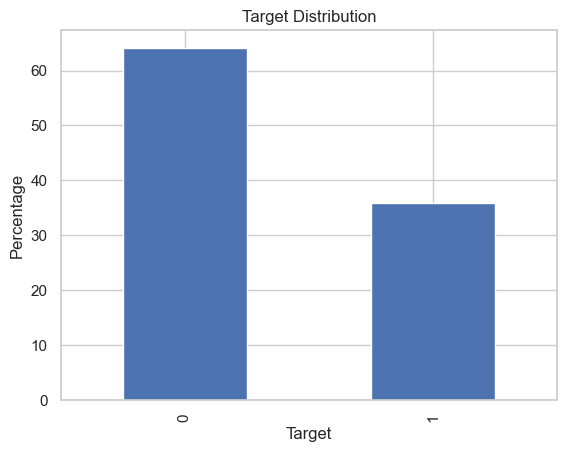

In [203]:
print(active_accounts.target.value_counts(normalize=True)*100)
(active_accounts.target.value_counts(normalize=True)*100).plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Percentage')
plt.show()

ACCL_APPL_STATUS+1
Running                             148043
Not Fulfilled                         8002
Partially Fulfilled                   1153
Fulfilled                              644
Cancelled                              165
For Approval                            69
Review                                  69
Quality Control                         65
Working                                 53
Cancelled - Client Rejection            32
Cancelled - Communication Failed         8
Approved                                 1
Out of Collection                        1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='ACCL_APPL_STATUS+1'>

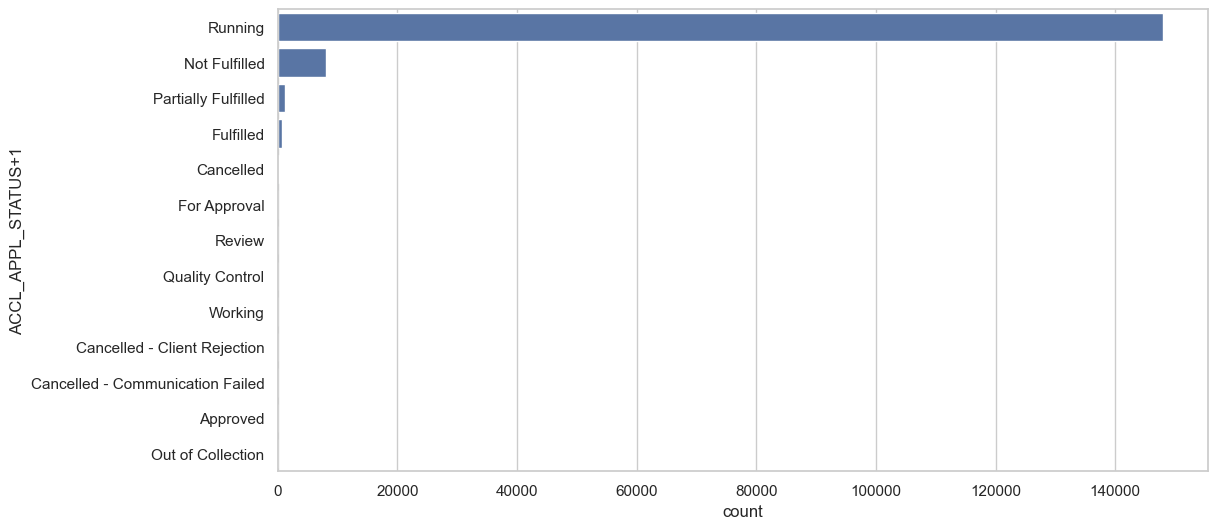

In [204]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
display(active_accounts['ACCL_APPL_STATUS+1'].value_counts())
sns.countplot(y=active_accounts['ACCL_APPL_STATUS+1'], order=active_accounts['ACCL_APPL_STATUS+1'].value_counts().index)

ACCL_APPLICATION_BUCKET
0.00     75922
1.00     31816
2.00     15516
3.00     11588
4.00      9527
5.00      7914
6.00      3995
7.00      1482
8.00       333
9.00        80
10.00       51
11.00       24
12.00       15
13.00       12
14.00       16
15.00        4
16.00        2
17.00        1
18.00        1
19.00        1
20.00        3
60.00        2
Name: count, dtype: int64

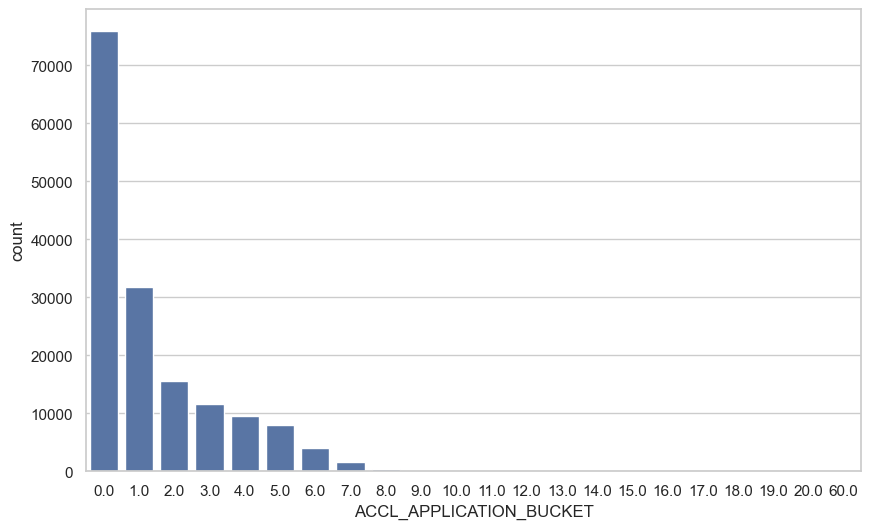

In [205]:
plt.figure(figsize=(10,6))
sns.countplot(x=active_accounts['ACCL_APPLICATION_BUCKET'])
active_accounts.ACCL_APPLICATION_BUCKET.dropna().value_counts().sort_index()

## Categoricals
Below we determine which columns are categorical by creating a function that takes a DataFrame as input and analyzes its object columns by printing the number of unique values and their frequencies. The columns are sorted by the number of unique values in ascending order, making it easier to identify categorical columns and understand the data distribution within them.

In [271]:
def analyze_columns(df, dtype='category'):
    """
    Analyze columns in a DataFrame by printing the number of unique values,
    their frequencies, and the percentage of missing (NA) values, sorted by the
    number of unique values in ascending order.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The input DataFrame to analyze.
    """
    # Get only the data columns
    data_columns = df.select_dtypes(include=[dtype]).columns

    # Create a dictionary to store column information
    col_info = {}

    # Iterate through data columns
    for col in data_columns:
        min_val = df[col].min()
        max_val = df[col].max()
        unique_values = df[col].unique()
        num_unique_values = len(unique_values)

        # Calculate the frequency of each unique value
        value_counts = df[col].value_counts(normalize=True, dropna=False).round(4) * 100
        
        # Calculate the percentage of missing (NA) values
        na_ratio = df[col].isna().sum() / len(df) * 100

        # Store the column information in the dictionary
        col_info[col] = {'num_unique_values': num_unique_values, 'value_counts': value_counts, 'na_ratio': na_ratio, "min":min_val, "max":max_val}

    # Sort the columns based on the number of unique values (ascending order)
    sorted_columns = sorted(col_info.keys(), key=lambda x: col_info[x]['num_unique_values'])

    # Print the sorted column information
    print(f'The total {dtype} columns are {len(data_columns)}:\n')
    
    for num, col in enumerate(sorted_columns):
        min_val = col_info[col]['min']
        max_val = col_info[col]['max']
        num_unique_values = col_info[col]['num_unique_values']
        value_counts = col_info[col]['value_counts']
        na_ratio = col_info[col]['na_ratio']
        print(f"{num}: {col} has {num_unique_values} unique values:")
        print(f"Value frequencies (%):")
        print(value_counts)
        print(f"Missing values (NA) ratio: {na_ratio:.2f}%")
        print(f"MIN VALUE: {min_val}, MAX VALUE: {max_val}")
        print("\n")
        
    return col_info

### Active Accounts

In [71]:
analyze_active_accounts = analyze_columns(active_accounts)

The total category columns are 94:

0: ACCL_BROKEN_SETTLEMENT_INDICATOR_CP has 1 unique values:
Value frequencies (%):
ACCL_BROKEN_SETTLEMENT_INDICATOR_CP
0   100.00
1     0.00
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


1: ACCL_APPL_STATUS has 1 unique values:
Value frequencies (%):
ACCL_APPL_STATUS
Running                            100.00
Approved                             0.00
Cancelled                            0.00
Cancelled - Client Rejection         0.00
Cancelled - Communication Failed     0.00
For Approval                         0.00
Fulfilled                            0.00
Not Fulfilled                        0.00
Out of Collection                    0.00
Partially Fulfilled                  0.00
Quality Control                      0.00
Review                               0.00
Working                              0.00
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


2: ACCL_HAS_ARRANGEMENT_CURRENT has 1 unique values:
Value f

Since **ACCH_CATEG_TYPE has 593 unique values** we should treat it differently and check some descriptives programmatically.

In [72]:
temp = pd.Series(analyze_active_accounts['ACCH_CATEG_TYPE']['value_counts'])
print(f'{temp[temp>=1].shape[0]} unique values make up {temp[temp>=1].sum():.2f}% of the obseravtions for ACCH_CATEG_TYPE column')
ACCH_CATEG_TYPE_to_bins = temp[temp>=1].index.tolist()

24 unique values make up 68.91% of the obseravtions for ACCH_CATEG_TYPE column


In [73]:
analyze_active_accounts = analyze_columns(active_accounts)

The total category columns are 94:

0: ACCL_BROKEN_SETTLEMENT_INDICATOR_CP has 1 unique values:
Value frequencies (%):
ACCL_BROKEN_SETTLEMENT_INDICATOR_CP
0   100.00
1     0.00
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


1: ACCL_APPL_STATUS has 1 unique values:
Value frequencies (%):
ACCL_APPL_STATUS
Running                            100.00
Approved                             0.00
Cancelled                            0.00
Cancelled - Client Rejection         0.00
Cancelled - Communication Failed     0.00
For Approval                         0.00
Fulfilled                            0.00
Not Fulfilled                        0.00
Out of Collection                    0.00
Partially Fulfilled                  0.00
Quality Control                      0.00
Review                               0.00
Working                              0.00
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


2: ACCL_HAS_ARRANGEMENT_CURRENT has 1 unique values:
Value f

In [74]:
active_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158305 entries, 0 to 158304
Columns: 189 entries, ACCOUNT_ID to target
dtypes: category(94), datetime64[s](25), float32(63), int32(5), int64(1), int8(1)
memory usage: 104.3 MB


### Customers

In [75]:
analyze_customers = analyze_columns(c)

The total category columns are 41:

0: CUSL_HAS_CONTACT_ATTEMPT_EVER has 2 unique values:
Value frequencies (%):
CUSL_HAS_CONTACT_ATTEMPT_EVER
Yes   96.22
No     3.78
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


1: CUSL_COUNT_RPC has 2 unique values:
Value frequencies (%):
CUSL_COUNT_RPC
0.00   100.00
Name: proportion, dtype: float64
Missing values (NA) ratio: 37.06%


2: CUSL_REFUSE has 2 unique values:
Value frequencies (%):
CUSL_REFUSE
No    98.16
Yes    1.84
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


3: CUSL_PROMISE has 2 unique values:
Value frequencies (%):
CUSL_PROMISE
No    98.38
Yes    1.62
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


4: CUSL_COMPLAIN has 2 unique values:
Value frequencies (%):
CUSL_COMPLAIN
No    99.96
Yes    0.04
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


5: CUSL_COMMUNICATION_ATTEMPT has 2 unique values:
Value frequencies (%):
CUSL_COMMUNICATION_ATTEMPT
No    80.

In [76]:
[print(num, let1, let2) for num, (let1, let2) in enumerate(zip(list('ΛΟΙΠA ΕΠΑΓΓΕΛΜΑΤΑ'),list('ΛΟΙΠΑ ΕΠΑΓΓΕΛΜΑΤΑ'))) if let1!=let2]

4 A Α


[None]

In [77]:
sorted(customers.CUSL_PROFESSION_GROUPING.value_counts().index.tolist())

['ΑΕΡΟΠΟΡΙΚΑ ΕΠΑΓΓΕΛΜΑΤΑ',
 'ΑΘΛΗΤΗΣ',
 'ΒΙΟΜΗΧΑΝΙΑ',
 'ΒΙΟΤΕΧΝΙΑ',
 'ΓΕΩΡΓΙΑ ΚΤΗΝΟΤΡΟΦΙΑ ΑΛΙΕΙΑ',
 'ΔΗΜΟΣΙΟΓΡΑΦΟΣ',
 'ΕΚΔΟΤΙΚΕΣ ΔΡΑΣΤΗΡΙΟΤΗΤΕΣ',
 'ΕΚΠΑΙΔΕΥΤΙΚΟΙ',
 'ΕΛΕΥΘΕΡΟΙ ΕΠΑΓΓΕΛΜΑΤΙΕΣ',
 'ΕΝΟΠΛΕΣ ΔΥΝΑΜΕΙΣ / ΣΩΜΑΤΑ ΑΣΦΑΛΕΙΑΣ',
 'ΕΠΙΣΤΗΜΟΝΙΚΑ, ΕΡΕΥΝΗΤΙΚΑ ΕΠΑΓΓΕΛΜΑΤΑ',
 'ΕΦΟΠΛΙΣΤΗΣ',
 'ΙΑΤΡΙΚΑ ΕΠΑΓΕΛΜΑΤΑ',
 'ΚΑΛΛΙΤΕΧΝΕΣ',
 'ΚΑΤΑΣΚΕΥΑΣΤΙΚΟΣ ΚΛΑΔΟΣ',
 'ΚΛΑΔΟΣ ΑΣΦΑΛΙΣΗΣ',
 'ΚΛΑΔΟΣ ΕΠΙΧΕΙΡΗΣΕΩΝ',
 'ΚΛΑΔΟΣ ΕΣΤΙΑΣΗΣ',
 'ΚΛΑΔΟΣ ΚΑΤΑΣΚΕΥΩΝ',
 'ΚΛΗΡΙΚΟΙ',
 'ΛΟΓΙΣΤΗΣ - ΦΟΡΟΤΕΧΝΙΚΟΣ',
 'ΛΟΙΠA ΕΠΑΓΓΕΛΜΑΤΑ',
 'ΜΑΘΗΤΗΣ/ ΣΠΟΥΔΑΣΤΗΣ',
 'ΜΕΣΙΤΕΣ / ΠΡΑΚΤΟΡΕΣ',
 'ΜΗ ΕΡΓΑΖΟΜΕΝΟΣ',
 'ΜΗΧΑΝΟΛΟΓΙΚΑ ΕΠΑΓΓΕΛΜΑΤΑ',
 'ΝΑΥΤΙΚΟΣ ΚΛΑΔΟΣ',
 'ΝΟΜΙΚΟΥ ΚΛΑΔΟΥ',
 'ΞΕΝΟΔΟΧΕΙΑΚΑ',
 'ΟΙΚΙΑΚΑ',
 'ΠΑΡΟΧΗ ΥΠΗΡΕΣΙΩΝ',
 'ΠΟΛΙΤΙΚΗΣ ΚΑΙ ΔΙΠΛΩΜΑΤΙΚΟ ΣΩΜΑ ',
 'ΠΩΛΗΣΕΙΣ ΠΡΟΩΘΗΣΗ ΠΡΟΙΟΝΤΩΝ ΥΠΗΡ ΕΞΥΠ ΠΕΛ',
 'ΣΥΝΤΑΞΙΟΥΧΟΣ',
 'ΤΑΧΥΔΡΟΜΙΚΕΣ & MEΤΑΦΟΡΙΚΕΣ',
 'ΤΡΑΠΕΖΙΚΑ',
 'ΦΑΡΜΑΚΟΠΟΙΟΣ',
 'ΧΡΗΜΑΤΙΣΤΗΡΙΑΚΑ']

In [78]:
analyze_customers = analyze_columns(c)

The total category columns are 41:

0: CUSL_HAS_CONTACT_ATTEMPT_EVER has 2 unique values:
Value frequencies (%):
CUSL_HAS_CONTACT_ATTEMPT_EVER
Yes   96.22
No     3.78
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


1: CUSL_COUNT_RPC has 2 unique values:
Value frequencies (%):
CUSL_COUNT_RPC
0.00   100.00
Name: proportion, dtype: float64
Missing values (NA) ratio: 37.06%


2: CUSL_REFUSE has 2 unique values:
Value frequencies (%):
CUSL_REFUSE
No    98.16
Yes    1.84
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


3: CUSL_PROMISE has 2 unique values:
Value frequencies (%):
CUSL_PROMISE
No    98.38
Yes    1.62
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


4: CUSL_COMPLAIN has 2 unique values:
Value frequencies (%):
CUSL_COMPLAIN
No    99.96
Yes    0.04
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


5: CUSL_COMMUNICATION_ATTEMPT has 2 unique values:
Value frequencies (%):
CUSL_COMMUNICATION_ATTEMPT
No    80.

In [79]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246227 entries, 0 to 2246226
Data columns (total 60 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   CUSTOMER_ID                              category      
 1   SNAPNUM                                  int8          
 2   CUSH_CATEG_SEGMENT                       category      
 3   CUSL_HAS_CONTACT_ATTEMPT_EVER            category      
 4   CUSL_PROFESSION_GROUPING                 category      
 5   CUSL_PHONE_RPC_COUNT                     category      
 6   CUSL_COUNT_RPC                           category      
 7   CUSL_COUNT_NO_CONTACT                    category      
 8   CUSL_REFUSE                              category      
 9   CUSL_PROMISE                             category      
 10  CUSL_COMPLAIN                            category      
 11  CUSL_COMMUNICATION_ATTEMPT               category      
 12  CUSL_MIN_COMMUNICATION_DATE_

### Transactions

In [80]:
analyze_transactions = analyze_columns(t) 

The total category columns are 9:

0: TRAN_FLAG_MATCH_PROMISE has 2 unique values:
Value frequencies (%):
TRAN_FLAG_MATCH_PROMISE
0   97.31
1    2.69
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


1: TRAL_IN_SETTLEMENT has 3 unique values:
Value frequencies (%):
TRAL_IN_SETTLEMENT
Yes   67.25
No    32.75
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


2: TRAL_TYPE_DESC has 5 unique values:
Value frequencies (%):
TRAL_TYPE_DESC
Online             73.53
Batch              14.76
P                   5.77
Internet Banking    3.66
Cash                2.28
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


3: TRAL_APPL_TYPE has 20 unique values:
Value frequencies (%):
TRAL_APPL_TYPE
Settlement                                    37.34
Out of Mandate                                24.42
Διακανονισμός Αποπληρωμής Συνολικής Οφειλής   15.68
Χρονικές Συμβιβαστικές Ρυθμίσεις               9.09
70%-30% with Counter Offer                     6.

In [81]:
temp = pd.Series(analyze_transactions['TRAL_STRATEGY_STEP']['value_counts'])
print(f'{temp[temp>=1].shape[0]} unique values make up {temp[temp>=1].sum():.2f}% of the obseravtions for TRAL_STRATEGY_STEP column')
TRAL_STRATEGY_STEP_bins = temp[temp>=1].index.tolist()

20 unique values make up 85.15% of the obseravtions for TRAL_STRATEGY_STEP column


Since **TRAL_STRATEGY_STEP has 116 unique values** we should treat it differently and check some descriptives programmatically.

In [82]:
temp = pd.Series(analyze_transactions['TRAL_SUB_PRODUCT']['value_counts'])
print(f'{temp[temp>=1].shape[0]} unique values make up {temp[temp>=1].sum():.2f}% of the obseravtions for TRAL_SUB_PRODUCT column.')
print(f'TRAL_SUB_PRODUCT is Transaction account subproduct. It is not worth adding the feature given the {temp[temp>=1].shape[0]} uniques.')

24 unique values make up 73.77% of the obseravtions for TRAL_SUB_PRODUCT column.
TRAL_SUB_PRODUCT is Transaction account subproduct. It is not worth adding the feature given the 24 uniques.


In [83]:
analyze_transactions = analyze_columns(t) 

The total category columns are 9:

0: TRAN_FLAG_MATCH_PROMISE has 2 unique values:
Value frequencies (%):
TRAN_FLAG_MATCH_PROMISE
0   97.31
1    2.69
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


1: TRAL_IN_SETTLEMENT has 3 unique values:
Value frequencies (%):
TRAL_IN_SETTLEMENT
Yes   67.25
No    32.75
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


2: TRAL_TYPE_DESC has 5 unique values:
Value frequencies (%):
TRAL_TYPE_DESC
Online             73.53
Batch              14.76
P                   5.77
Internet Banking    3.66
Cash                2.28
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


3: TRAL_APPL_TYPE has 20 unique values:
Value frequencies (%):
TRAL_APPL_TYPE
Settlement                                    37.34
Out of Mandate                                24.42
Διακανονισμός Αποπληρωμής Συνολικής Οφειλής   15.68
Χρονικές Συμβιβαστικές Ρυθμίσεις               9.09
70%-30% with Counter Offer                     6.

In [84]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137205 entries, 0 to 137204
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   TRANSACTION_ID                   137205 non-null  category      
 1   SNAPNUM                          137205 non-null  int8          
 2   TRAL_TYPE_DESC                   137205 non-null  category      
 3   CUSTOMER_ID                      137205 non-null  category      
 4   TRAN_DELINQ_DCA                  131603 non-null  float16       
 5   TRAN_AMOUNT                      137205 non-null  float64       
 6   TRAL_DEBT_AMOUNT                 137205 non-null  float64       
 7   TRAL_CURRENT_BUCKET              132746 non-null  float16       
 8   ACCOUNT_ID                       137205 non-null  category      
 9   TRAL_SUB_PRODUCT                 132753 non-null  category      
 10  TRAL_CLEARANCE_DATE              137201 non-

### Actions

In [85]:
analyze_actions = analyze_columns(a)

The total category columns are 15:

0: ACTL_ACCEPTANCE_STATUS has 2 unique values:
Value frequencies (%):
ACTL_ACCEPTANCE_STATUS
Accepted   89.05
Internal   10.95
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


1: ACTL_CONTACT_ATTEMPT has 2 unique values:
Value frequencies (%):
ACTL_CONTACT_ATTEMPT
Yes   94.13
No     5.87
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


2: ACTL_IS_PHONE_RPC has 2 unique values:
Value frequencies (%):
ACTL_IS_PHONE_RPC
0.00   96.49
1.00    3.51
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


3: ACTL_OUTBOUND has 3 unique values:
Value frequencies (%):
ACTL_OUTBOUND
1.00   55.06
0.00   44.94
Name: proportion, dtype: float64
Missing values (NA) ratio: 11.56%


4: ACTL_SOURCE_OF_ACTIVITY has 4 unique values:
Value frequencies (%):
ACTL_SOURCE_OF_ACTIVITY
Import       89.05
Collection   10.95
05D           0.00
0SZ           0.00
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%


5:

In [86]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14980106 entries, 0 to 14980107
Data columns (total 17 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   ACTION_ID                 category
 1   SNAPNUM                   int8    
 2   ACTION_TYPE_DESC          category
 3   ACTL_PERSON_CONTACT_TYPE  category
 4   ACTL_ACTIVITY_TYPE        category
 5   ACTL_ACCEPTANCE_STATUS    category
 6   ACTL_PRIORITY_GENERIC_1   category
 7   ACCOUNT_ID                category
 8   ACTL_OUTBOUND             category
 9   ACTL_SOURCE_OF_ACTIVITY   category
 10  ACTL_WEEKDAY              category
 11  CUSTOMER_ID               category
 12  ACTL_DEPARTMENT           category
 13  ACTL_STRATEGY_STEP        category
 14  ACTL_CONTACT_ATTEMPT      category
 15  ACTL_IS_PHONE_RPC         category
 16  ACTION_DELINQ_DCA         float16 
dtypes: category(15), float16(1), int8(1)
memory usage: 1.2 GB


# Create ML Dataset

## Aggregation Strategy
We have to aggregate information from transactions and actions datasets before merging to make sure that each account has a single row of data for each SNAPNUM.

In [87]:
# Define a custom aggregation function
def list_if_multiple(x):
    unique_vals = x.unique()  # Get unique values in the group
    if len(unique_vals) > 1:
        return list(unique_vals)  # Return a list if more than one unique value
    else:
        return unique_vals[0]  # Return the single unique value directly

### Transactions

In [88]:
# get the accounts with more than 1 transaction per month
group_trans = t.groupby(["ACCOUNT_ID", "SNAPNUM"], observed=False, as_index=False)
trans_acc_w_variabililty = group_trans.size()['size']>1
# get the rows with more than 1 transaction per month
trans_to_inspect = group_trans.size()[trans_acc_w_variabililty]
# get the unique accounts to a DF
trans_accounts_to_agg = list(set(trans_to_inspect["ACCOUNT_ID"]))
trans_agg_df = pd.Series(trans_accounts_to_agg)

In [89]:
# get the DF that includes all the transactions of the accounts that need aggregations
transactions_to_agg = t[t['ACCOUNT_ID'].isin(trans_agg_df)].sort_values(by=["ACCOUNT_ID", "SNAPNUM"])
# add values to list to inspect for aggregation
group_trans_list = transactions_to_agg.groupby(["ACCOUNT_ID", "SNAPNUM"], observed=False, as_index=False).agg(list_if_multiple)

In [90]:
# save the transactions accounts
transactions_to_agg#.to_excel('transactions_to_agg.xlsx')
group_trans_list#.to_excel('transactions_to_agg_as_list.xlsx')

,ACCOUNT_ID,SNAPNUM,TRANSACTION_ID,TRAL_TYPE_DESC,CUSTOMER_ID,TRAN_DELINQ_DCA,TRAN_AMOUNT,TRAL_DEBT_AMOUNT,TRAL_CURRENT_BUCKET,TRAL_SUB_PRODUCT,TRAL_CLEARANCE_DATE,TRAN_DATE,TRAN_FLAG_MATCH_PROMISE,TRAL_STEP_ENTRY_DATE,TRAL_STRATEGY_STEP,TRAL_APPL_TYPE,TRAL_APPL_DATE_INSTALMENT_FINAL,TRAL_IN_SETTLEMENT
0,345009,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,345009,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,345009,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,345009,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,345009,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252367,1122559,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252368,1122559,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252369,1122559,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252370,1122559,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
trans_agg_df

0       393225
1       622601
2       622605
3       524309
4       393238
         ...  
7740    557028
7741    557038
7742    655343
7743    589819
7744    524287
Length: 7745, dtype: int64

In [92]:
transactions_to_agg

,TRANSACTION_ID,SNAPNUM,TRAL_TYPE_DESC,CUSTOMER_ID,TRAN_DELINQ_DCA,TRAN_AMOUNT,TRAL_DEBT_AMOUNT,TRAL_CURRENT_BUCKET,ACCOUNT_ID,TRAL_SUB_PRODUCT,TRAL_CLEARANCE_DATE,TRAN_DATE,TRAN_FLAG_MATCH_PROMISE,TRAL_STEP_ENTRY_DATE,TRAL_STRATEGY_STEP,TRAL_APPL_TYPE,TRAL_APPL_DATE_INSTALMENT_FINAL,TRAL_IN_SETTLEMENT
10030,27274047,37,Online,396397,13.00,428.58,"28,961.68",13.00,345012,102OP01-9113-OPΜ01,2019-01-30,2019-01-30,0,2019-01-30,Call Sett Buc 01,Διακανονισμός Αποπληρωμής Συνολικής Οφειλής,2019-12-17,Yes
20015,28597812,38,Online,396397,13.00,435.25,"28,447.67",NaN,345012,NaN,2019-02-28,2019-02-28,0,2019-02-28,Call Sett Buc 01,Διακανονισμός Αποπληρωμής Συνολικής Οφειλής,2019-12-17,Yes
30615,29488341,39,Online,396397,13.00,434.85,"28,488.30",13.00,345012,102OP01-9113-OPΜ01,2019-03-29,2019-03-29,0,2019-03-29,Call Sett Buc 01,Διακανονισμός Αποπληρωμής Συνολικής Οφειλής,2019-12-17,Yes
41517,30650893,40,Online,396397,13.00,428.47,"27,678.17",13.00,345012,102OP01-9113-OPΜ01,2019-04-25,2019-04-25,0,2019-04-25,NOP Sett <=10d & Buc01,Διακανονισμός Αποπληρωμής Συνολικής Οφειλής,2019-12-17,Yes
52939,33822270,41,Online,396397,13.00,422.54,"27,855.10",13.00,345012,102OP01-9113-OPΜ01,2019-05-30,2019-05-30,0,2019-05-30,Call Sett Buc 01,Διακανονισμός Αποπληρωμής Συνολικής Οφειλής,2019-12-17,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83924,39958951,44,Cash,682285,NaN,105.04,"19,777.33",0.00,1122549,102ΧΟΡΕΠΙΧ-089,2019-08-29,2019-08-29,0,NaT,NaN,NaN,NaT,No
100657,45268382,45,Cash,682285,NaN,102.76,"20,057.48",0.00,1122549,102ΧΟΡΕΠΙΧ-089,2019-09-27,2019-09-27,0,NaT,NaN,NaN,NaT,No
113212,64973839,47,Cash,682285,NaN,104.49,"19,695.15",0.00,1122549,102ΧΟΡΕΠΙΧ-089,2019-11-01,2019-11-01,0,NaT,NaN,NaN,NaT,No
123660,66196080,47,Cash,682285,NaN,104.49,"19,593.10",0.00,1122549,102ΧΟΡΕΠΙΧ-089,2019-11-29,2019-11-29,0,NaT,NaN,NaN,NaT,No


In [93]:
# check come of the variable accounts 
t[t['ACCOUNT_ID'].isin([345048, 557038, 524309])].sort_values(by=["ACCOUNT_ID", "SNAPNUM"])

,TRANSACTION_ID,SNAPNUM,TRAL_TYPE_DESC,CUSTOMER_ID,TRAN_DELINQ_DCA,TRAN_AMOUNT,TRAL_DEBT_AMOUNT,TRAL_CURRENT_BUCKET,ACCOUNT_ID,TRAL_SUB_PRODUCT,TRAL_CLEARANCE_DATE,TRAN_DATE,TRAN_FLAG_MATCH_PROMISE,TRAL_STEP_ENTRY_DATE,TRAL_STRATEGY_STEP,TRAL_APPL_TYPE,TRAL_APPL_DATE_INSTALMENT_FINAL,TRAL_IN_SETTLEMENT
2331,27209210,37,Online,258789,10.00,144.52,"32,936.77",13.00,345048,102OP01-9113-OPΜ01,2019-01-30,2019-01-30,0,2019-01-30,NOP LC,Settlement,2034-01-02,Yes
23450,29346922,39,Online,258789,10.00,187.38,"33,188.68",NaN,345048,NaN,2019-03-01,2019-03-01,0,NaT,NaN,Settlement,2034-01-02,Yes
23451,29346924,39,Online,258789,10.00,187.38,"33,042.00",13.00,345048,102OP01-9113-OPΜ01,2019-03-29,2019-03-29,0,2019-03-29,NOP Charaktiniotis_LC,Settlement,2034-01-02,Yes
34292,30517445,40,Online,258789,10.00,184.63,"32,401.41",13.00,345048,102OP01-9113-OPΜ01,2019-04-19,2019-04-19,0,NaT,NaN,Settlement,2034-01-02,Yes
45353,33647287,41,Online,258789,10.00,182.07,"32,935.97",13.00,345048,102OP01-9113-OPΜ01,2019-05-31,2019-05-31,0,NaT,NaN,Settlement,2034-01-02,Yes
56381,37030633,42,Online,258789,10.00,187.27,"33,107.19",13.00,345048,102OP01-9113-OPΜ01,2019-06-28,2019-06-28,0,NaT,NaN,Settlement,2034-01-02,Yes
66967,38521142,43,Online,258789,10.00,226.49,"32,282.90",13.00,345048,102OP01-9113-OPΜ01,2019-07-31,2019-07-31,0,NaT,NaN,Settlement,2034-01-02,Yes
79596,39733081,44,Online,258789,10.00,188.13,"31,720.89",13.00,345048,102OP01-9113-OPΜ01,2019-08-30,2019-08-30,0,NaT,NaN,Settlement,2034-01-02,Yes
103284,46061841,46,Online,258789,10.00,187.61,"32,098.01",13.00,345048,102OP01-9113-OPΜ01,2019-10-25,2019-10-25,0,NaT,NaN,Settlement,2034-01-02,Yes
103285,46061843,46,Online,258789,10.00,187.61,"32,252.81",13.00,345048,102OP01-9113-OPΜ01,2019-10-01,2019-10-01,0,NaT,NaN,Settlement,2034-01-02,Yes


### Actions

In [94]:
# get the accounts with more than 1 action per month
group_actions = a.groupby(["ACCOUNT_ID", "SNAPNUM"], observed=False, as_index=False)
actions_acc_w_variabililty = group_actions.size()['size']>1
# get the rows with more than 1 action per month
actions_to_inspect = group_actions.size()[actions_acc_w_variabililty]
# get the unique accounts to a DF
actions_accounts_to_agg = list(set(actions_to_inspect["ACCOUNT_ID"]))
actions_agg_df = pd.Series(actions_accounts_to_agg)

In [95]:
# print the % of accounts that need aggregation
len(actions_agg_df) / a['ACCOUNT_ID'].nunique()

0.9111707633735109

Almost all of the accounts that exist in actions DF need aggregation.

In [96]:
# get the DF that includes all the actions of the accounts that need aggregations
actions_to_agg = a[a['ACCOUNT_ID'].isin(actions_agg_df)].sort_values(by=["ACCOUNT_ID", "SNAPNUM"])

In [97]:
actions_to_agg

,ACTION_ID,SNAPNUM,ACTION_TYPE_DESC,ACTL_PERSON_CONTACT_TYPE,ACTL_ACTIVITY_TYPE,ACTL_ACCEPTANCE_STATUS,ACTL_PRIORITY_GENERIC_1,ACCOUNT_ID,ACTL_OUTBOUND,ACTL_SOURCE_OF_ACTIVITY,ACTL_WEEKDAY,CUSTOMER_ID,ACTL_DEPARTMENT,ACTL_STRATEGY_STEP,ACTL_CONTACT_ATTEMPT,ACTL_IS_PHONE_RPC,ACTION_DELINQ_DCA
228043,144143905,37,Δεν Απαντά,No Contact,Communication,Accepted,NaN,344984,0.00,Import,2.00,373503,NaN,NOP Assigned FC_Collection,Yes,0.00,20.00
386732,144307402,37,Δεν Απαντά,No Contact,Communication,Accepted,NaN,344984,0.00,Import,5.00,373503,NaN,NOP Assigned FC_Collection,Yes,0.00,20.00
785873,144729581,37,Δεν Απαντά,No Contact,Communication,Accepted,NaN,344984,0.00,Import,1.00,373503,NaN,NOP Assigned FC_Collection,Yes,0.00,20.00
1068472,145014153,37,Δεν Απαντά,No Contact,Communication,Accepted,NaN,344984,0.00,Import,1.00,373503,NaN,NOP Assigned FC_Collection,Yes,0.00,20.00
1129384,145077355,37,Δεν Απαντά,No Contact,Communication,Accepted,NaN,344984,0.00,Import,2.00,373503,NaN,NOP Assigned FC_Collection,Yes,0.00,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13535992,230968790,47,Δεν Απαντά,No Contact,Communication,Internal,NaN,1122560,NaN,Collection,3.00,681951,SB,NOP Other Relations,Yes,0.00,NaN
13535993,230968791,47,Δεν Απαντά,No Contact,Communication,Internal,NaN,1122560,NaN,Collection,3.00,681951,SB,NOP Other Relations,Yes,0.00,NaN
13536001,230968799,47,Δεν Απαντά,No Contact,Communication,Internal,NaN,1122560,NaN,Collection,3.00,683068,SB,NOP Other Relations,Yes,0.00,NaN
14837865,237195158,48,Επίδοση Εξωδίκου Εγγυητή,RIGHT PARTY CONTACT,ΕΞΩΔΙΚΗ ΔΗΛΩΣΗ/ ΚΑΤΑΓΓΕΛΙΑ,Internal,NaN,1122560,NaN,Collection,1.00,681951,Portfolio Operations,NOP Other Relations,Yes,0.00,NaN


In [98]:
# check some of the variable accounts 
sample_actions = a[a['ACCOUNT_ID'].isin([524283, 524286, 524289])].sort_values(by=["ACCOUNT_ID", "SNAPNUM"])

In [99]:
sample_actions#.to_excel('sample_actions_to_agg.xlsx')

,ACTION_ID,SNAPNUM,ACTION_TYPE_DESC,ACTL_PERSON_CONTACT_TYPE,ACTL_ACTIVITY_TYPE,ACTL_ACCEPTANCE_STATUS,ACTL_PRIORITY_GENERIC_1,ACCOUNT_ID,ACTL_OUTBOUND,ACTL_SOURCE_OF_ACTIVITY,ACTL_WEEKDAY,CUSTOMER_ID,ACTL_DEPARTMENT,ACTL_STRATEGY_STEP,ACTL_CONTACT_ATTEMPT,ACTL_IS_PHONE_RPC,ACTION_DELINQ_DCA
134918,144050367,37,Δεν Απαντά,No Contact,Communication,Accepted,NaN,524283,1.00,Import,5.00,332505,NaN,NOP Assigned Mellon_Collection,Yes,0.00,40.00
346365,144266651,37,Δεν Απαντά,No Contact,Communication,Accepted,NaN,524283,1.00,Import,4.00,332505,NaN,NOP Assigned Mellon_Collection,Yes,0.00,40.00
620095,144542322,37,Δεν Απαντά,No Contact,Communication,Accepted,NaN,524283,1.00,Import,3.00,332505,NaN,NOP Assigned Mellon_Collection,Yes,0.00,40.00
936084,144880523,37,Δεν Απαντά,No Contact,Communication,Accepted,NaN,524283,1.00,Import,3.00,332505,NaN,NOP Assigned Mellon_Collection,Yes,0.00,40.00
1135888,145083861,37,Δεν Απαντά,No Contact,Communication,Accepted,NaN,524283,1.00,Import,2.00,332505,NaN,NOP Assigned Mellon_Collection,Yes,0.00,40.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10972826,207667500,44,Δεν Απαντά,No Contact,Communication,Accepted,NaN,524289,0.00,Import,3.00,248771,NaN,NaN,Yes,0.00,43.00
11083154,207779015,44,Άφησα Μήνυμα,No Contact,Communication,Accepted,NaN,524289,0.00,Import,5.00,248771,NaN,NaN,Yes,0.00,43.00
11183219,223507959,45,Άφησα Μήνυμα,No Contact,Communication,Accepted,NaN,524289,0.00,Import,2.00,248771,NaN,NaN,Yes,0.00,43.00
11232943,223558326,45,Άφησα Μήνυμα,No Contact,Communication,Accepted,NaN,524289,0.00,Import,3.00,248771,NaN,NaN,Yes,0.00,43.00


In [100]:
sample_actions

,ACTION_ID,SNAPNUM,ACTION_TYPE_DESC,ACTL_PERSON_CONTACT_TYPE,ACTL_ACTIVITY_TYPE,ACTL_ACCEPTANCE_STATUS,ACTL_PRIORITY_GENERIC_1,ACCOUNT_ID,ACTL_OUTBOUND,ACTL_SOURCE_OF_ACTIVITY,ACTL_WEEKDAY,CUSTOMER_ID,ACTL_DEPARTMENT,ACTL_STRATEGY_STEP,ACTL_CONTACT_ATTEMPT,ACTL_IS_PHONE_RPC,ACTION_DELINQ_DCA
134918,144050367,37,Δεν Απαντά,No Contact,Communication,Accepted,NaN,524283,1.00,Import,5.00,332505,NaN,NOP Assigned Mellon_Collection,Yes,0.00,40.00
346365,144266651,37,Δεν Απαντά,No Contact,Communication,Accepted,NaN,524283,1.00,Import,4.00,332505,NaN,NOP Assigned Mellon_Collection,Yes,0.00,40.00
620095,144542322,37,Δεν Απαντά,No Contact,Communication,Accepted,NaN,524283,1.00,Import,3.00,332505,NaN,NOP Assigned Mellon_Collection,Yes,0.00,40.00
936084,144880523,37,Δεν Απαντά,No Contact,Communication,Accepted,NaN,524283,1.00,Import,3.00,332505,NaN,NOP Assigned Mellon_Collection,Yes,0.00,40.00
1135888,145083861,37,Δεν Απαντά,No Contact,Communication,Accepted,NaN,524283,1.00,Import,2.00,332505,NaN,NOP Assigned Mellon_Collection,Yes,0.00,40.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10972826,207667500,44,Δεν Απαντά,No Contact,Communication,Accepted,NaN,524289,0.00,Import,3.00,248771,NaN,NaN,Yes,0.00,43.00
11083154,207779015,44,Άφησα Μήνυμα,No Contact,Communication,Accepted,NaN,524289,0.00,Import,5.00,248771,NaN,NaN,Yes,0.00,43.00
11183219,223507959,45,Άφησα Μήνυμα,No Contact,Communication,Accepted,NaN,524289,0.00,Import,2.00,248771,NaN,NaN,Yes,0.00,43.00
11232943,223558326,45,Άφησα Μήνυμα,No Contact,Communication,Accepted,NaN,524289,0.00,Import,3.00,248771,NaN,NaN,Yes,0.00,43.00


## Filter the datasets with ACCOUNT_ID & SNAPNUM existing in active_accounts

In [101]:
# Filter 'a' and 't' datasets to keep only the active accounts
t_filtered = t.merge(active_accounts[['ACCOUNT_ID', 'SNAPNUM']], on=["ACCOUNT_ID", "SNAPNUM"], how="inner")
a_filtered = a.merge(active_accounts[['ACCOUNT_ID', 'SNAPNUM']], on=["ACCOUNT_ID", "SNAPNUM"], how="inner")

### Actions Filtered

In [102]:
a_filtered

,ACTION_ID,SNAPNUM,ACTION_TYPE_DESC,ACTL_PERSON_CONTACT_TYPE,ACTL_ACTIVITY_TYPE,ACTL_ACCEPTANCE_STATUS,ACTL_PRIORITY_GENERIC_1,ACCOUNT_ID,ACTL_OUTBOUND,ACTL_SOURCE_OF_ACTIVITY,ACTL_WEEKDAY,CUSTOMER_ID,ACTL_DEPARTMENT,ACTL_STRATEGY_STEP,ACTL_CONTACT_ATTEMPT,ACTL_IS_PHONE_RPC,ACTION_DELINQ_DCA
0,143914920,37,REMINDER (Υπόσχεση/Ραντεβού),RIGHT PARTY CONTACT,Communication,Internal,Καταγγελία_Επίδοση,571748,NaN,Collection,3.00,218632,Quant Collections,Call Sett Buc 03,Yes,1.00,NaN
1,143914926,37,Έκλεισε η γραμμή,No Contact,Communication,Internal,Καταγγελία_Επίδοση,478685,NaN,Collection,3.00,303120,Quant Collections,Call Sett Buc 04+,Yes,0.00,NaN
2,143914927,37,Έκλεισε η γραμμή,No Contact,Communication,Internal,NaN,574882,NaN,Collection,3.00,303120,Quant Collections,Call Sett Buc 03,Yes,0.00,NaN
3,143914928,37,Έκλεισε η γραμμή,No Contact,Communication,Internal,NaN,465629,NaN,Collection,3.00,298052,Quant Collections,Call Sett Buc 03,Yes,0.00,NaN
4,143914936,37,Δεν Απαντά,No Contact,Communication,Internal,NaN,417599,NaN,Collection,3.00,373160,Quant Collections,Call Sett Buc 04+,Yes,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203256,519729233,46,Απόφαση Ανακοπής Δεκτή,NaN,Δ/Π,Accepted,Δ/Π_Επίδοση,533686,NaN,05D,NaN,321273,Portfolio Operations,NOP Sett <=10d & Buc01,No,0.00,NaN
1203257,605685015,37,Απόρριψη Ανακοπής,NaN,Δ/Π,Accepted,ΕΚΔΟΣΗ ΔΙΑΤΑΓΗΣ ΠΛΗΡΩΜΗΣ,434743,NaN,0SZ,NaN,402320,Portfolio Operations,NaN,No,0.00,NaN
1203258,606024245,37,Απόρριψη Ανακοπής,NaN,Δ/Π,Accepted,Δ/Π_Ανακοπή,434743,NaN,0SZ,NaN,221009,Portfolio Operations,NaN,No,0.00,NaN
1203259,606024246,37,Απόρριψη Ανακοπής,NaN,Δ/Π,Accepted,ΕΚΔΟΣΗ ΔΙΑΤΑΓΗΣ ΠΛΗΡΩΜΗΣ,434743,NaN,0SZ,NaN,302647,Portfolio Operations,NaN,No,0.00,NaN


In [103]:
# get the accounts with more than 1 action per month
group_actions_f = a_filtered.groupby(["ACCOUNT_ID", "SNAPNUM"], observed=False, as_index=False)
actions_acc_w_variabililty_f = group_actions_f.size()['size']>1
# get the rows with more than 1 action per month
actions_to_inspect_f = group_actions_f.size()[actions_acc_w_variabililty_f]
# get the unique accounts to a DF
actions_accounts_to_agg_f = list(set(actions_to_inspect_f["ACCOUNT_ID"]))
actions_agg_df_f = pd.Series(actions_accounts_to_agg_f)

In [104]:
actions_agg_df_f

0        393225
1        393226
2        655380
3        524309
4        393238
          ...  
22597    524254
22598    655343
22599    524273
22600    655353
22601    524287
Length: 22602, dtype: int64

In [105]:
# get the DF that includes all the actions of the accounts that need aggregations
actions_to_agg_f = a_filtered[a_filtered['ACCOUNT_ID'].isin(actions_agg_df_f)].sort_values(by=["ACCOUNT_ID", "SNAPNUM"])
# add values to list to inspect for aggregation
group_actions_list_f = actions_to_agg_f.groupby(["ACCOUNT_ID", "SNAPNUM"], observed=False, as_index=False).agg(list_if_multiple)

In [106]:
actions_to_agg_f

,ACTION_ID,SNAPNUM,ACTION_TYPE_DESC,ACTL_PERSON_CONTACT_TYPE,ACTL_ACTIVITY_TYPE,ACTL_ACCEPTANCE_STATUS,ACTL_PRIORITY_GENERIC_1,ACCOUNT_ID,ACTL_OUTBOUND,ACTL_SOURCE_OF_ACTIVITY,ACTL_WEEKDAY,CUSTOMER_ID,ACTL_DEPARTMENT,ACTL_STRATEGY_STEP,ACTL_CONTACT_ATTEMPT,ACTL_IS_PHONE_RPC,ACTION_DELINQ_DCA
206744,153100998,38,Επίδοση επιστολής Hello Letter,NaN,Requests,Internal,Καταγγελία_Επίδοση,345009,0.00,Collection,1.00,425078,IT,NOP Sett Buc 00,No,0.00,NaN
210608,153149631,38,Επίδοση επιστολής Hello Letter,NaN,Requests,Internal,ΕΞΩΔΙΚΗ ΚΑΤΑΓΓΕΛΙΑ ΣΕ ΟΛΟΥΣ ΤΟΥΣ ΕΝΕΧΟΜΕΝΟΥΣ,345009,0.00,Collection,1.00,325563,IT,NOP Other Relations,No,0.00,NaN
63791,144749072,37,Δεν Απαντά,No Contact,Communication,Accepted,Καταγγελία_Επίδοση,345010,0.00,Import,1.00,262243,NaN,NOP Assigned Sioufas_Collection,Yes,0.00,50.00
68413,144803034,37,Δεν Απαντά,No Contact,Communication,Accepted,Καταγγελία_Επίδοση,345010,0.00,Import,2.00,262243,NaN,NOP Assigned Sioufas_Collection,Yes,0.00,50.00
78177,144932144,37,Δεν Απαντά,No Contact,Communication,Accepted,Καταγγελία_Επίδοση,345010,0.00,Import,4.00,262243,NaN,NOP Assigned Sioufas_Collection,Yes,0.00,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098473,231151536,47,Δεν Απαντά,No Contact,Communication,Internal,NaN,1122554,NaN,Collection,2.00,681464,Quant Collections,NaN,Yes,0.00,NaN
1098523,231151766,47,Παραλαβή E-Mail,RIGHT PARTY CONTACT,Back Office,Internal,NaN,1122554,NaN,Collection,2.00,681632,Quant Collections,NOP Other Relations,Yes,0.00,NaN
1098524,231151767,47,Παραλαβή E-Mail,RIGHT PARTY CONTACT,Back Office,Internal,NaN,1122554,NaN,Collection,2.00,681632,Quant Collections,NOP Other Relations,Yes,0.00,NaN
1098580,231151982,47,Υπόσχεση πληρωμής_Ενεργός Διακανονισμός,RIGHT PARTY CONTACT,Settlement,Internal,NaN,1122554,NaN,Collection,2.00,681464,Quant Collections,NaN,Yes,1.00,NaN


In [107]:
# get the max excel sheet
actions_to_agg_f.iloc[:1048575,:]#.to_excel('actions_filtered_to_agg.xlsx')

,ACTION_ID,SNAPNUM,ACTION_TYPE_DESC,ACTL_PERSON_CONTACT_TYPE,ACTL_ACTIVITY_TYPE,ACTL_ACCEPTANCE_STATUS,ACTL_PRIORITY_GENERIC_1,ACCOUNT_ID,ACTL_OUTBOUND,ACTL_SOURCE_OF_ACTIVITY,ACTL_WEEKDAY,CUSTOMER_ID,ACTL_DEPARTMENT,ACTL_STRATEGY_STEP,ACTL_CONTACT_ATTEMPT,ACTL_IS_PHONE_RPC,ACTION_DELINQ_DCA
206744,153100998,38,Επίδοση επιστολής Hello Letter,NaN,Requests,Internal,Καταγγελία_Επίδοση,345009,0.00,Collection,1.00,425078,IT,NOP Sett Buc 00,No,0.00,NaN
210608,153149631,38,Επίδοση επιστολής Hello Letter,NaN,Requests,Internal,ΕΞΩΔΙΚΗ ΚΑΤΑΓΓΕΛΙΑ ΣΕ ΟΛΟΥΣ ΤΟΥΣ ΕΝΕΧΟΜΕΝΟΥΣ,345009,0.00,Collection,1.00,325563,IT,NOP Other Relations,No,0.00,NaN
63791,144749072,37,Δεν Απαντά,No Contact,Communication,Accepted,Καταγγελία_Επίδοση,345010,0.00,Import,1.00,262243,NaN,NOP Assigned Sioufas_Collection,Yes,0.00,50.00
68413,144803034,37,Δεν Απαντά,No Contact,Communication,Accepted,Καταγγελία_Επίδοση,345010,0.00,Import,2.00,262243,NaN,NOP Assigned Sioufas_Collection,Yes,0.00,50.00
78177,144932144,37,Δεν Απαντά,No Contact,Communication,Accepted,Καταγγελία_Επίδοση,345010,0.00,Import,4.00,262243,NaN,NOP Assigned Sioufas_Collection,Yes,0.00,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278613,157708206,39,Δεν Απαντά,No Contact,Communication,Accepted,NaN,646870,0.00,Import,4.00,226939,NaN,NOP Assigned Sioufas_Collection,Yes,0.00,50.00
295718,157886444,39,Αποστολή SMS,No Contact,Back Office,Accepted,NaN,646870,0.00,Import,2.00,226939,NaN,NOP Assigned Sioufas_Collection,Yes,0.00,50.00
312084,158082117,39,Δεν Απαντά,No Contact,Communication,Accepted,NaN,646870,0.00,Import,5.00,226939,NaN,NOP Assigned Sioufas_Collection,Yes,0.00,50.00
340947,161155381,40,Δεν Απαντά,No Contact,Communication,Accepted,NaN,646870,0.00,Import,4.00,226939,NaN,NaN,Yes,0.00,50.00


In [108]:
# part 2
actions_to_agg_f.iloc[1048575:,:]#.to_excel('actions_filtered_to_agg_part2.xlsx')

,ACTION_ID,SNAPNUM,ACTION_TYPE_DESC,ACTL_PERSON_CONTACT_TYPE,ACTL_ACTIVITY_TYPE,ACTL_ACCEPTANCE_STATUS,ACTL_PRIORITY_GENERIC_1,ACCOUNT_ID,ACTL_OUTBOUND,ACTL_SOURCE_OF_ACTIVITY,ACTL_WEEKDAY,CUSTOMER_ID,ACTL_DEPARTMENT,ACTL_STRATEGY_STEP,ACTL_CONTACT_ATTEMPT,ACTL_IS_PHONE_RPC,ACTION_DELINQ_DCA
728339,200557968,43,Δεν Απαντά,No Contact,Communication,Accepted,NaN,646870,0.00,Import,3.00,226939,NaN,NaN,Yes,0.00,50.00
763350,201087480,43,Δεν Απαντά,No Contact,Communication,Accepted,NaN,646870,0.00,Import,1.00,226939,NaN,NaN,Yes,0.00,50.00
772408,201228380,43,Δεν Απαντά,No Contact,Communication,Accepted,NaN,646870,0.00,Import,3.00,226939,NaN,NaN,Yes,0.00,50.00
797538,201605167,43,Επανάκληση σε άλλη ώρα,No Contact,Communication,Accepted,NaN,646870,0.00,Import,4.00,226939,NaN,NaN,Yes,0.00,50.00
817028,201816107,43,Δεν Απαντά,No Contact,Communication,Accepted,NaN,646870,0.00,Import,3.00,226939,NaN,NaN,Yes,0.00,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098473,231151536,47,Δεν Απαντά,No Contact,Communication,Internal,NaN,1122554,NaN,Collection,2.00,681464,Quant Collections,NaN,Yes,0.00,NaN
1098523,231151766,47,Παραλαβή E-Mail,RIGHT PARTY CONTACT,Back Office,Internal,NaN,1122554,NaN,Collection,2.00,681632,Quant Collections,NOP Other Relations,Yes,0.00,NaN
1098524,231151767,47,Παραλαβή E-Mail,RIGHT PARTY CONTACT,Back Office,Internal,NaN,1122554,NaN,Collection,2.00,681632,Quant Collections,NOP Other Relations,Yes,0.00,NaN
1098580,231151982,47,Υπόσχεση πληρωμής_Ενεργός Διακανονισμός,RIGHT PARTY CONTACT,Settlement,Internal,NaN,1122554,NaN,Collection,2.00,681464,Quant Collections,NaN,Yes,1.00,NaN


In [109]:
group_actions_list_f#.to_excel('actions_filtered_to_agg_as_list.xlsx')

,ACCOUNT_ID,SNAPNUM,ACTION_ID,ACTION_TYPE_DESC,ACTL_PERSON_CONTACT_TYPE,ACTL_ACTIVITY_TYPE,ACTL_ACCEPTANCE_STATUS,ACTL_PRIORITY_GENERIC_1,ACTL_OUTBOUND,ACTL_SOURCE_OF_ACTIVITY,ACTL_WEEKDAY,CUSTOMER_ID,ACTL_DEPARTMENT,ACTL_STRATEGY_STEP,ACTL_CONTACT_ATTEMPT,ACTL_IS_PHONE_RPC,ACTION_DELINQ_DCA
0,345009,38,"[153100998, 153149631]",Επίδοση επιστολής Hello Letter,NaN,Requests,Internal,"[Καταγγελία_Επίδοση, ΕΞΩΔΙΚΗ ΚΑΤΑΓΓΕΛΙΑ ΣΕ ΟΛΟ...",0.00,Collection,1.00,"[425078, 325563]",IT,"[NOP Sett Buc 00, NOP Other Relations]",No,0.00,NaN
1,345010,37,"[144749072, 144803034, 144932144, 144982928, 1...",Δεν Απαντά,No Contact,Communication,Accepted,Καταγγελία_Επίδοση,0.00,Import,"[1.0, 2.0, 4.0, 5.0]",262243,NaN,NOP Assigned Sioufas_Collection,Yes,0.00,50.00
2,345010,38,153177976,Επίδοση επιστολής Hello Letter,NaN,Requests,Internal,Καταγγελία_Επίδοση,0.00,Collection,1.00,262243,IT,NOP Assigned Sioufas_Collection,No,0.00,NaN
3,345010,40,"[161575909, 161575913, 161575919, 161584643, 1...",Δεν Απαντά,No Contact,Communication,Accepted,Καταγγελία_Επίδοση,0.00,Import,"[3.0, 2.0, 5.0]",262243,NaN,NaN,Yes,0.00,50.00
4,345010,42,193584864,Έκλεισε η γραμμή,No Contact,Communication,Internal,Καταγγελία_Επίδοση,NaN,Collection,2.00,262243,Quant Collections,Call Sett Buc 01,Yes,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111627,1122523,47,"[230579726, 230579727, 230579734, 230623162, 2...","[Δεν Απαντά, Μεταφορά γραμμής σε συνάδελφο, Υπ...","[No Contact, RIGHT PARTY CONTACT, nan]","[Communication, Settlement_Back Office Activit...",Internal,NaN,NaN,Collection,"[1.0, 2.0, 5.0, 3.0]","[681575, 682708]","[SB, Quant Collections, BO operations]","[NOP Other Relations, Call Rest Segments, NOP ...","[Yes, No]","[0.0, 1.0]",NaN
111628,1122523,48,"[237195418, 237195419]",Μεταφορά γραμμής σε άλλο κέντρο,RIGHT PARTY CONTACT,Communication,Internal,NaN,NaN,Collection,1.00,681575,Quant Collections,NOP Other Relations,Yes,0.00,NaN
111629,1122539,48,"[237194738, 237194919, 237194928, 237194929, 2...","[Επίδοση Εξωδίκου Εγγυητή, Δεν Απαντά, Καταχώρ...","[RIGHT PARTY CONTACT, No Contact, nan]","[ΕΞΩΔΙΚΗ ΔΗΛΩΣΗ/ ΚΑΤΑΓΓΕΛΙΑ, Communication, Se...",Internal,NaN,NaN,Collection,"[2.0, 4.0, 1.0]","[349645, 397022, 414011]","[Portfolio Operations, Quant Collections, BO o...","[NOP Other Relations, Start, NOP Sett at BO, C...","[Yes, No]","[0.0, 1.0]",NaN
111630,1122554,47,"[230727542, 230833804, 230834698, 230834885, 2...","[Δεν Απαντά, Εισερχόμενη κλήση – Γενικές πληρο...","[No Contact, RIGHT PARTY CONTACT, nan]","[Communication, Back Office, Settlement, Settl...",Internal,NaN,NaN,Collection,"[4.0, 1.0, 2.0, 3.0]","[681464, 681632]","[Quant Collections, BO operations]","[Assign to InHouse, nan, NOP Other Relations]","[Yes, No]","[0.0, 1.0]",NaN


### Transactions Filtered

In [110]:
t_filtered

,TRANSACTION_ID,SNAPNUM,TRAL_TYPE_DESC,CUSTOMER_ID,TRAN_DELINQ_DCA,TRAN_AMOUNT,TRAL_DEBT_AMOUNT,TRAL_CURRENT_BUCKET,ACCOUNT_ID,TRAL_SUB_PRODUCT,TRAL_CLEARANCE_DATE,TRAN_DATE,TRAN_FLAG_MATCH_PROMISE,TRAL_STEP_ENTRY_DATE,TRAL_STRATEGY_STEP,TRAL_APPL_TYPE,TRAL_APPL_DATE_INSTALMENT_FINAL,TRAL_IN_SETTLEMENT
0,27205264,37,Online,217011,13.00,24.92,"108,852.87",13.00,347612,102ΧΟΡΕΠΙΧ-079,2019-01-03,2019-01-03,0,2019-01-03,NOP Sett Buc 00,Settlement,2033-11-07,Yes
1,27205265,37,Online,217011,13.00,24.92,"43,303.17",13.00,666609,102OP01-9117-OPΜ01,2019-01-03,2019-01-03,0,2019-01-03,NOP Sett Buc 00,Settlement,2033-11-07,Yes
2,27205271,37,Online,217137,13.00,69.77,"2,854.73",13.00,606917,102CO01-111,2019-01-28,2019-01-28,0,2019-01-28,NOP Sett Buc 00,Χρονικές Συμβιβαστικές Ρυθμίσεις,2019-02-28,Yes
3,27205272,37,Online,219499,13.00,49.84,"8,707.10",13.00,580386,102CO01-121,2019-01-31,2019-01-31,0,2019-01-31,Start,Settlement,2033-09-12,Yes
4,27205278,37,Online,219526,13.00,69.77,"29,428.41",13.00,624567,102CU04-1135Α23,2019-01-09,2019-01-09,0,2019-01-09,Call Sett Buc 02,70%-30% with Counter Offer,2024-08-12,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92544,73694132,48,Batch,277196,21.00,55.03,"6,123.42",13.00,535182,102CA01-1104Π74,2019-12-31,2019-12-31,0,NaT,NaN,Settlement,2025-02-28,Yes
92545,91644271,45,Cash,288434,13.00,369.53,"108,836.42",NaN,404343,102ΧΟΡΕΠΙΧ-099,2020-03-05,2019-09-30,0,2020-03-05,Start,NaN,NaT,Yes
92546,91644272,44,Cash,288434,13.00,377.71,"106,401.18",NaN,404343,102ΧΟΡΕΠΙΧ-099,2020-03-05,2019-08-26,0,2020-03-05,Start,NaN,NaT,Yes
92547,91644273,45,Online,288434,13.00,-369.53,"1,985.18",13.00,455302,102EXP8-072,2020-03-05,2019-09-30,0,2020-03-05,Start,NaN,NaT,No


In [111]:
# get the accounts with more than 1 transaction per month
group_trans_f = t_filtered.groupby(["ACCOUNT_ID", "SNAPNUM"], observed=False, as_index=False)
trans_acc_w_variabililty_f = group_trans_f.size()['size']>1
# get the rows with more than 1 transaction per month
trans_to_inspect_f = group_trans_f.size()[trans_acc_w_variabililty_f]
# get the unique accounts to a DF
trans_accounts_to_agg_f = list(set(trans_to_inspect_f["ACCOUNT_ID"]))
trans_agg_df_f = pd.Series(trans_accounts_to_agg_f)

In [112]:
# get the DF that includes all the transactions of the accounts that need aggregations
transactions_to_agg_f = t_filtered[t_filtered['ACCOUNT_ID'].isin(trans_agg_df_f)].sort_values(by=["ACCOUNT_ID", "SNAPNUM"])
# add values to list to inspect for aggregation
group_trans_list_f = transactions_to_agg_f.groupby(["ACCOUNT_ID", "SNAPNUM"], observed=False, as_index=False).agg(list_if_multiple)

In [113]:
transactions_to_agg_f

,TRANSACTION_ID,SNAPNUM,TRAL_TYPE_DESC,CUSTOMER_ID,TRAN_DELINQ_DCA,TRAN_AMOUNT,TRAL_DEBT_AMOUNT,TRAL_CURRENT_BUCKET,ACCOUNT_ID,TRAL_SUB_PRODUCT,TRAL_CLEARANCE_DATE,TRAN_DATE,TRAN_FLAG_MATCH_PROMISE,TRAL_STEP_ENTRY_DATE,TRAL_STRATEGY_STEP,TRAL_APPL_TYPE,TRAL_APPL_DATE_INSTALMENT_FINAL,TRAL_IN_SETTLEMENT
6174,27274047,37,Online,396397,13.00,428.58,"28,961.68",13.00,345012,102OP01-9113-OPΜ01,2019-01-30,2019-01-30,0,2019-01-30,Call Sett Buc 01,Διακανονισμός Αποπληρωμής Συνολικής Οφειλής,2019-12-17,Yes
12354,28597812,38,Online,396397,13.00,435.25,"28,447.67",NaN,345012,NaN,2019-02-28,2019-02-28,0,2019-02-28,Call Sett Buc 01,Διακανονισμός Αποπληρωμής Συνολικής Οφειλής,2019-12-17,Yes
18972,29488341,39,Online,396397,13.00,434.85,"28,488.30",13.00,345012,102OP01-9113-OPΜ01,2019-03-29,2019-03-29,0,2019-03-29,Call Sett Buc 01,Διακανονισμός Αποπληρωμής Συνολικής Οφειλής,2019-12-17,Yes
25806,30650893,40,Online,396397,13.00,428.47,"27,678.17",13.00,345012,102OP01-9113-OPΜ01,2019-04-25,2019-04-25,0,2019-04-25,NOP Sett <=10d & Buc01,Διακανονισμός Αποπληρωμής Συνολικής Οφειλής,2019-12-17,Yes
33300,33822270,41,Online,396397,13.00,422.54,"27,855.10",13.00,345012,102OP01-9113-OPΜ01,2019-05-30,2019-05-30,0,2019-05-30,Call Sett Buc 01,Διακανονισμός Αποπληρωμής Συνολικής Οφειλής,2019-12-17,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45110,38526604,43,Cash,347604,NaN,180.73,"63,154.98",13.00,1122482,102ΧΟΡΕΠΙΧ-085,2019-07-29,2019-07-29,0,NaT,NaN,Out of Mandate,2034-03-16,Yes
61662,45036874,45,Cash,347604,13.00,178.81,"63,263.69",13.00,1122482,102ΧΟΡΕΠΙΧ-085,2019-09-17,2019-09-17,0,NaT,NaN,Out of Mandate,2034-03-16,Yes
70462,46070737,46,Cash,347604,13.00,182.26,"63,022.35",13.00,1122482,102ΧΟΡΕΠΙΧ-085,2019-10-31,2019-10-31,0,NaT,NaN,Out of Mandate,2034-03-16,Yes
70463,46070739,46,Cash,347604,13.00,182.26,"63,202.59",13.00,1122482,102ΧΟΡΕΠΙΧ-085,2019-10-01,2019-10-01,0,NaT,NaN,Out of Mandate,2034-03-16,Yes


In [114]:
# save the transactions accounts
transactions_to_agg_f#.to_excel('transactions_filtered_to_agg.xlsx')
group_trans_list_f#.to_excel('transactions_filtered_to_agg_as_list.xlsx')

,ACCOUNT_ID,SNAPNUM,TRANSACTION_ID,TRAL_TYPE_DESC,CUSTOMER_ID,TRAN_DELINQ_DCA,TRAN_AMOUNT,TRAL_DEBT_AMOUNT,TRAL_CURRENT_BUCKET,TRAL_SUB_PRODUCT,TRAL_CLEARANCE_DATE,TRAN_DATE,TRAN_FLAG_MATCH_PROMISE,TRAL_STEP_ENTRY_DATE,TRAL_STRATEGY_STEP,TRAL_APPL_TYPE,TRAL_APPL_DATE_INSTALMENT_FINAL,TRAL_IN_SETTLEMENT
0,345012,37,27274047,Online,396397,13.00,428.58,"28,961.68",13.00,102OP01-9113-OPΜ01,2019-01-30 00:00:00,2019-01-30 00:00:00,0,2019-01-30 00:00:00,Call Sett Buc 01,Διακανονισμός Αποπληρωμής Συνολικής Οφειλής,2019-12-17 00:00:00,Yes
1,345012,38,28597812,Online,396397,13.00,435.25,"28,447.67",NaN,NaN,2019-02-28 00:00:00,2019-02-28 00:00:00,0,2019-02-28 00:00:00,Call Sett Buc 01,Διακανονισμός Αποπληρωμής Συνολικής Οφειλής,2019-12-17 00:00:00,Yes
2,345012,39,29488341,Online,396397,13.00,434.85,"28,488.30",13.00,102OP01-9113-OPΜ01,2019-03-29 00:00:00,2019-03-29 00:00:00,0,2019-03-29 00:00:00,Call Sett Buc 01,Διακανονισμός Αποπληρωμής Συνολικής Οφειλής,2019-12-17 00:00:00,Yes
3,345012,40,30650893,Online,396397,13.00,428.47,"27,678.17",13.00,102OP01-9113-OPΜ01,2019-04-25 00:00:00,2019-04-25 00:00:00,0,2019-04-25 00:00:00,NOP Sett <=10d & Buc01,Διακανονισμός Αποπληρωμής Συνολικής Οφειλής,2019-12-17 00:00:00,Yes
4,345012,41,33822270,Online,396397,13.00,422.54,"27,855.10",13.00,102OP01-9113-OPΜ01,2019-05-30 00:00:00,2019-05-30 00:00:00,0,2019-05-30 00:00:00,Call Sett Buc 01,Διακανονισμός Αποπληρωμής Συνολικής Οφειλής,2019-12-17 00:00:00,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37900,1122482,42,37034919,Cash,347604,NaN,181.92,"60,508.90",13.00,102ΧΟΡΕΠΙΧ-085,2019-06-21 00:00:00,2019-06-20 00:00:00,0,NaT,NaN,Out of Mandate,2034-03-16 00:00:00,Yes
37901,1122482,43,38526604,Cash,347604,NaN,180.73,"63,154.98",13.00,102ΧΟΡΕΠΙΧ-085,2019-07-29 00:00:00,2019-07-29 00:00:00,0,NaT,NaN,Out of Mandate,2034-03-16 00:00:00,Yes
37902,1122482,45,45036874,Cash,347604,13.00,178.81,"63,263.69",13.00,102ΧΟΡΕΠΙΧ-085,2019-09-17 00:00:00,2019-09-17 00:00:00,0,NaT,NaN,Out of Mandate,2034-03-16 00:00:00,Yes
37903,1122482,46,"[46070737, 46070739]",Cash,347604,13.00,182.26,"[63022.3495, 63202.5862]",13.00,102ΧΟΡΕΠΙΧ-085,"[2019-10-31 00:00:00, 2019-10-01 00:00:00]","[2019-10-31 00:00:00, 2019-10-01 00:00:00]",0,NaT,NaN,Out of Mandate,2034-03-16 00:00:00,Yes


## Perform aggregations

In [115]:
def create_delinq_bins(delinq_col):
        # Define custom bin edges
        bins = [0, 20, 40, delinq_col.max() + 1]  # Ensure the max value is included
        # Generate bin labels based on the bin edges
        bin_labels = []

        for i in range(len(bins) - 1):
            lower_edge = int(bins[i])
            upper_edge = int(bins[i+1]) - 1  # Subtract 1 to avoid overlap
            label = f"{lower_edge}-{upper_edge}"
            bin_labels.append(label)
        print(bin_labels)

        final_df = pd.cut(
            delinq_col.astype('float32'), #float 16 not implemented
            bins=bins,
            labels=bin_labels,
            include_lowest=True
        )

        return final_df

### Transactions

In [116]:
# Create the bins and assign range labels
t['TRAN_DELINQ_DCA'] = create_delinq_bins(t['TRAN_DELINQ_DCA'])

['0-19', '20-39', '40-55']


In [117]:
trans_desc_categories = t['TRAL_APPL_TYPE'].value_counts().nlargest(5).index
t['TRAL_APPL_TYPE'] = t['TRAL_APPL_TYPE'].apply(lambda x: x if x in trans_desc_categories else 'other')

trans_curr_bucket_categories = t['TRAL_CURRENT_BUCKET'].value_counts().nlargest(5).index
t['TRAL_CURRENT_BUCKET'] = t['TRAL_CURRENT_BUCKET'].apply(lambda x: x if x in trans_curr_bucket_categories else 'other')

trans_type_desc_categories = t['TRAL_TYPE_DESC'].value_counts().nlargest(2).index
t['TRAL_TYPE_DESC'] = t['TRAL_TYPE_DESC'].apply(lambda x: x if x in trans_type_desc_categories else 'other')

trans_subprod_categories = t['TRAL_SUB_PRODUCT'].value_counts().nlargest(10).index
t['TRAL_SUB_PRODUCT'] = t['TRAL_SUB_PRODUCT'].apply(lambda x: x if x in trans_subprod_categories else 'other')

trans_str_step_categories = t['TRAL_STRATEGY_STEP'].value_counts().nlargest(10).index
t['TRAL_STRATEGY_STEP'] = t['TRAL_STRATEGY_STEP'].apply(lambda x: x if x in trans_str_step_categories else 'other')

In [118]:
print(t['TRAN_DELINQ_DCA'].value_counts(normalize=True), "\n")
print(t['TRAL_APPL_TYPE'].value_counts(normalize=True), "\n")
print(t['TRAL_CURRENT_BUCKET'].value_counts(normalize=True), "\n")
print(t['TRAL_TYPE_DESC'].value_counts(normalize=True), "\n")
print(t['TRAL_SUB_PRODUCT'].value_counts(normalize=True), "\n")
print(t['TRAL_STRATEGY_STEP'].value_counts(normalize=True), "\n")

TRAN_DELINQ_DCA
0-19    0.76
40-55   0.16
20-39   0.09
Name: proportion, dtype: float64 

TRAL_APPL_TYPE
Settlement                                    0.37
Out of Mandate                                0.24
Διακανονισμός Αποπληρωμής Συνολικής Οφειλής   0.16
Χρονικές Συμβιβαστικές Ρυθμίσεις              0.09
70%-30% with Counter Offer                    0.07
other                                         0.07
Name: proportion, dtype: float64 

TRAL_CURRENT_BUCKET
13.00    0.82
0.00     0.10
 other   0.06
12.00    0.01
2.00     0.01
1.00     0.01
Name: proportion, dtype: float64 

TRAL_TYPE_DESC
Online   0.74
Batch    0.15
other    0.12
Name: proportion, dtype: float64 

TRAL_SUB_PRODUCT
other                0.48
102CO01-121          0.11
102CO01-021          0.10
102CU04-1135Α70      0.06
102CU04-1135Α09      0.06
102OP01-9117-OPΜ01   0.04
102CO01-023          0.04
102CU04-1136Α01      0.04
102ΧΟΡΕΠΙΧ-079       0.03
102CO01-019          0.03
102CO01-111          0.03
Name: proportion, dt

In [119]:
transaction_list = [
    'TRAN_DELINQ_DCA', 
    'TRAL_IN_SETTLEMENT',
    'TRAL_APPL_TYPE',
    'TRAN_FLAG_MATCH_PROMISE',
    'TRAL_CURRENT_BUCKET',
    'TRAL_TYPE_DESC',
    'TRAL_STRATEGY_STEP',
    'TRAL_SUB_PRODUCT'
]

In [120]:
transaction_type_dummies = pd.get_dummies(
    t[transaction_list], 
    drop_first=True, 
    dummy_na=True,
    dtype='category', 
)
transaction_type_dummies

,TRAN_DELINQ_DCA_20-39,TRAN_DELINQ_DCA_40-55,TRAN_DELINQ_DCA_nan,TRAL_IN_SETTLEMENT_Yes,TRAL_IN_SETTLEMENT_nan,TRAL_APPL_TYPE_Out of Mandate,TRAL_APPL_TYPE_Settlement,TRAL_APPL_TYPE_other,TRAL_APPL_TYPE_Διακανονισμός Αποπληρωμής Συνολικής Οφειλής,TRAL_APPL_TYPE_Χρονικές Συμβιβαστικές Ρυθμίσεις,...,TRAL_SUB_PRODUCT_102CO01-023,TRAL_SUB_PRODUCT_102CO01-111,TRAL_SUB_PRODUCT_102CO01-121,TRAL_SUB_PRODUCT_102CU04-1135Α09,TRAL_SUB_PRODUCT_102CU04-1135Α70,TRAL_SUB_PRODUCT_102CU04-1136Α01,TRAL_SUB_PRODUCT_102OP01-9117-OPΜ01,TRAL_SUB_PRODUCT_102ΧΟΡΕΠΙΧ-079,TRAL_SUB_PRODUCT_other,TRAL_SUB_PRODUCT_nan
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137200,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
137201,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
137202,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
137203,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [121]:
t_agg = t.drop(columns=transaction_list).join(transaction_type_dummies)
t_agg

,TRANSACTION_ID,SNAPNUM,CUSTOMER_ID,TRAN_AMOUNT,TRAL_DEBT_AMOUNT,ACCOUNT_ID,TRAL_CLEARANCE_DATE,TRAN_DATE,TRAL_STEP_ENTRY_DATE,TRAL_APPL_DATE_INSTALMENT_FINAL,...,TRAL_SUB_PRODUCT_102CO01-023,TRAL_SUB_PRODUCT_102CO01-111,TRAL_SUB_PRODUCT_102CO01-121,TRAL_SUB_PRODUCT_102CU04-1135Α09,TRAL_SUB_PRODUCT_102CU04-1135Α70,TRAL_SUB_PRODUCT_102CU04-1136Α01,TRAL_SUB_PRODUCT_102OP01-9117-OPΜ01,TRAL_SUB_PRODUCT_102ΧΟΡΕΠΙΧ-079,TRAL_SUB_PRODUCT_other,TRAL_SUB_PRODUCT_nan
0,27205262,37,217118,3.49,"29,541.37",395013,2019-01-17,2019-01-17,2019-01-17,NaT,...,False,False,False,False,False,False,False,False,True,False
1,27205263,37,217902,3.68,"44,546.80",522699,2019-01-25,2019-01-25,2019-01-25,NaT,...,False,False,False,False,False,False,False,False,True,False
2,27205264,37,217011,24.92,"108,852.87",347612,2019-01-03,2019-01-03,2019-01-03,2033-11-07,...,False,False,False,False,False,False,False,True,False,False
3,27205265,37,217011,24.92,"43,303.17",666609,2019-01-03,2019-01-03,2019-01-03,2033-11-07,...,False,False,False,False,False,False,True,False,False,False
4,27205266,37,217906,358.81,"4,504.78",547769,2019-01-11,2019-01-11,2019-01-11,NaT,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137200,147485650,38,682961,366.47,"15,488.01",1122501,2020-09-07,2019-02-05,NaT,NaT,...,False,False,False,False,False,False,False,False,True,False
137201,147485651,48,682961,18.35,"15,772.53",1122501,2020-09-07,2019-12-31,NaT,NaT,...,False,False,False,False,False,False,False,False,True,False
137202,147485652,48,682961,202.64,"15,772.53",1122501,2020-09-07,2019-12-31,NaT,NaT,...,False,False,False,False,False,False,False,False,True,False
137203,147485653,44,682961,456.49,"15,450.86",1122501,2020-09-07,2019-08-05,NaT,NaT,...,False,False,False,False,False,False,False,False,True,False


In [122]:
trans_cols_agg1 = {
    'TRANSACTION_ID': 'count',                      # Count of transactions in the month
    'ACCOUNT_ID': 'last',                           # Last observed ACCOUNT_ID
    'SNAPNUM': 'last',                              # Last observed SNAPNUM
    'CUSTOMER_ID': 'last',                          # Last observed CUSTOMER_ID
    'TRAN_AMOUNT': 'sum',                           # Sum of TRAN_AMOUNT
    'TRAL_DEBT_AMOUNT': 'min',                      # Min of TRAL_DEBT_AMOUNT
    'TRAL_CLEARANCE_DATE': 'max',                   # Max of TRAL_CLEARANCE_DATE
    'TRAN_DATE': 'max',                             # Max of TRAN_DATE (latest transaction date)
    'TRAL_STEP_ENTRY_DATE': 'max',                  # Max of TRAL_STEP_ENTRY_DATE
    'TRAL_APPL_DATE_INSTALMENT_FINAL': 'max',       # Max of TRAL_APPL_DATE_INSTALMENT_FINAL
}

In [123]:
assert len(set(t_agg.columns) - set(trans_cols_agg1) - set(transaction_type_dummies.columns))==0

In [124]:
trans_cols_agg2 = {col: 'count' for col in transaction_type_dummies.columns}

In [125]:
# Group by 'ACCOUNT_ID' and 'SNAPNUM' (representing monthly data for each account)
t_aggregated = (
    t_agg.groupby(['ACCOUNT_ID', 'SNAPNUM'], observed=False, as_index=False).agg(trans_cols_agg1 | trans_cols_agg2)
)

In [126]:
assert len(set(t_agg.columns) - set(t_aggregated))==0

In [127]:
# Suppose t_aggregated has multi-level column names after aggregation
# Step 1: Flatten the column names
t_aggregated.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in t_aggregated.columns]
# Step 2: Reset the index if necessary
t_aggregated = t_aggregated.reset_index(drop=True)


In [128]:
t_aggregated

,TRANSACTION_ID,ACCOUNT_ID,SNAPNUM,CUSTOMER_ID,TRAN_AMOUNT,TRAL_DEBT_AMOUNT,TRAL_CLEARANCE_DATE,TRAN_DATE,TRAL_STEP_ENTRY_DATE,TRAL_APPL_DATE_INSTALMENT_FINAL,...,TRAL_SUB_PRODUCT_102CO01-023,TRAL_SUB_PRODUCT_102CO01-111,TRAL_SUB_PRODUCT_102CO01-121,TRAL_SUB_PRODUCT_102CU04-1135Α09,TRAL_SUB_PRODUCT_102CU04-1135Α70,TRAL_SUB_PRODUCT_102CU04-1136Α01,TRAL_SUB_PRODUCT_102OP01-9117-OPΜ01,TRAL_SUB_PRODUCT_102ΧΟΡΕΠΙΧ-079,TRAL_SUB_PRODUCT_other,TRAL_SUB_PRODUCT_nan
0,1,345009,37.00,425078,552.17,"19,596.15",2019-01-31,2019-01-31,2019-01-31,2019-03-30,...,1,1,1,1,1,1,1,1,1,1
1,1,345009,38.00,425078,560.77,"18,984.25",2019-02-27,2019-02-27,2019-02-27,2019-03-30,...,1,1,1,1,1,1,1,1,1,1
2,1,345009,39.00,425078,560.24,"18,741.12",2019-03-29,2019-03-29,2019-03-29,2019-03-30,...,1,1,1,1,1,1,1,1,1,1
3,0,NaN,NaN,NaN,0.00,NaN,NaT,NaT,NaT,NaT,...,0,0,0,0,0,0,0,0,0,0
4,0,NaN,NaN,NaN,0.00,NaN,NaT,NaT,NaT,NaT,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252367,0,NaN,NaN,NaN,0.00,NaN,NaT,NaT,NaT,NaT,...,0,0,0,0,0,0,0,0,0,0
252368,0,NaN,NaN,NaN,0.00,NaN,NaT,NaT,NaT,NaT,...,0,0,0,0,0,0,0,0,0,0
252369,0,NaN,NaN,NaN,0.00,NaN,NaT,NaT,NaT,NaT,...,0,0,0,0,0,0,0,0,0,0
252370,0,NaN,NaN,NaN,0.00,NaN,NaT,NaT,NaT,NaT,...,0,0,0,0,0,0,0,0,0,0


### Actions

In [129]:
# Create the bins and assign range labels
a['ACTION_DELINQ_DCA'] = create_delinq_bins(a['ACTION_DELINQ_DCA'])

['0-19', '20-39', '40-55']


In [130]:
act_desc_categories = a['ACTION_TYPE_DESC'].value_counts().nlargest(5).index
a['ACTION_TYPE_DESC'] = a['ACTION_TYPE_DESC'].apply(lambda x: x if x in act_desc_categories else 'other')

act_lit_stat_categories = a['ACTL_PRIORITY_GENERIC_1'].value_counts().nlargest(5).index
a['ACTL_PRIORITY_GENERIC_1'] = a['ACTL_PRIORITY_GENERIC_1'].apply(lambda x: x if x in act_lit_stat_categories else 'other')

act_type_categories = a['ACTL_ACTIVITY_TYPE'].value_counts().nlargest(6).index
a['ACTL_ACTIVITY_TYPE'] = a['ACTL_ACTIVITY_TYPE'].apply(lambda x: x if x in act_type_categories else 'other')

act_dep_categories = a['ACTL_DEPARTMENT'].value_counts().nlargest(3).index
a['ACTL_DEPARTMENT'] = a['ACTL_DEPARTMENT'].apply(lambda x: x if x in act_dep_categories else 'other')

act_src_activity_categories = a['ACTL_SOURCE_OF_ACTIVITY'].value_counts().nlargest(2).index
a['ACTL_SOURCE_OF_ACTIVITY'] = a['ACTL_SOURCE_OF_ACTIVITY'].apply(lambda x: x if x in act_src_activity_categories else 'other')

act_str_step_categories = a['ACTL_STRATEGY_STEP'].value_counts().nlargest(5).index
a['ACTL_STRATEGY_STEP'] = a['ACTL_STRATEGY_STEP'].apply(lambda x: x if x in act_str_step_categories else 'other')

In [131]:
# Step 1: Define the mapping
contact_type_mapping = {
    'RIGHT PARTY CONTACT': 'rpc',
    'Wrong Person Contact': 'other',
    '3rd Person Contact': 'other',
    'No Contact': 'other'
}

# Step 2: Apply the mapping
# First, map the existing values using the mapping
a['ACTL_PERSON_CONTACT_TYPE'] = a['ACTL_PERSON_CONTACT_TYPE'].map(contact_type_mapping)
# Then, fill missing values (NaN) with 'missing'
a.fillna({'ACTL_PERSON_CONTACT_TYPE': 'missing'}, inplace=True)
# Finally, convert to categorical type
a['ACTL_PERSON_CONTACT_TYPE'] = a['ACTL_PERSON_CONTACT_TYPE'].astype("category")


In [132]:
print(a['ACTION_DELINQ_DCA'].value_counts(normalize=True), "\n")
print(a['ACTION_TYPE_DESC'].value_counts(normalize=True), "\n")
print(a['ACTL_PRIORITY_GENERIC_1'].value_counts(normalize=True), "\n")
print(a['ACTL_ACTIVITY_TYPE'].value_counts(normalize=True), "\n")
print(a["ACTL_DEPARTMENT"].value_counts(normalize=True), "\n")
print(a['ACTL_SOURCE_OF_ACTIVITY'].value_counts(normalize=True), "\n")
print(a['ACTL_STRATEGY_STEP'].value_counts(normalize=True), "\n")
print(a['ACTL_PERSON_CONTACT_TYPE'].value_counts(normalize=True), "\n")

ACTION_DELINQ_DCA
40-55   0.51
0-19    0.31
20-39   0.18
Name: proportion, dtype: float64 

ACTION_TYPE_DESC
Δεν Απαντά                          0.76
other                               0.12
Άφησα Μήνυμα                        0.04
Αποστολή SMS                        0.04
Επανάκληση σε άλλη ώρα              0.02
Μη Επίδοση επιστολής Hello Letter   0.02
Name: proportion, dtype: float64 

ACTL_PRIORITY_GENERIC_1
Καταγγελία_Επίδοση      0.61
Δ/Π_Επίδοση             0.16
Εγγ Βάρους_Αδυναμία     0.08
other                   0.06
Καταγγελία_Μη επίδοση   0.05
Εγγ Βάρους              0.03
Name: proportion, dtype: float64 

ACTL_ACTIVITY_TYPE
Communication                       0.87
Back Office                         0.06
Requests                            0.03
Settlement                          0.01
Refuse                              0.01
other                               0.01
Settlement_Back Office Activities   0.01
Name: proportion, dtype: float64 

ACTL_DEPARTMENT
Quant Collections   

In [133]:
action_list = [
    'ACTION_TYPE_DESC', 'ACTL_PERSON_CONTACT_TYPE', 
    'ACTL_ACCEPTANCE_STATUS', 'ACTL_PRIORITY_GENERIC_1', 
    'ACTION_DELINQ_DCA', 'ACTL_DEPARTMENT',
    'ACTL_OUTBOUND', 'ACTL_IS_PHONE_RPC',
    'ACTL_SOURCE_OF_ACTIVITY', 'ACTL_STRATEGY_STEP',
    'ACTL_CONTACT_ATTEMPT', 'ACTL_WEEKDAY', 'ACTL_ACTIVITY_TYPE'
]

In [134]:
action_type_dummies = pd.get_dummies(
    a[action_list], 
    drop_first=True, 
    dummy_na=True,
    dtype='category', 
)
action_type_dummies

,ACTION_TYPE_DESC_Άφησα Μήνυμα,ACTION_TYPE_DESC_Αποστολή SMS,ACTION_TYPE_DESC_Δεν Απαντά,ACTION_TYPE_DESC_Επανάκληση σε άλλη ώρα,ACTION_TYPE_DESC_Μη Επίδοση επιστολής Hello Letter,ACTION_TYPE_DESC_nan,ACTL_PERSON_CONTACT_TYPE_other,ACTL_PERSON_CONTACT_TYPE_rpc,ACTL_PERSON_CONTACT_TYPE_nan,ACTL_ACCEPTANCE_STATUS_Internal,...,ACTL_WEEKDAY_6.0,ACTL_WEEKDAY_7.0,ACTL_WEEKDAY_nan,ACTL_ACTIVITY_TYPE_Communication,ACTL_ACTIVITY_TYPE_Refuse,ACTL_ACTIVITY_TYPE_Requests,ACTL_ACTIVITY_TYPE_Settlement,ACTL_ACTIVITY_TYPE_Settlement_Back Office Activities,ACTL_ACTIVITY_TYPE_other,ACTL_ACTIVITY_TYPE_nan
0,False,False,False,False,False,False,False,True,False,True,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14980103,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
14980104,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
14980105,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
14980106,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [135]:
a_agg = a.drop(columns=action_list).join(action_type_dummies)
a_agg

,ACTION_ID,SNAPNUM,ACCOUNT_ID,CUSTOMER_ID,ACTION_TYPE_DESC_Άφησα Μήνυμα,ACTION_TYPE_DESC_Αποστολή SMS,ACTION_TYPE_DESC_Δεν Απαντά,ACTION_TYPE_DESC_Επανάκληση σε άλλη ώρα,ACTION_TYPE_DESC_Μη Επίδοση επιστολής Hello Letter,ACTION_TYPE_DESC_nan,...,ACTL_WEEKDAY_6.0,ACTL_WEEKDAY_7.0,ACTL_WEEKDAY_nan,ACTL_ACTIVITY_TYPE_Communication,ACTL_ACTIVITY_TYPE_Refuse,ACTL_ACTIVITY_TYPE_Requests,ACTL_ACTIVITY_TYPE_Settlement,ACTL_ACTIVITY_TYPE_Settlement_Back Office Activities,ACTL_ACTIVITY_TYPE_other,ACTL_ACTIVITY_TYPE_nan
0,143914920,37,571748,218632,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,143914921,37,607495,258707,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,143914922,37,361205,345872,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,143914924,37,541381,305784,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,143914925,37,541381,305784,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14980103,607097270,41,530032,228249,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
14980104,607097271,41,530032,307022,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
14980105,607097308,41,530032,307022,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
14980106,607097309,44,635286,265691,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [136]:
act_cols_agg1 = {
    'ACTION_ID': 'count',                      # Count of actions in the month
    'ACCOUNT_ID': 'last',                           # Last observed ACCOUNT_ID
    'SNAPNUM': 'last',                              # Last observed SNAPNUM
    'CUSTOMER_ID': 'last',                          # Last observed CUSTOMER_ID
}

In [137]:
# check if the final actions df includes all the necessary cols
assert len(set(a_agg.columns) - set(act_cols_agg1) - set(action_type_dummies.columns))==0

In [138]:
act_cols_agg2 = {col: 'count' for col in action_type_dummies.columns}

In [139]:
# Group by 'ACCOUNT_ID' and 'SNAPNUM' (representing monthly data for each account)
a_aggregated = (
    a_agg.groupby(['ACCOUNT_ID', 'SNAPNUM'], observed=False, as_index=False).agg(act_cols_agg1 | act_cols_agg2)
)

In [140]:
# check that we used all the cols in the aggregation
assert len(set(a_agg.columns) - set(a_aggregated))==0

In [141]:
# a_aggregated has multi-level column names after aggregation
# Step 1: Flatten the column names
a_aggregated.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in a_aggregated.columns]
# Step 2: Reset the index if necessary
a_aggregated = a_aggregated.reset_index(drop=True)


In [142]:
a_aggregated

,ACTION_ID,ACCOUNT_ID,SNAPNUM,CUSTOMER_ID,ACTION_TYPE_DESC_Άφησα Μήνυμα,ACTION_TYPE_DESC_Αποστολή SMS,ACTION_TYPE_DESC_Δεν Απαντά,ACTION_TYPE_DESC_Επανάκληση σε άλλη ώρα,ACTION_TYPE_DESC_Μη Επίδοση επιστολής Hello Letter,ACTION_TYPE_DESC_nan,...,ACTL_WEEKDAY_6.0,ACTL_WEEKDAY_7.0,ACTL_WEEKDAY_nan,ACTL_ACTIVITY_TYPE_Communication,ACTL_ACTIVITY_TYPE_Refuse,ACTL_ACTIVITY_TYPE_Requests,ACTL_ACTIVITY_TYPE_Settlement,ACTL_ACTIVITY_TYPE_Settlement_Back Office Activities,ACTL_ACTIVITY_TYPE_other,ACTL_ACTIVITY_TYPE_nan
0,5,344984,37.00,373503,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1,8,344984,38.00,393604,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
2,8,344984,39.00,373503,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
3,6,344984,40.00,373503,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
4,2,344984,41.00,373503,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4103779,0,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4103780,1,1122560,45.00,682938,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4103781,0,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4103782,8,1122560,47.00,683068,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


## Merge DFs

Merge datasets based on the common table keys as identified below:

| Original Column                     | Dataset       | Renamed Column   |
|-------------------------------------|---------------|------------------|
| ID                                  | Accounts      | ACCOUNT_ID       |
| ACCT_CUST_CODE                 | Accounts      | CUSTOMER_ID      |
| ID                                  | Customers     | CUSTOMER_ID      |
| ID                                  | Transactions  | TRANSACTION_ID   |
| TRAN_ACCT_CODE                 | Transactions  | ACCOUNT_ID       |
| TRAN_CUST_CODE_OWNER           | Transactions  | CUSTOMER_ID      |
| ID                                  | Actions       | ACTION_ID        |
| ACTION_ACCT_CODE_CONCERNED     | Actions       | ACCOUNT_ID       |
| ACTION_CUST_CODE_CONCERNED     | Actions       | CUSTOMER_ID      |

In [143]:
active_accounts.head()

,ACCOUNT_ID,SNAPNUM,ACCH_ORIGINATOR,ACCL_STRAY_PAYMENT_AMT,ACCL_APLL_IS_NEW,ACCL_APLL_FORBORNE,ACCL_APPL_TYPE,ACCL_PAID_IN_FULL_CM,ACCL_APPLICATION_SUCCESSFUL,ACCL_UNDERWRITING_SEGMENT,...,ACCL_APLL_AMT_REMAINING,ACCL_APLL_AMT_WRITEOFF,ACCL_APLL_AMT_INSTALMENTS_PAST,ACCL_COLLA_MARKET_VALUE,ACCL_AMT_BAL_ACCOUNTING_RR,ACCL_AMT_INSTALMENTS_PAID,ACCL_COLLATERAL_OR_RE_MARKET_VALUE,ACCL_APPL_STATUS+1,ACCL_APPLICATION_BUCKET+1,target
0,345009,37,NaN,NaN,No,NaN,No,No,Yes,S2-AC-SS4,...,"1,027.34",0.00,"5,435.14",0.00,"10,167.16",555.55,0.00,Running,0.00,0
1,345009,38,NaN,NaN,No,NaN,No,No,Yes,S2-AC-SS4,...,465.18,0.00,"5,910.95",0.00,"10,262.54",556.91,0.00,Fulfilled,0.00,0
2,345010,37,NaN,NaN,No,NaN,No,No,No,S2-IN-SS2,...,"3,247.57",0.00,139.49,NaN,"2,744.33",46.75,NaN,Running,0.00,0
3,345010,38,NaN,NaN,No,NaN,No,No,No,S2-IN-SS2,...,"3,180.95",0.00,183.60,NaN,"2,770.08",46.87,NaN,Running,0.00,0
4,345010,39,NaN,NaN,No,NaN,No,No,Yes,S2-IN-SS2,...,"3,159.89",0.00,232.03,NaN,"2,646.89",46.11,NaN,Running,0.00,0


In [144]:
c.head()

,CUSTOMER_ID,SNAPNUM,CUSH_CATEG_SEGMENT,CUSL_HAS_CONTACT_ATTEMPT_EVER,CUSL_PROFESSION_GROUPING,CUSL_PHONE_RPC_COUNT,CUSL_COUNT_RPC,CUSL_COUNT_NO_CONTACT,CUSL_REFUSE,CUSL_PROMISE,...,CUSH_DATE_NOMINAL,CUSH_STATUS,CUSL_HAS_CONTACT_ATTEMPT,CUSL_LAST_PAYMENT_AMOUNT,CUSL_DEBT_AMOUNT_PRIMARY_OWNER,CUSL_TOTAL_OUTSTANDING_AMOUNT,CUSL_DEBT_AMOUNT,CUSL_ACCOUNTING_BALANCE,CUSL_BALANCE,CUSL_BALANCE_PRIMARY_OWNER
0,216996,37,NaN,Yes,NaN,NaN,NaN,NaN,No,No,...,2019-01-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,No,0.00,"35,847.62","36,418.45","36,089.40","9,242.51","35,985.10","35,778.89"
1,216996,38,NaN,Yes,NaN,0.00,0.00,1.00,No,No,...,2019-02-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,No,0.00,"35,730.88","36,303.11","36,439.70","9,162.89","35,356.12","35,826.86"
2,216996,39,NaN,Yes,NaN,NaN,NaN,NaN,No,No,...,2019-03-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,No,0.00,"35,629.65","35,732.48","35,157.76","9,109.54","36,223.21","35,931.57"
3,216996,40,NaN,Yes,NaN,NaN,NaN,NaN,No,No,...,2019-04-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,No,0.00,"36,340.72","36,169.89","35,242.12","9,269.43","36,492.00","35,313.70"
4,216996,41,NaN,Yes,NaN,NaN,NaN,NaN,No,No,...,2019-05-01,ΟΡΙΣΤΙΚΗ ΔΙΑΓΡΑΦΗ,No,0.00,"36,328.49","35,313.11","36,432.04","9,372.09","35,240.68","36,168.08"


In [145]:
a_aggregated.head()

,ACTION_ID,ACCOUNT_ID,SNAPNUM,CUSTOMER_ID,ACTION_TYPE_DESC_Άφησα Μήνυμα,ACTION_TYPE_DESC_Αποστολή SMS,ACTION_TYPE_DESC_Δεν Απαντά,ACTION_TYPE_DESC_Επανάκληση σε άλλη ώρα,ACTION_TYPE_DESC_Μη Επίδοση επιστολής Hello Letter,ACTION_TYPE_DESC_nan,...,ACTL_WEEKDAY_6.0,ACTL_WEEKDAY_7.0,ACTL_WEEKDAY_nan,ACTL_ACTIVITY_TYPE_Communication,ACTL_ACTIVITY_TYPE_Refuse,ACTL_ACTIVITY_TYPE_Requests,ACTL_ACTIVITY_TYPE_Settlement,ACTL_ACTIVITY_TYPE_Settlement_Back Office Activities,ACTL_ACTIVITY_TYPE_other,ACTL_ACTIVITY_TYPE_nan
0,5,344984,37.00,373503,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1,8,344984,38.00,393604,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
2,8,344984,39.00,373503,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
3,6,344984,40.00,373503,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
4,2,344984,41.00,373503,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [146]:
t_aggregated.head()

,TRANSACTION_ID,ACCOUNT_ID,SNAPNUM,CUSTOMER_ID,TRAN_AMOUNT,TRAL_DEBT_AMOUNT,TRAL_CLEARANCE_DATE,TRAN_DATE,TRAL_STEP_ENTRY_DATE,TRAL_APPL_DATE_INSTALMENT_FINAL,...,TRAL_SUB_PRODUCT_102CO01-023,TRAL_SUB_PRODUCT_102CO01-111,TRAL_SUB_PRODUCT_102CO01-121,TRAL_SUB_PRODUCT_102CU04-1135Α09,TRAL_SUB_PRODUCT_102CU04-1135Α70,TRAL_SUB_PRODUCT_102CU04-1136Α01,TRAL_SUB_PRODUCT_102OP01-9117-OPΜ01,TRAL_SUB_PRODUCT_102ΧΟΡΕΠΙΧ-079,TRAL_SUB_PRODUCT_other,TRAL_SUB_PRODUCT_nan
0,1,345009,37.00,425078,552.17,"19,596.15",2019-01-31,2019-01-31,2019-01-31,2019-03-30,...,1,1,1,1,1,1,1,1,1,1
1,1,345009,38.00,425078,560.77,"18,984.25",2019-02-27,2019-02-27,2019-02-27,2019-03-30,...,1,1,1,1,1,1,1,1,1,1
2,1,345009,39.00,425078,560.24,"18,741.12",2019-03-29,2019-03-29,2019-03-29,2019-03-30,...,1,1,1,1,1,1,1,1,1,1
3,0,NaN,NaN,NaN,0.00,NaN,NaT,NaT,NaT,NaT,...,0,0,0,0,0,0,0,0,0,0
4,0,NaN,NaN,NaN,0.00,NaN,NaT,NaT,NaT,NaT,...,0,0,0,0,0,0,0,0,0,0


In [147]:
# create final DF
ml_df = (
    active_accounts
    .merge(c, how="left", on=["SNAPNUM", "CUSTOMER_ID"]) 
    .merge(a_aggregated, how="left", on=["SNAPNUM", "ACCOUNT_ID"]) 
)
ml_df["ACCOUNT_ID"] = ml_df["ACCOUNT_ID"].astype("category")
ml_df = ml_df.merge(t_aggregated, how="left", on=["SNAPNUM", "ACCOUNT_ID"])
ml_df["ACCOUNT_ID"] = ml_df["ACCOUNT_ID"].astype("category")
# check that the relationship is one to one
assert active_accounts.shape[0]==ml_df.shape[0]

In [148]:
# check the ID cols and drop any uneccessary or data leak prone cols
ml_df.drop(columns=["CUSTOMER_ID_x", "CUSTOMER_ID_y"], inplace=True)

In [149]:
# reorder and sort cols
first_cols = ["SNAPNUM", "ACCOUNT_ID", "CUSTOMER_ID"]
new_col_order = first_cols + [col for col in ml_df.columns if col not in first_cols]
ml_df = ml_df.reindex(columns=new_col_order)
ml_df = ml_df.rename(columns={"ACTION_ID":"ACTION_COUNTS", "TRANSACTION_ID":"TRANSACTION_COUNTS"})
ml_df = ml_df.sort_values(by=['SNAPNUM'])

In [174]:
check_complete_na(ml_df)

Index([], dtype='object')


In [150]:
ml_df

,SNAPNUM,ACCOUNT_ID,CUSTOMER_ID,ACCH_ORIGINATOR,ACCL_STRAY_PAYMENT_AMT,ACCL_APLL_IS_NEW,ACCL_APLL_FORBORNE,ACCL_APPL_TYPE,ACCL_PAID_IN_FULL_CM,ACCL_APPLICATION_SUCCESSFUL,...,TRAL_SUB_PRODUCT_102CO01-023,TRAL_SUB_PRODUCT_102CO01-111,TRAL_SUB_PRODUCT_102CO01-121,TRAL_SUB_PRODUCT_102CU04-1135Α09,TRAL_SUB_PRODUCT_102CU04-1135Α70,TRAL_SUB_PRODUCT_102CU04-1136Α01,TRAL_SUB_PRODUCT_102OP01-9117-OPΜ01,TRAL_SUB_PRODUCT_102ΧΟΡΕΠΙΧ-079,TRAL_SUB_PRODUCT_other,TRAL_SUB_PRODUCT_nan
0,37,345009,425078,NaN,NaN,No,NaN,No,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
75771,37,510063,391491,NaN,NaN,No,NaN,No,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
152102,37,677538,NaN,NaN,NaN,No,NaN,No,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152103,37,677540,NaN,NaN,NaN,Yes,NaN,No,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75744,37,510017,227243,NaN,NaN,No,NaN,No,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98220,48,559773,364117,11.00,19.66,No,1.00,Out of Mandate,Yes,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
98213,48,559765,NaN,11.00,117.58,No,1.00,Settlement,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98205,48,559716,379613,11.00,93.58,No,1.00,Settlement,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
98295,48,559884,421405,11.00,133.29,No,1.00,Settlement,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## ML DF EDA: Check datatypes

In [176]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158305 entries, 0 to 158304
Columns: 352 entries, SNAPNUM to TRAL_SUB_PRODUCT_nan
dtypes: category(134), datetime64[ns](12), datetime64[s](25), float16(3), float32(63), float64(108), int32(6), int8(1)
memory usage: 240.9 MB


In [152]:
ml_df.select_dtypes(include="int").info()

<class 'pandas.core.frame.DataFrame'>
Index: 158305 entries, 0 to 158304
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   ACCH_DELDAYS                158305 non-null  int32
 1   ACCH_COUNT_RESCHEDULINGS    158305 non-null  int32
 2   ACCL_NUMBER_OF_COLLATERALS  158305 non-null  int32
 3   ACCL_NUMBER_OF_GUARANTORS   158305 non-null  int32
 4   ACCL_PHONE_RPC_COUNT_EVER   158305 non-null  int32
 5   target                      158305 non-null  int64
dtypes: int32(5), int64(1)
memory usage: 5.4 MB


In [153]:
ml_df.select_dtypes(include="int").describe().loc["max"].sort_values()

target                           1.00
ACCH_COUNT_RESCHEDULINGS         7.00
ACCL_NUMBER_OF_GUARANTORS        8.00
ACCL_NUMBER_OF_COLLATERALS      22.00
ACCL_PHONE_RPC_COUNT_EVER      149.00
ACCH_DELDAYS                 8,188.00
Name: max, dtype: float64

In [154]:
# check the ID cols and drop any uneccessary or data leak prone cols
ml_df.select_dtypes(include="float32").info()

<class 'pandas.core.frame.DataFrame'>
Index: 158305 entries, 0 to 158304
Data columns (total 63 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ACCL_STRAY_PAYMENT_AMT              39434 non-null   float32
 1   ACCL_RUNNING_INSTALMENTS_AMT        75151 non-null   float32
 2   ACCL_PAYMENTS_ONEOFF_CP             84129 non-null   float32
 3   ACCL_PAYMENTS_REPAYMENT_PLAN_CP     158305 non-null  float32
 4   ACCL_PAYMENTS_ONEOFF_YTD            158305 non-null  float32
 5   ACCL_PAYMENTS_REPAYMENT_PLAN_YTD    158305 non-null  float32
 6   ACCL_PAYMENTS_NO_SETTLEMENT_YTD     158305 non-null  float32
 7   ACCL_PAYMENTS_ARRANGEMENTS          84129 non-null   float32
 8   ACCL_AMT_PROMISE                    115521 non-null  float32
 9   ACCL_AMT_KEPT                       115521 non-null  float32
 10  ACCL_ARRANGEMENT_PRINCIPAL          158305 non-null  float32
 11  ACCL_ARRANGEMENT_BALANCE       

In [155]:
ml_df.select_dtypes(include="float64").info()

<class 'pandas.core.frame.DataFrame'>
Index: 158305 entries, 0 to 158304
Columns: 108 entries, CUSL_LAST_PAYMENT_AMOUNT to TRAL_SUB_PRODUCT_nan
dtypes: float64(108)
memory usage: 131.6 MB


In [156]:
ml_df.select_dtypes(include="float32").describe().loc["max"].sort_values()

ACCL_AMT_OVERPAYMENT                         0.00
ACCL_APPL_AMT_FALLOFF                        0.00
ACCL_AMT_KEPT                            2,335.85
ACCL_AMT_PROMISE                        12,004.35
ACCL_PAYMENTS_ONEOFF_CP                 13,013.77
                                         ...     
ACCL_ARRANGEMENT_BALANCE             1,612,008.25
ACCH_AMT_BALANCE                     1,615,116.50
ACCH_AMT_ARREARS                     1,626,716.50
ACCH_AMT_PASTDUE                     1,654,674.75
ACCL_COLLATERAL_OR_RE_MARKET_VALUE   5,092,327.50
Name: max, Length: 63, dtype: float64

In [157]:
ml_df.select_dtypes(include="float64").describe().loc["max"].sort_values()

TRAL_SUB_PRODUCT_nan                     8.00
TRAL_CURRENT_BUCKET_nan                  8.00
TRAL_CURRENT_BUCKET_13.0                 8.00
TRAL_CURRENT_BUCKET_12.0                 8.00
TRAL_CURRENT_BUCKET_2.0                  8.00
                                     ...     
CUSL_DEBT_AMOUNT_PRIMARY_OWNER   1,642,102.06
CUSL_BALANCE_PRIMARY_OWNER       1,657,608.82
CUSL_BALANCE                     1,660,850.62
CUSL_DEBT_AMOUNT                 1,665,304.86
CUSL_TOTAL_OUTSTANDING_AMOUNT    1,685,967.54
Name: max, Length: 108, dtype: float64

In [158]:
ml_df_new_types = {
    "target":"int32",
    
}

In [159]:
ml_df = ml_df.astype(ml_df_new_types)

In [173]:
ml_df.filter(like="+")

,ACCL_APPL_STATUS+1,ACCL_APPLICATION_BUCKET+1
0,Running,0.00
75771,Running,0.00
152102,Running,1.00
152103,Running,3.00
75744,Running,1.00
...,...,...
98220,Running,1.00
98213,Running,4.00
98205,Running,0.00
98295,Running,0.00


In [ ]:
for data_types in ['number', 'category', 'datetime']:
    for col_name in ml_df.select_dtypes(data_types).columns:
        print("DATA TYPE:",data_types, "\n")
        print(ml_df[col_name].value_counts(normalize=True, dropna=False)*100)
        print('='*100)

In [282]:
analyze_columns(ml_df, dtype='number')

The total number columns are 179:

0: target has 2 unique values:
Value frequencies (%):
target
0   64.17
1   35.83
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%
MIN VALUE: 0, MAX VALUE: 1


1: ACCH_COUNT_RESCHEDULINGS has 8 unique values:
Value frequencies (%):
ACCH_COUNT_RESCHEDULINGS
0   93.43
1    2.73
2    1.94
3    1.18
4    0.54
5    0.15
6    0.03
7    0.01
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%
MIN VALUE: 0, MAX VALUE: 7


2: ACCL_NUMBER_OF_GUARANTORS has 8 unique values:
Value frequencies (%):
ACCL_NUMBER_OF_GUARANTORS
0   88.22
1    7.61
2    2.65
3    1.08
4    0.32
5    0.11
6    0.01
8    0.01
Name: proportion, dtype: float64
Missing values (NA) ratio: 0.00%
MIN VALUE: 0, MAX VALUE: 8


3: ACCL_AMT_WRITEOFF_TOBE has 8 unique values:
Value frequencies (%):
ACCL_AMT_WRITEOFF_TOBE
NaN          99.95
0.00          0.05
130,996.80    0.00
131,691.27    0.00
131,591.73    0.00
127,328.93    0.00
128,073.90    0.00
128,463.72    0.0

{'SNAPNUM': {'num_unique_values': 12,
  'value_counts': SNAPNUM
  40   9.00
  39   8.65
  43   8.62
  47   8.40
  42   8.36
  38   8.34
  48   8.27
  46   8.24
  45   8.16
  44   8.13
  41   8.11
  37   7.71
  Name: proportion, dtype: float64,
  'na_ratio': 0.0,
  'min': 37,
  'max': 48},
 'ACCL_STRAY_PAYMENT_AMT': {'num_unique_values': 8357,
  'value_counts': ACCL_STRAY_PAYMENT_AMT
  NaN        75.09
  139.68      1.64
  139.69      0.82
  53.52       0.78
  121.36      0.77
              ... 
  392.20      0.00
  146.05      0.00
  72.50       0.00
  440.53      0.00
  1,952.35    0.00
  Name: proportion, Length: 8357, dtype: float64,
  'na_ratio': 75.08985818514891,
  'min': -630.3619,
  'max': 80494.086},
 'ACCH_DELDAYS': {'num_unique_values': 3972,
  'value_counts': ACCH_DELDAYS
  2160   29.32
  2924    4.42
  340     0.51
  1642    0.42
  1277    0.40
          ... 
  1644    0.00
  2735    0.00
  2724    0.00
  126     0.00
  4864    0.00
  Name: proportion, Length: 3972, dtype:

In [ ]:
float_list = [
    "TRAL_DEBT_AMOUNT", "TRAN_AMOUNT", "CUSL_BALANCE_PRIMARY_OWNER", "CUSL_BALANCE", 
    "CUSL_ACCOUNTING_BALANCE", "CUSL_DEBT_AMOUNT", "CUSL_TOTAL_OUTSTANDING_AMOUNT", 
    "CUSL_DEBT_AMOUNT_PRIMARY_OWNER", "CUSL_LAST_PAYMENT_AMOUNT", "ACCL_COLLATERAL_OR_RE_MARKET_VALUE", 
    "ACCL_AMT_INSTALMENTS_PAID", "ACCL_AMT_BAL_ACCOUNTING_RR", "ACCL_COLLA_MARKET_VALUE", 
    "ACCL_APLL_AMT_INSTALMENTS_PAST", "ACCL_APLL_AMT_WRITEOFF", "ACCL_APLL_AMT_REMAINING", 
    "ACCL_APPL_AMT_INSTALMENT_NEXT", "ACCL_AMT_INSTALMENTS_FUTURE", "ACCL_AMT_INSTALMENTS_NM", 
    "ACCL_AMT_INSTALMENTS_MISSED", "ACCL_AMT_INSTALMENTS_CM", "ACCL_COLLATERALS_VALUE", 
    "ACCH_AMT_PAYMENT_LAST", "ACCH_AMT_WRITEOFF", "ACCL_PURCHASE_BALANCE", "ACCH_AMT_BALANCE", 
    "ACCH_AMT_MINPAYMENT", "ACCL_INTEREST", "ACCL_LATE_INTEREST", "ACCH_AMT_ARREARS", 
    "ACCL_DEFAULT_BALANCE", "ACCH_AMT_LIMIT", "ACCL_AMT_GBV", "ACCL_AMT_PRINCIPAL_TOTAL", 
    "ACCL_DUE_PRINCIPAL", "ACCL_AMT_CLAIM_PNI", "ACCH_AMT_PRINCIPAL", "ACCL_AMT_INTEREST_ONBALANCE", 
    "ACCL_AMT_INTEREST_OFFBALANCE", "ACCH_AMT_EXPENSES", "ACCL_AMT_ORIG_CLAIM_PNI", 
    "ACCL_AMT_ORIG_PRINCIPAL", "ACCL_AMT_ORIG_INTEREST_ONBALANCE", "ACCL_AMT_ORIG_INTEREST_OFFBALANCE", 
    "ACCL_AMT_ORIG_EXPENSES", "ACCH_AMT_BAL_ACCOUNTING", "ACCL_AMT_PAYMENT_REMAINING", 
    "ACCL_AMT_WRITEOFF_TOBE", "ACCL_AMT_DUE_NBG", "ACCL_AMT_DENOUNCED", "ACCH_AMT_PASTDUE", 
    "ACCL_AMT_PAYMENT_YTD", "ACCL_AMT_PAYMENTS_TOTAL", "ACCH_AMT_PAYMENT_CP", 
    "ACCL_APPL_AMT_APPROVED_NEW", "ACCL_APPL_AMT_DUNNING", "ACCL_APPL_AMT_APPROVED", 
    "ACCL_AMT_INSTAL_NOT_MATURED_CM", "ACCL_ARRANGEMENT_BALANCE", "ACCL_ARRANGEMENT_PRINCIPAL", 
    "ACCL_AMT_KEPT", "ACCL_AMT_PROMISE", "ACCL_PAYMENTS_ARRANGEMENTS", 
    "ACCL_PAYMENTS_NO_SETTLEMENT_YTD", "ACCL_PAYMENTS_REPAYMENT_PLAN_YTD", 
    "ACCL_PAYMENTS_ONEOFF_YTD", "ACCL_PAYMENTS_REPAYMENT_PLAN_CP", "ACCL_PAYMENTS_ONEOFF_CP", 
    "ACCL_RUNNING_INSTALMENTS_AMT", "ACCL_STRAY_PAYMENT_AMT"
]


# SAVE raw datasets for ML (with missing, no fills)
- Save Datasets before dealing with categoricals and NAs for catboost etc

In [279]:
save_raw_path = "/Users/anastasis/Desktop/Qualco/datasets/raw_categoricals_na/"
mlf_df_path = os.path.join(save_raw_path,"ml_df")

In [280]:
ml_df.to_pickle(mlf_df_path+'.pkl')

In [ ]:
ml_df.to_csv(mlf_df_path+".csv", index=False)

In [285]:
ml_df[ml_df["SNAPNUM"]==37].to_csv(mlf_df_path+"37.csv", index=False)

In [ ]:
# List of raw DataFrames and their names
dataframes = {
    "active_accounts": active_accounts,
    "customers": c,
    "transactions": t_aggregated,
    "actions": a_aggregated,
}

for name, df in tqdm(dataframes.items()):
    display(name, df.info())
    display(df.describe())
    display("="*250)
    display(df.select_dtypes(include=['category']).describe())
    
    #Save each DataFrame with its respective name
    save_path = os.path.join(save_raw_path, f"{name}.csv")
    df.to_csv(save_path, index=False)

# APPENDIX
Analysis performed to explore dataset transformations

## Actions

In [ ]:
# check the distribution of the actions df
actions[['ACTION_CUST_CODE_CONCERNED', 'SNAPNUM']] \
.groupby(['ACTION_CUST_CODE_CONCERNED', 'SNAPNUM'], as_index=False).size().describe()

In [ ]:
# create a unique key
actions['key'] =  actions['ACTION_CUST_CODE_CONCERNED'].astype('str') + "_" + actions['SNAPNUM'].astype('str')

In [ ]:
actions['key'].value_counts()

In [ ]:
actions['ACTION_CUST_CODE_CONCERNED'] = actions['ACTION_CUST_CODE_CONCERNED'].astype('str')

### Method 2 (same result)

In [ ]:
# inspect the account and SNAPNUM that has the most rows in a month using method #2
mask = actions.ACTION_CUST_CODE_CONCERNED=='290437.0'
actions.loc[(mask)&(actions['SNAPNUM']==40), :]#.to_excel('actions_eda1.xlsx')

In [ ]:
actions[['ACTION_CUST_CODE_CONCERNED', 'SNAPNUM']] \
.groupby(['ACTION_CUST_CODE_CONCERNED', 'SNAPNUM'], as_index=False).size().sort_values('size', ascending=False).head(100)

If these numbers are correct the agent performed 1808 actions in a single month!!!

In [ ]:
actions[['ACTION_CUST_CODE_CONCERNED', 'SNAPNUM']] \
.groupby(['ACTION_CUST_CODE_CONCERNED', 'SNAPNUM'], as_index=False).size()

## ML DF

In [264]:
# sample ids
id_nums = [559884, 432223, 492556, 1122482, 634466, 345585]

for id_num in id_nums:
    display(ml_df.loc[active_accounts['ACCOUNT_ID']==id_num])

,SNAPNUM,ACCOUNT_ID,CUSTOMER_ID,ACCH_ORIGINATOR,ACCL_STRAY_PAYMENT_AMT,ACCL_APLL_IS_NEW,ACCL_APLL_FORBORNE,ACCL_APPL_TYPE,ACCL_PAID_IN_FULL_CM,ACCL_APPLICATION_SUCCESSFUL,...,TRAL_SUB_PRODUCT_102CO01-023,TRAL_SUB_PRODUCT_102CO01-111,TRAL_SUB_PRODUCT_102CO01-121,TRAL_SUB_PRODUCT_102CU04-1135Α09,TRAL_SUB_PRODUCT_102CU04-1135Α70,TRAL_SUB_PRODUCT_102CU04-1136Α01,TRAL_SUB_PRODUCT_102OP01-9117-OPΜ01,TRAL_SUB_PRODUCT_102ΧΟΡΕΠΙΧ-079,TRAL_SUB_PRODUCT_other,TRAL_SUB_PRODUCT_nan
98290,43,559884,NaN,NaN,NaN,No,NaN,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98291,44,559884,421405,NaN,NaN,No,NaN,No,No,No,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
98292,45,559884,421405,NaN,NaN,No,NaN,No,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
98293,46,559884,421405,NaN,133.29,No,NaN,No,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
98294,47,559884,421405,11.00,133.29,No,1.00,Settlement,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
98295,48,559884,421405,11.00,133.29,No,1.00,Settlement,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,SNAPNUM,ACCOUNT_ID,CUSTOMER_ID,ACCH_ORIGINATOR,ACCL_STRAY_PAYMENT_AMT,ACCL_APLL_IS_NEW,ACCL_APLL_FORBORNE,ACCL_APPL_TYPE,ACCL_PAID_IN_FULL_CM,ACCL_APPLICATION_SUCCESSFUL,...,TRAL_SUB_PRODUCT_102CO01-023,TRAL_SUB_PRODUCT_102CO01-111,TRAL_SUB_PRODUCT_102CO01-121,TRAL_SUB_PRODUCT_102CU04-1135Α09,TRAL_SUB_PRODUCT_102CU04-1135Α70,TRAL_SUB_PRODUCT_102CU04-1136Α01,TRAL_SUB_PRODUCT_102OP01-9117-OPΜ01,TRAL_SUB_PRODUCT_102ΧΟΡΕΠΙΧ-079,TRAL_SUB_PRODUCT_other,TRAL_SUB_PRODUCT_nan
39240,37,432223,416491,NaN,NaN,Yes,NaN,Yes,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
39241,38,432223,NaN,NaN,NaN,Yes,NaN,Yes,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39242,39,432223,416491,NaN,NaN,Yes,NaN,Yes,No,Yes,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
39243,40,432223,NaN,NaN,NaN,Yes,NaN,Yes,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39244,43,432223,NaN,NaN,NaN,No,NaN,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39245,44,432223,NaN,NaN,NaN,No,NaN,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39246,45,432223,416491,NaN,NaN,No,NaN,No,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
39247,46,432223,416491,NaN,73.60,No,NaN,No,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
39248,47,432223,NaN,11.00,28.12,No,0.00,Settlement,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39249,48,432223,416491,11.00,28.12,No,0.00,Settlement,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,SNAPNUM,ACCOUNT_ID,CUSTOMER_ID,ACCH_ORIGINATOR,ACCL_STRAY_PAYMENT_AMT,ACCL_APLL_IS_NEW,ACCL_APLL_FORBORNE,ACCL_APPL_TYPE,ACCL_PAID_IN_FULL_CM,ACCL_APPLICATION_SUCCESSFUL,...,TRAL_SUB_PRODUCT_102CO01-023,TRAL_SUB_PRODUCT_102CO01-111,TRAL_SUB_PRODUCT_102CO01-121,TRAL_SUB_PRODUCT_102CU04-1135Α09,TRAL_SUB_PRODUCT_102CU04-1135Α70,TRAL_SUB_PRODUCT_102CU04-1136Α01,TRAL_SUB_PRODUCT_102OP01-9117-OPΜ01,TRAL_SUB_PRODUCT_102ΧΟΡΕΠΙΧ-079,TRAL_SUB_PRODUCT_other,TRAL_SUB_PRODUCT_nan
68008,37,492556,NaN,NaN,NaN,Yes,NaN,Yes,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68009,38,492556,NaN,NaN,NaN,Yes,NaN,Yes,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68010,39,492556,NaN,NaN,NaN,Yes,NaN,Yes,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68011,40,492556,NaN,NaN,NaN,Yes,NaN,Yes,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68012,42,492556,376577,NaN,NaN,No,NaN,No,Yes,No,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
68013,43,492556,376577,NaN,NaN,No,NaN,No,No,No,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
68014,44,492556,376577,NaN,NaN,No,NaN,No,No,No,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
68015,45,492556,376577,NaN,NaN,No,NaN,No,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
68016,46,492556,376577,NaN,22.20,No,NaN,No,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
68017,47,492556,376577,11.00,22.20,No,0.00,Out of Mandate,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,SNAPNUM,ACCOUNT_ID,CUSTOMER_ID,ACCH_ORIGINATOR,ACCL_STRAY_PAYMENT_AMT,ACCL_APLL_IS_NEW,ACCL_APLL_FORBORNE,ACCL_APPL_TYPE,ACCL_PAID_IN_FULL_CM,ACCL_APPLICATION_SUCCESSFUL,...,TRAL_SUB_PRODUCT_102CO01-023,TRAL_SUB_PRODUCT_102CO01-111,TRAL_SUB_PRODUCT_102CO01-121,TRAL_SUB_PRODUCT_102CU04-1135Α09,TRAL_SUB_PRODUCT_102CU04-1135Α70,TRAL_SUB_PRODUCT_102CU04-1136Α01,TRAL_SUB_PRODUCT_102OP01-9117-OPΜ01,TRAL_SUB_PRODUCT_102ΧΟΡΕΠΙΧ-079,TRAL_SUB_PRODUCT_other,TRAL_SUB_PRODUCT_nan
158290,39,1122482,NaN,NaN,NaN,No,NaN,No,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158291,40,1122482,347604,NaN,NaN,No,NaN,No,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
158292,41,1122482,347604,NaN,NaN,No,NaN,No,Yes,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
158293,42,1122482,347604,NaN,NaN,No,NaN,No,No,No,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
158294,43,1122482,347604,NaN,NaN,No,NaN,No,No,No,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
158295,44,1122482,NaN,NaN,NaN,No,NaN,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158296,45,1122482,347604,NaN,NaN,No,NaN,No,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
158297,46,1122482,347604,NaN,482.48,No,NaN,No,Yes,Yes,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
158298,47,1122482,NaN,11.00,398.00,No,0.00,O_Out of Mandate,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158299,48,1122482,347604,11.00,482.48,No,0.00,O_Out of Mandate,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,SNAPNUM,ACCOUNT_ID,CUSTOMER_ID,ACCH_ORIGINATOR,ACCL_STRAY_PAYMENT_AMT,ACCL_APLL_IS_NEW,ACCL_APLL_FORBORNE,ACCL_APPL_TYPE,ACCL_PAID_IN_FULL_CM,ACCL_APPLICATION_SUCCESSFUL,...,TRAL_SUB_PRODUCT_102CO01-023,TRAL_SUB_PRODUCT_102CO01-111,TRAL_SUB_PRODUCT_102CO01-121,TRAL_SUB_PRODUCT_102CU04-1135Α09,TRAL_SUB_PRODUCT_102CU04-1135Α70,TRAL_SUB_PRODUCT_102CU04-1136Α01,TRAL_SUB_PRODUCT_102OP01-9117-OPΜ01,TRAL_SUB_PRODUCT_102ΧΟΡΕΠΙΧ-079,TRAL_SUB_PRODUCT_other,TRAL_SUB_PRODUCT_nan
132546,37,634466,NaN,NaN,NaN,Yes,NaN,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132547,38,634466,405670,NaN,NaN,Yes,NaN,No,No,No,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
132548,39,634466,NaN,NaN,NaN,Yes,NaN,Yes,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132549,40,634466,405670,NaN,NaN,Yes,NaN,Yes,No,Yes,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
132550,41,634466,NaN,NaN,NaN,Yes,NaN,Yes,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132551,43,634466,NaN,NaN,NaN,No,NaN,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132552,46,634466,NaN,NaN,97.48,No,NaN,No,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132553,47,634466,405670,11.00,121.36,Yes,0.00,Out of Mandate,No,Yes,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
132554,48,634466,NaN,11.00,121.36,No,0.00,Out of Mandate,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,SNAPNUM,ACCOUNT_ID,CUSTOMER_ID,ACCH_ORIGINATOR,ACCL_STRAY_PAYMENT_AMT,ACCL_APLL_IS_NEW,ACCL_APLL_FORBORNE,ACCL_APPL_TYPE,ACCL_PAID_IN_FULL_CM,ACCL_APPLICATION_SUCCESSFUL,...,TRAL_SUB_PRODUCT_102CO01-023,TRAL_SUB_PRODUCT_102CO01-111,TRAL_SUB_PRODUCT_102CO01-121,TRAL_SUB_PRODUCT_102CU04-1135Α09,TRAL_SUB_PRODUCT_102CU04-1135Α70,TRAL_SUB_PRODUCT_102CU04-1136Α01,TRAL_SUB_PRODUCT_102OP01-9117-OPΜ01,TRAL_SUB_PRODUCT_102ΧΟΡΕΠΙΧ-079,TRAL_SUB_PRODUCT_other,TRAL_SUB_PRODUCT_nan
508,40,345585,NaN,NaN,NaN,No,NaN,No,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,41,345585,NaN,NaN,NaN,Yes,NaN,No,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,42,345585,NaN,NaN,NaN,Yes,NaN,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511,43,345585,NaN,NaN,NaN,Yes,NaN,Yes,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512,44,345585,NaN,NaN,NaN,Yes,NaN,Yes,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
ml_df[ml_df['ACTL_DEPARTMENT_other']==176.0]

,SNAPNUM,ACCOUNT_ID,CUSTOMER_ID,ACCH_ORIGINATOR,ACCL_STRAY_PAYMENT_AMT,ACCL_APLL_IS_NEW,ACCL_APLL_FORBORNE,ACCL_APPL_TYPE,ACCL_PAID_IN_FULL_CM,ACCL_APPLICATION_SUCCESSFUL,...,TRAL_SUB_PRODUCT_102CO01-023,TRAL_SUB_PRODUCT_102CO01-111,TRAL_SUB_PRODUCT_102CO01-121,TRAL_SUB_PRODUCT_102CU04-1135Α09,TRAL_SUB_PRODUCT_102CU04-1135Α70,TRAL_SUB_PRODUCT_102CU04-1136Α01,TRAL_SUB_PRODUCT_102OP01-9117-OPΜ01,TRAL_SUB_PRODUCT_102ΧΟΡΕΠΙΧ-079,TRAL_SUB_PRODUCT_other,TRAL_SUB_PRODUCT_nan
70802,40,498459,NaN,NaN,NaN,Yes,NaN,Yes,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
a[(a['ACCOUNT_ID']==498459)&(a['SNAPNUM']==40)].sort_values(by=['ACTL_WEEKDAY'])

,ACTION_ID,SNAPNUM,ACTION_TYPE_DESC,ACTL_PERSON_CONTACT_TYPE,ACTL_ACTIVITY_TYPE,ACTL_ACCEPTANCE_STATUS,ACTL_PRIORITY_GENERIC_1,ACCOUNT_ID,ACTL_OUTBOUND,ACTL_SOURCE_OF_ACTIVITY,ACTL_WEEKDAY,CUSTOMER_ID,ACTL_DEPARTMENT,ACTL_STRATEGY_STEP,ACTL_CONTACT_ATTEMPT,ACTL_IS_PHONE_RPC,ACTION_DELINQ_DCA
5114673,162171682,40,Δεν Απαντά,other,Communication,Accepted,Καταγγελία_Επίδοση,498459,1.00,Import,1.00,317358,NaN,NaN,Yes,0.00,40-55
5114556,162171565,40,Δεν Απαντά,other,Communication,Accepted,Καταγγελία_Επίδοση,498459,1.00,Import,1.00,317358,NaN,NOP Tsafaras_LC,Yes,0.00,40-55
5114583,162171592,40,Δεν Απαντά,other,Communication,Accepted,Καταγγελία_Επίδοση,498459,1.00,Import,1.00,317358,NaN,NOP Tsafaras_LC,Yes,0.00,40-55
5114585,162171594,40,Δεν Απαντά,other,Communication,Accepted,Καταγγελία_Επίδοση,498459,1.00,Import,1.00,317358,NaN,NOP Tsafaras_LC,Yes,0.00,40-55
5114671,162171680,40,Δεν Απαντά,other,Communication,Accepted,Καταγγελία_Επίδοση,498459,1.00,Import,1.00,317358,NaN,NaN,Yes,0.00,40-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5114665,162171674,40,Δεν Απαντά,other,Communication,Accepted,Καταγγελία_Επίδοση,498459,1.00,Import,5.00,317358,NaN,NaN,Yes,0.00,40-55
5114663,162171672,40,Δεν Απαντά,other,Communication,Accepted,Καταγγελία_Επίδοση,498459,1.00,Import,5.00,317358,NaN,NaN,Yes,0.00,40-55
5114661,162171670,40,Δεν Απαντά,other,Communication,Accepted,Καταγγελία_Επίδοση,498459,1.00,Import,5.00,317358,NaN,NaN,Yes,0.00,40-55
5135751,162192879,40,Δεν Απαντά,other,Communication,Accepted,Καταγγελία_Επίδοση,498459,1.00,Import,5.00,317358,NaN,NOP Tsafaras_LC,Yes,0.00,40-55


## Initial Analysis

## Transactions explore dataset
- how to deal with categoricals
- How to wrangle the dateset for merging

In [ ]:
display(t.filter(regex='TYPE').info())

In [ ]:
t["CUSTOMER_ID"].value_counts(normalize=True)*100

In [ ]:
# check the num of transactions per account in each month
t.groupby(['CUSTOMER_ID'], as_index=False, observed=False)['TRAN_AMOUNT'].count()

In [ ]:
# use this for 2 columns
pd.crosstab(t['SNAPNUM'], t['CUSTOMER_ID'])
# use this for more
transaction_pivot = t.pivot_table(
    columns='ACCOUNT_ID', 
    index='SNAPNUM', 
    values='TRAL_SUB_PRODUCT', 
    aggfunc='count', 
    fill_value=0,
    observed=False
)

# Display the pivot table
display(transaction_pivot)



In [ ]:
# check more variables
display(t 
        .groupby(['SNAPNUM', 'ACCOUNT_ID'], as_index=False, observed=False) 
        .count() 
        .sort_values(['SNAPNUM', 'TRANSACTION_ID'], ascending=False)
)

In [ ]:
# check the transactions of an account
t.query("""ACCOUNT_ID==1122245""").sort_values("TRAN_DATE", ascending=True)

In [ ]:
# check the transactions of an account
active_accounts.query("""ACCOUNT_ID==1122245""")

In [ ]:
# check the transactions of an account
ac.query("""ACCOUNT_ID==1122245""")

In [ ]:
active_accounts.query("""ACCOUNT_ID==1122539""")

In [ ]:
# check the transactions of an account
a.query("""ACCOUNT_ID==1122539""")#.sort_values("TRAN_DATE", ascending=True)

In [ ]:
# check the transactions of a customer
t.query("""CUSTOMER_ID==217011""")

In [ ]:
# find out what 4981 is in TRAL_PREVIOUS_BUCKET else drop col
t.query("""TRAL_PREVIOUS_BUCKET=='4981'""").sort_values(['SNAPNUM', 'CUSTOMER_ID'])

### Identify accounts existing in active accounts

In [ ]:
common_acc = list(set(a.ACCOUNT_ID).intersection(active_accounts.ACCOUNT_ID))

In [ ]:
len(common_acc)